In [13]:
import numpy as np
def NetPlot(net_history,fold_number):
    import cv2
    import matplotlib.pyplot as plt
    history=net_history.history
    losses=history['loss']
    val_losses=history['val_loss']
    accuracies=history['acc']
    val_accuracies=history['val_acc']


    path1=f'./results/CNN/New/fold{fold_number}/Losses.txt'
    path2=f'./results/CNN/New/fold{fold_number}/ValLosses.txt'
    path3=f'./results/CNN/New/fold{fold_number}/Acc.txt'
    path4=f'./results/CNN/New/fold{fold_number}/ValAcc.txt'


    f1=open(path1,'a')
    f2=open(path2,'a')
    f3=open(path3,'a')
    f4=open(path4,'a')

    f1.write(str(losses)+'\n')
    f2.write(str(val_losses)+'\n')
    f3.write(str(accuracies)+'\n')
    f4.write(str(val_accuracies)+'\n')



    plt.figure(f'Loss Diagram_{fold_number}',dpi=600)
    plt.title('Loss of Deep Neural Network')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses,color='black')
    plt.plot(val_losses,color='green')
    plt.legend(['Train Data','Validation Data'])
    plt.savefig(f'./results/CNN/New/fold{fold_number}/Loss Diagram.png')

    plt.figure(f'Accuracy Diagram_{fold_number}',dpi=600)
    plt.title('Accuracy of Deep Neural Network')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies,color='black')
    plt.plot(val_accuracies,color='green')
    plt.legend(['Train Data','Validation Data'])       
    plt.savefig(f'./results/CNN/New/fold{fold_number}/Accuracy Diagram.png')
    




In [6]:
import glob
import os
import pydicom
import cv2
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import datetime

#read normals files
normals=[]
main_path='D:/A Researcher/Articles/CAD/Converted Dataset/Normal/'
main_folders=next(os.walk(main_path))[1]
for i in main_folders:
    path=main_path+i+'/'
    folders=next(os.walk(path))[1]
    for x in folders:
        new_path=path+x+'/'
        data=glob.glob(new_path+'*.jpg')
        if len(data)<1:
            indent_folders=next(os.walk(new_path))[1]
            for y in indent_folders:
                new_path=new_path+y+'/'
                data=glob.glob(new_path+'*.jpg')
        normals.extend(data)




#read sicks files
sicks=[]
main_path='D:/A Researcher/Articles/CAD/Converted Dataset/Sick/'
main_folders=next(os.walk(main_path))[1]
for i in main_folders:
    path=main_path+i+'/'
    folders=next(os.walk(path))[1]
    for x in folders:
        new_path=path+x+'/'
        data=glob.glob(new_path+'*.jpg')
        if len(data)<1:
            indent_folders=next(os.walk(new_path))[1]
            for y in indent_folders:
                new_path=new_path+y+'/'
                data=glob.glob(new_path+'*.jpg')
        sicks.extend(data)
    



#load normal files
labels_n=[]
train_data_n=[]
for id in normals:    
    img=cv2.imread(id)
    if np.max(img) !=0:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(100,100))
        img=img.astype('float32')
        img=img/np.max(img)
        train_data_n.append(img)
        labels_n.append(0)

   



#load sick files
labels_s=[]
train_data_s=[]
for id in sicks:    
    img=cv2.imread(id)
    if np.max(img) !=0:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(100,100))
        img=img.astype('float32')
        img=img/np.max(img)
        train_data_s.append(img)
        labels_s.append(1)





train_data_n.extend(train_data_s)
labels_n.extend(labels_s)

x_data=np.array(train_data_n)
y_data=np.array(labels_n)


print('data ok')


Train on 39860 samples, validate on 17084 samples
Epoch 1/10
39860/39860 [==============================] - 6s 144us/step - loss: 1.9596 - acc: 0.7004 - val_loss: 0.8986 - val_acc: 0.7467
Epoch 2/10
39860/39860 [==============================] - 4s 109us/step - loss: 0.8326 - acc: 0.7958 - val_loss: 0.8567 - val_acc: 0.8099
Epoch 3/10
39860/39860 [==============================] - 4s 110us/step - loss: 0.8205 - acc: 0.8375 - val_loss: 0.8359 - val_acc: 0.8359
Epoch 4/10
39860/39860 [==============================] - 4s 113us/step - loss: 0.8126 - acc: 0.8621 - val_loss: 0.8392 - val_acc: 0.8479
Epoch 5/10
39860/39860 [==============================] - 4s 111us/step - loss: 0.8071 - acc: 0.8777 - val_loss: 0.8261 - val_acc: 0.8652
Epoch 6/10
39860/39860 [==============================] - 4s 111us/step - loss: 0.8031 - acc: 0.8871 - val_loss: 0.8214 - val_acc: 0.8771
Epoch 7/10
39860/39860 [==============================] - 4s 109us/step - loss: 0.8002 - acc: 0.8929 - val_loss: 0.8175 - 

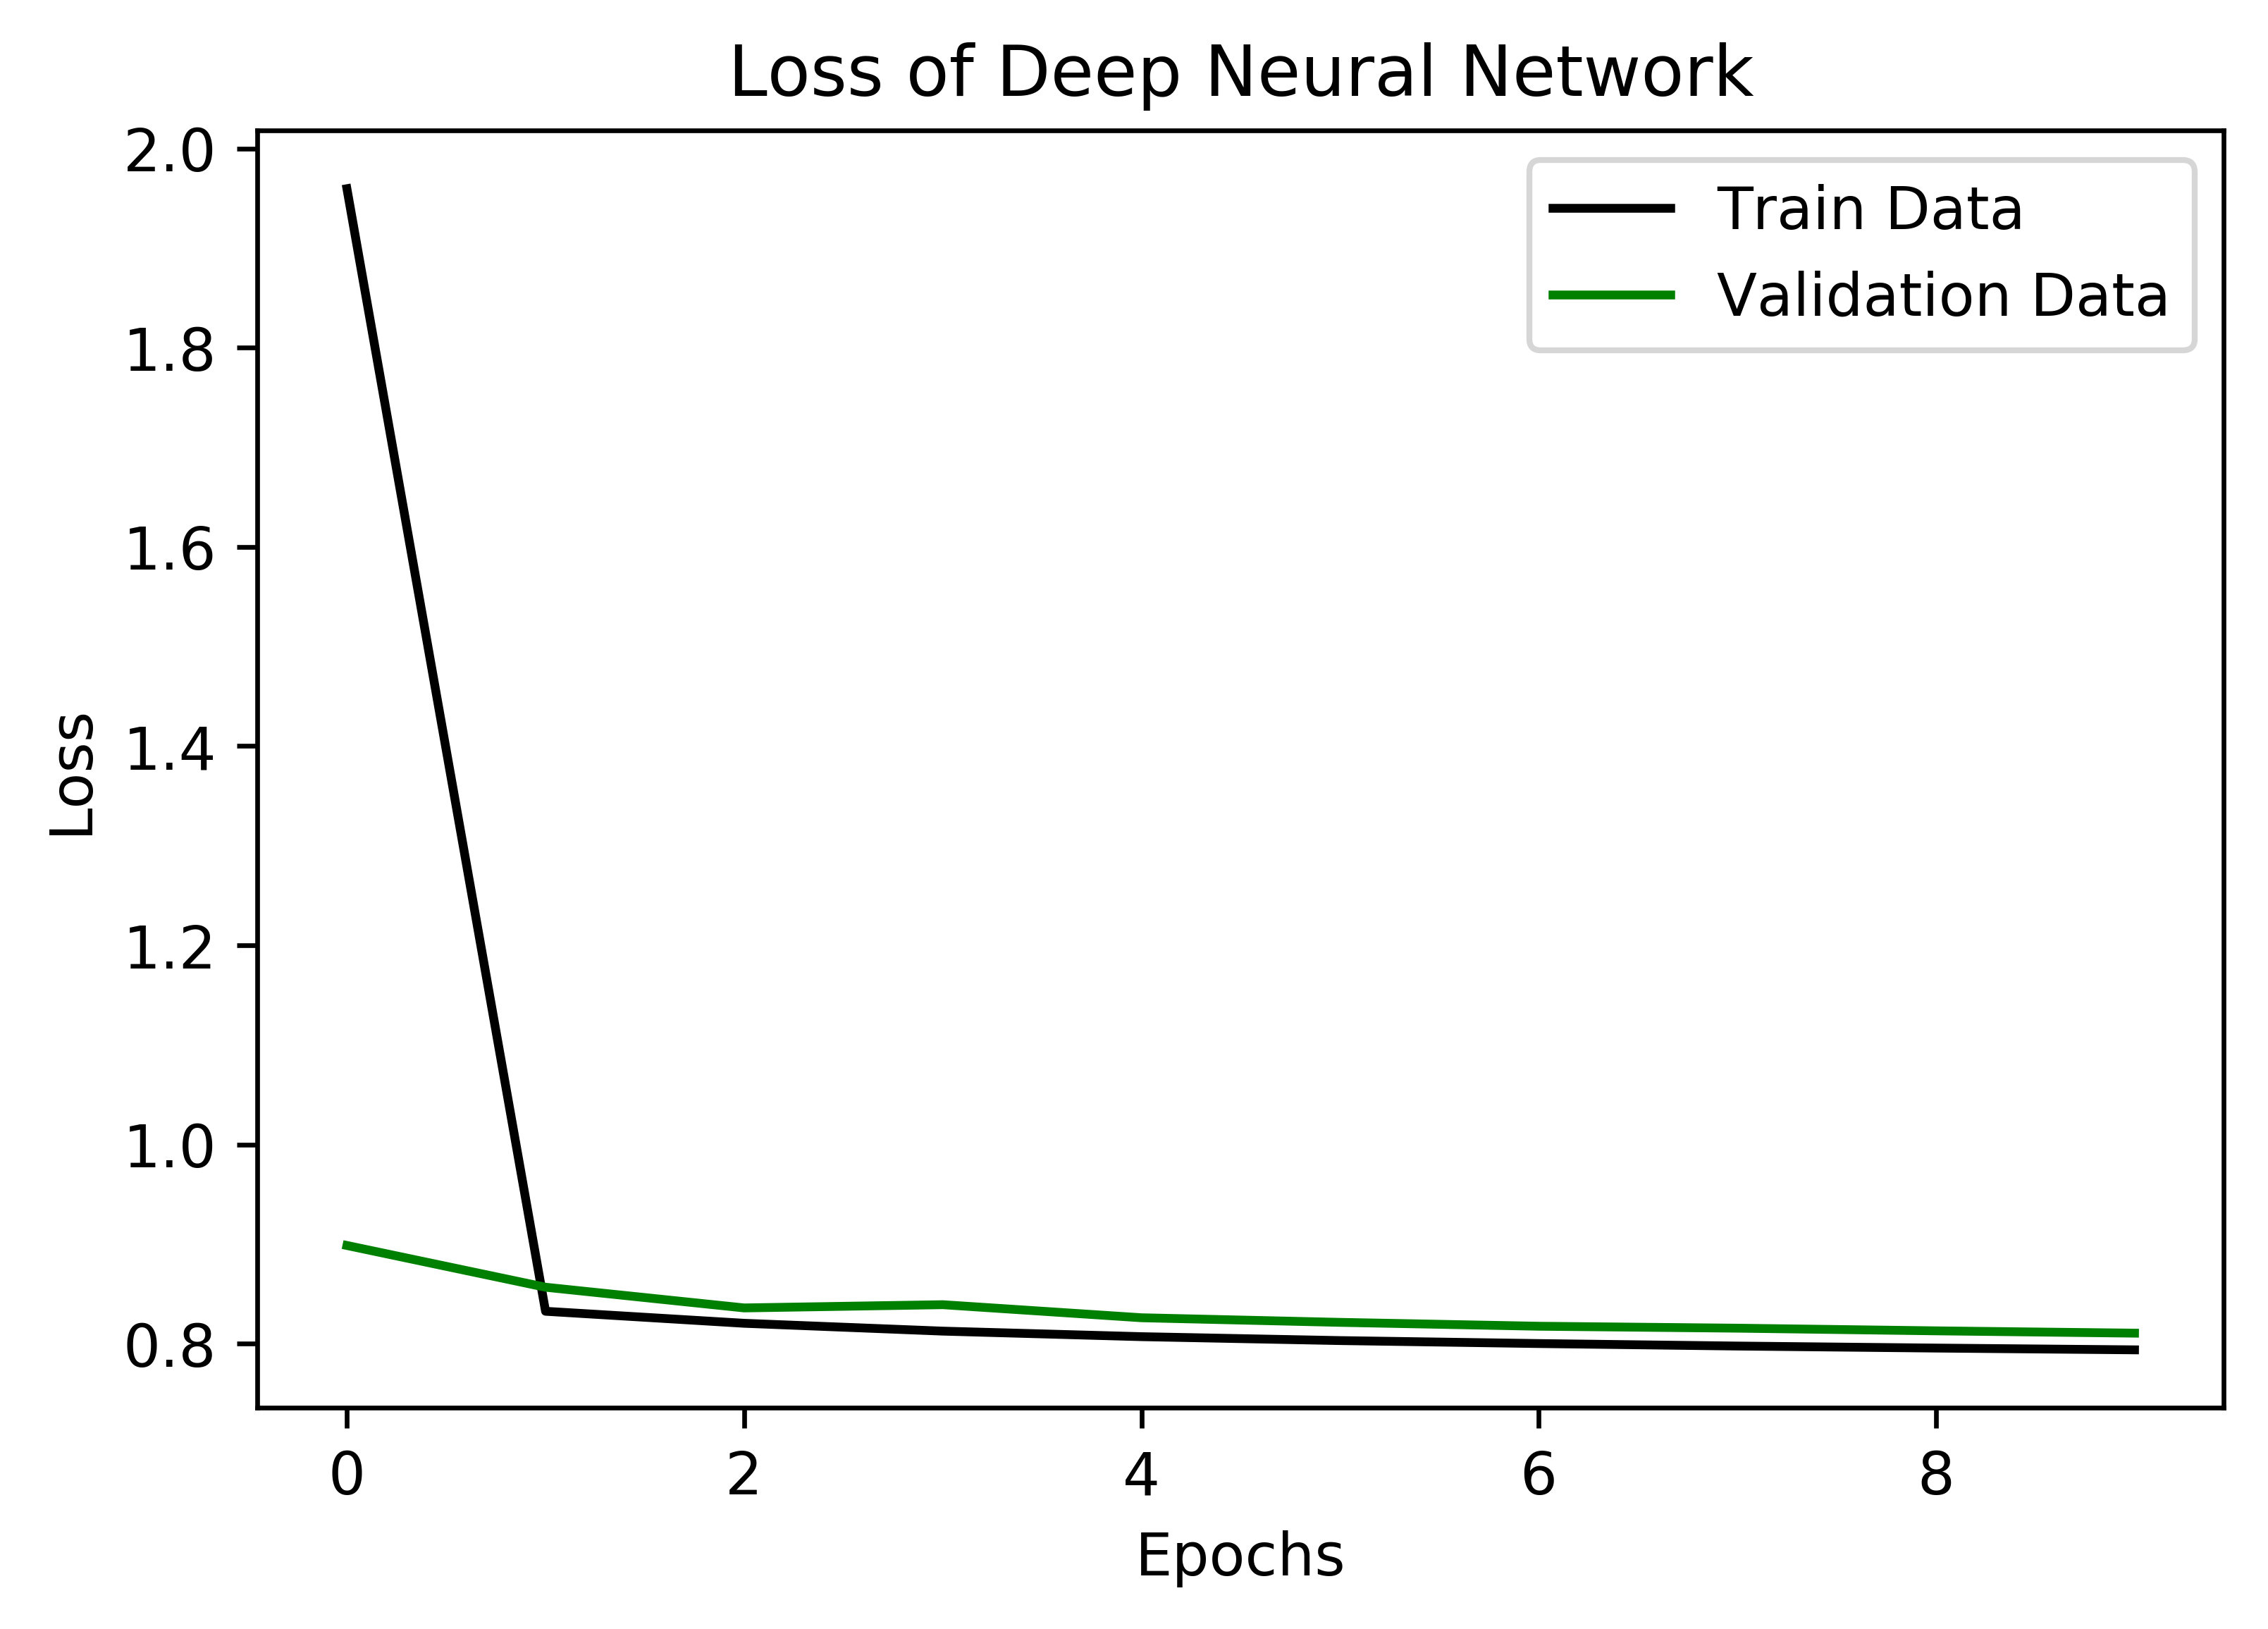

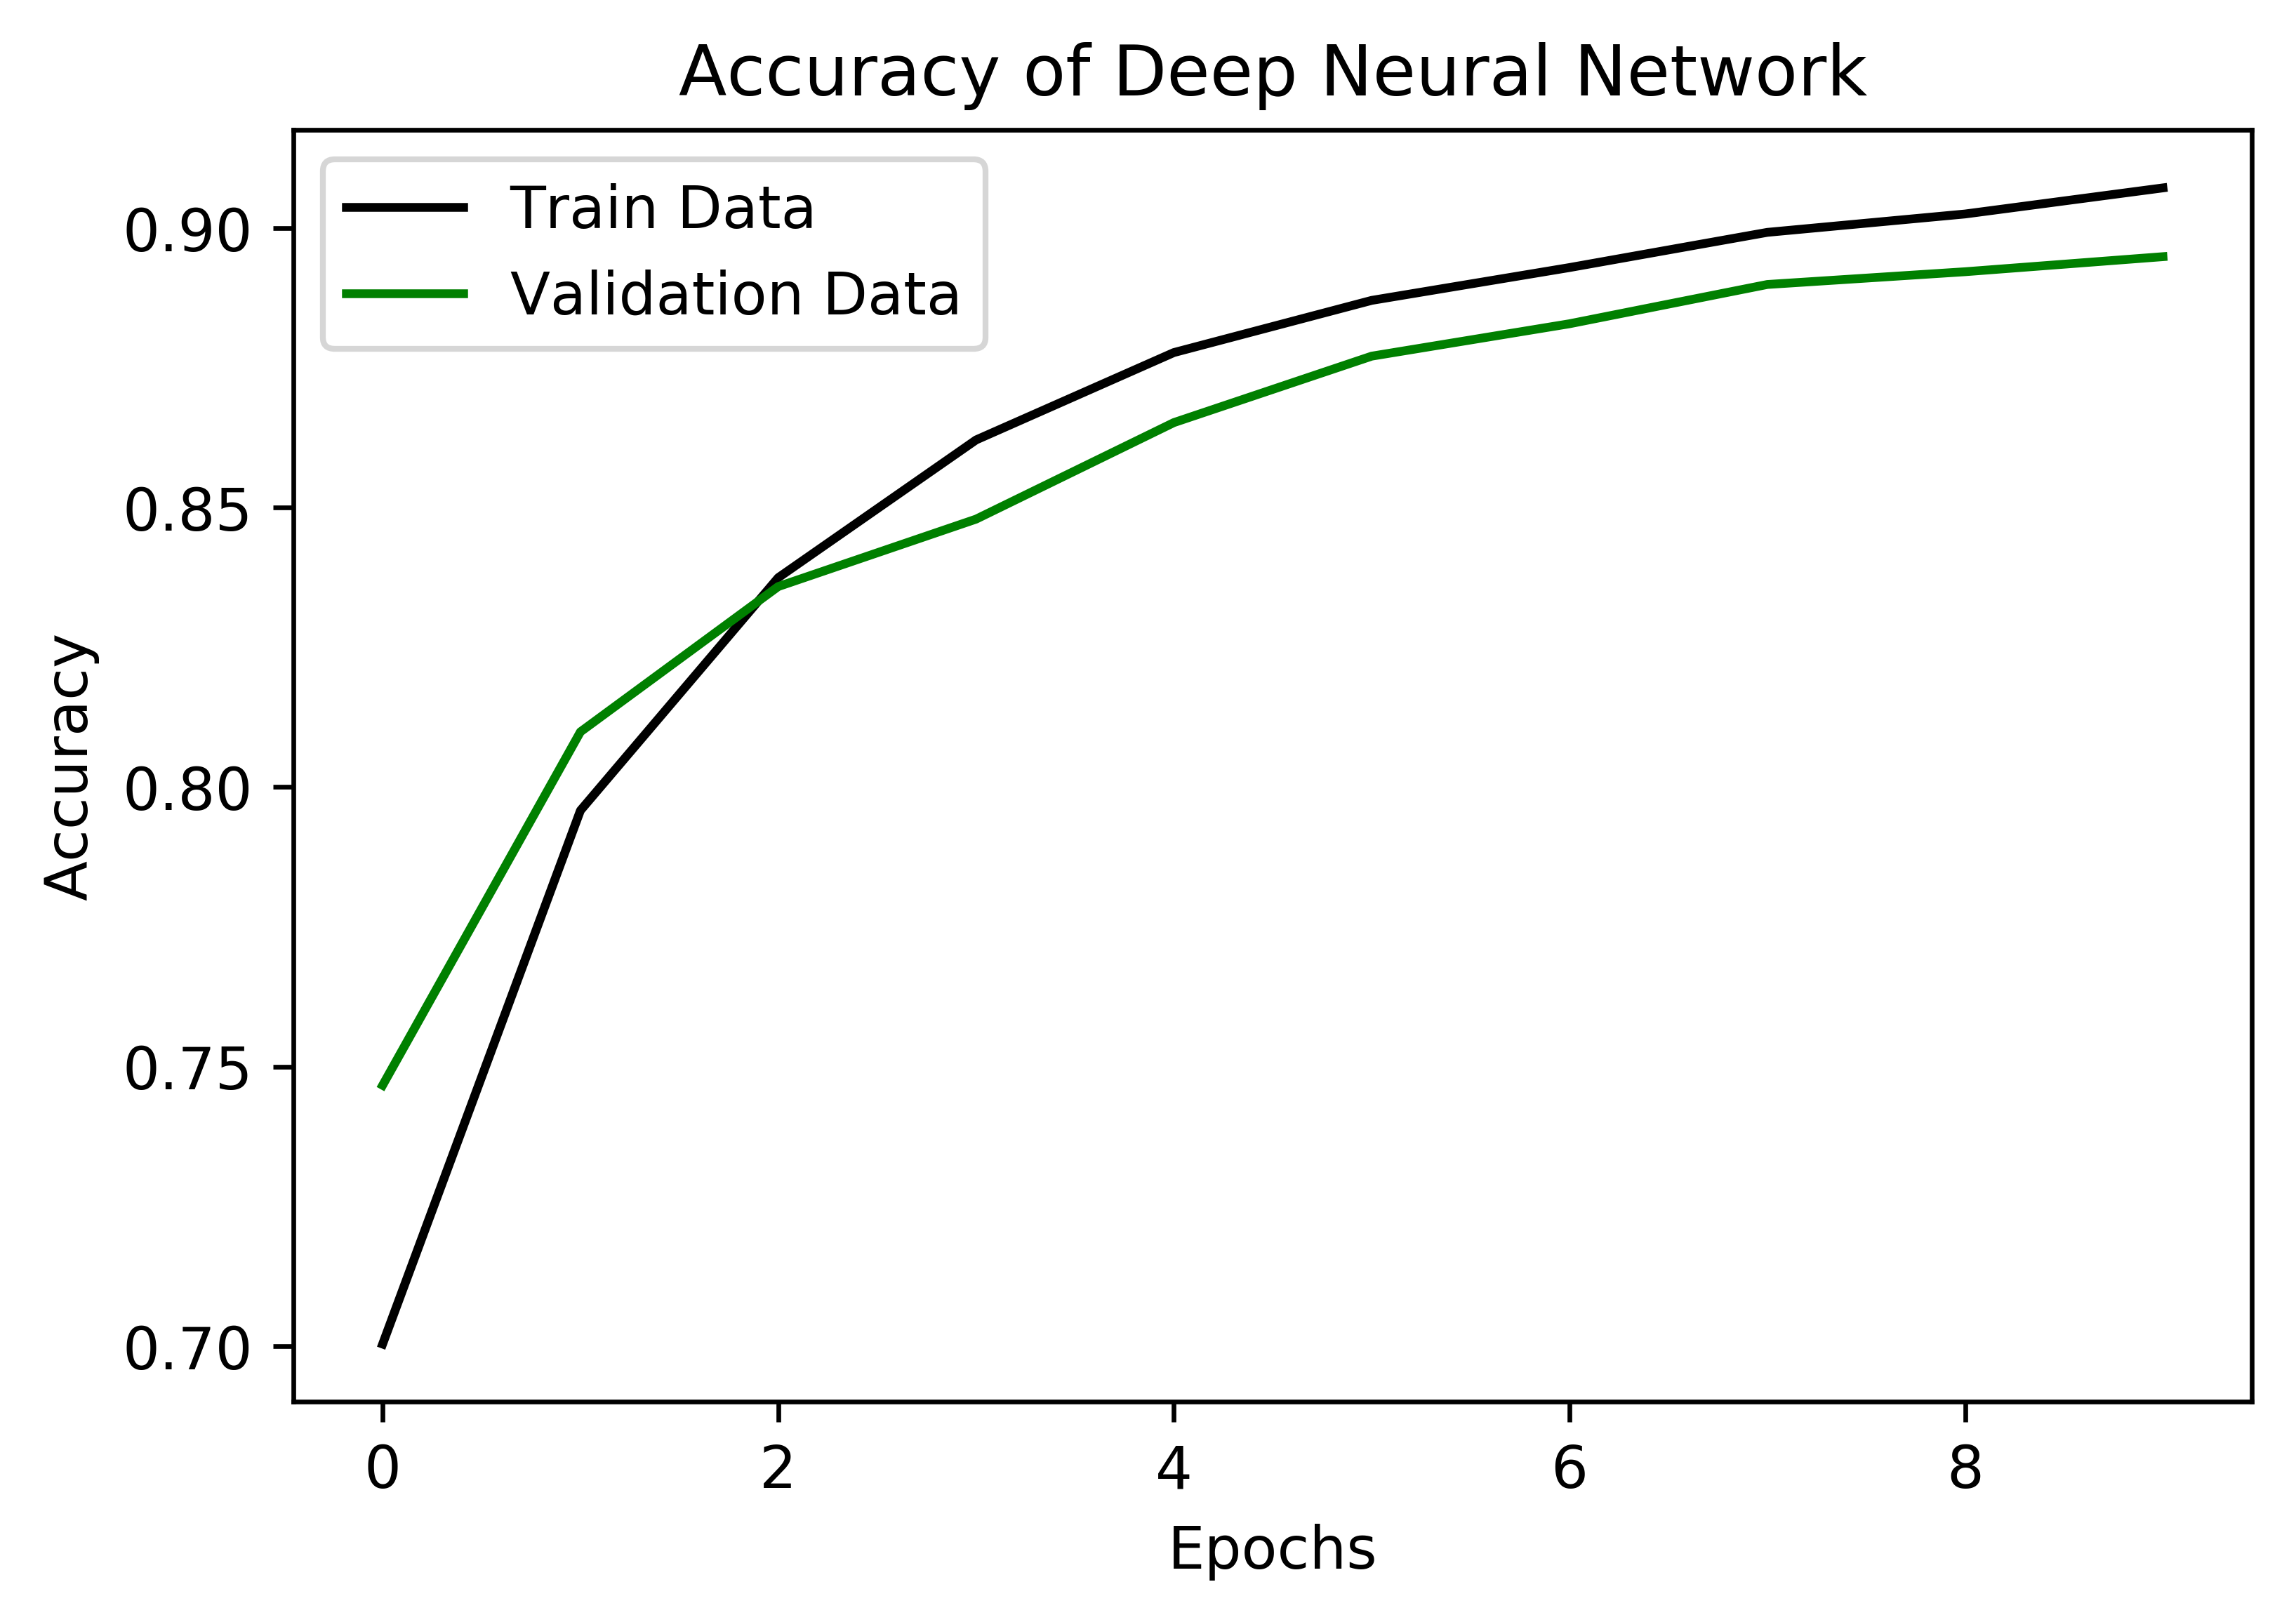

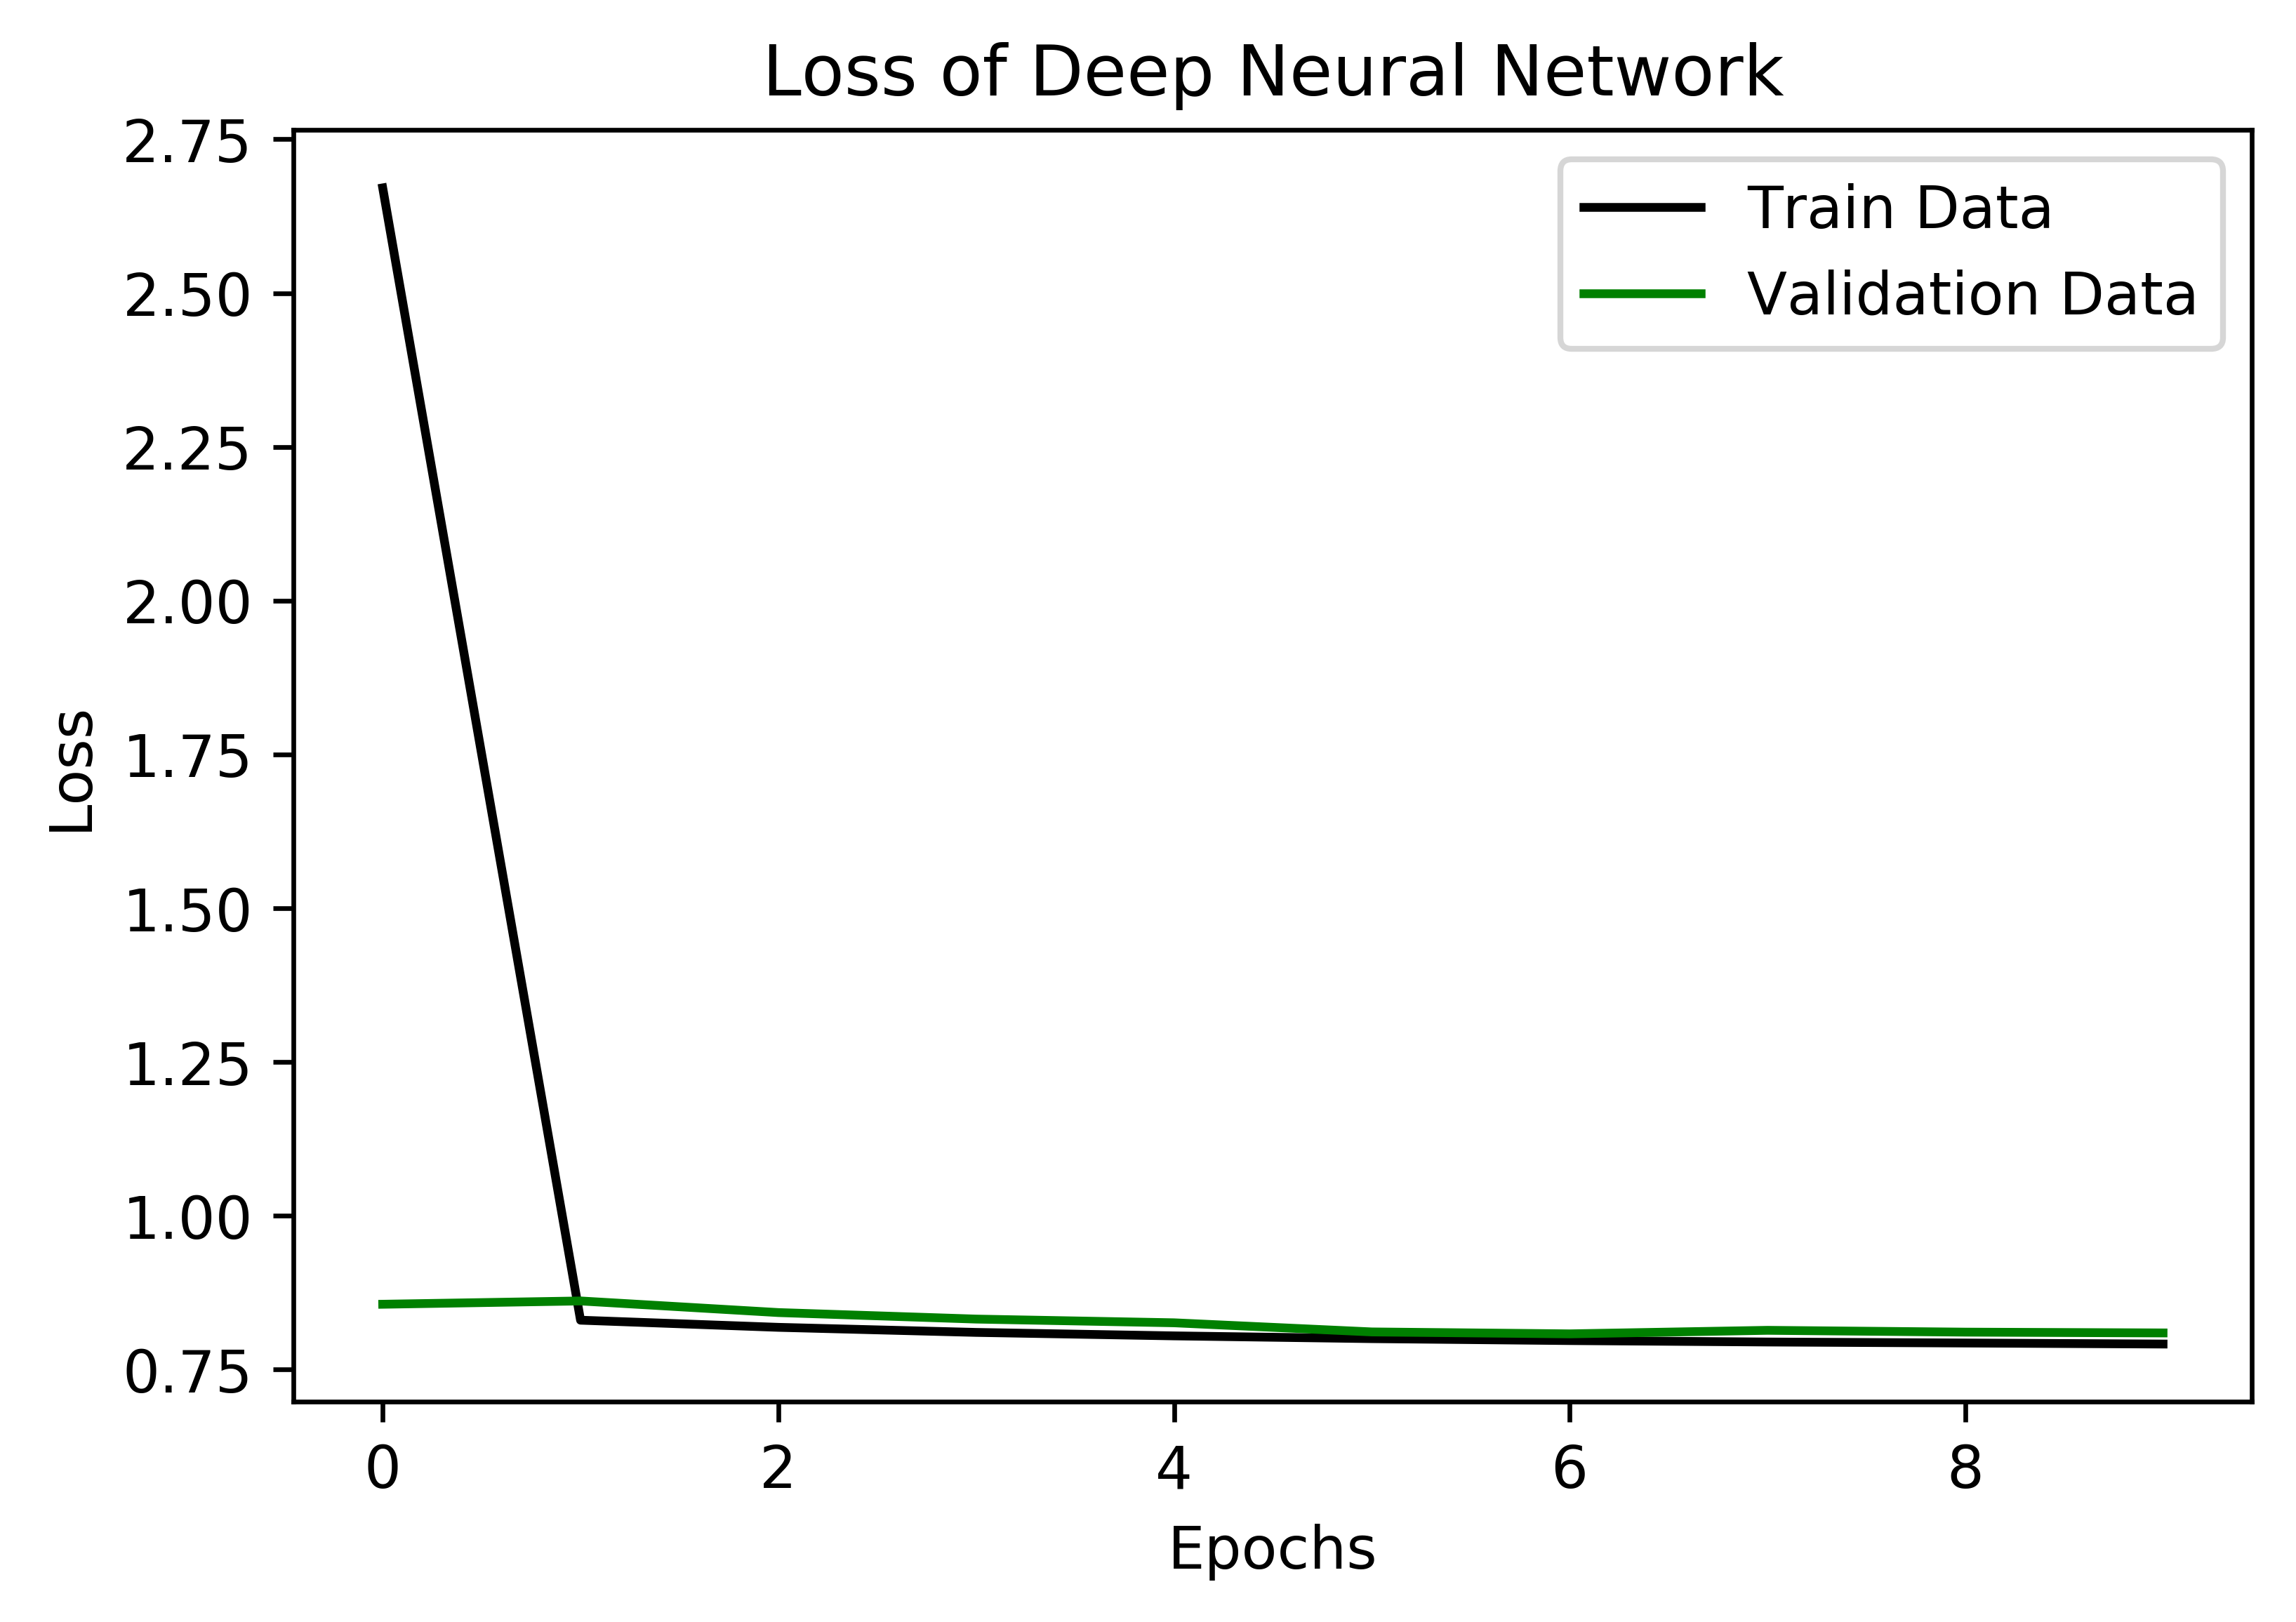

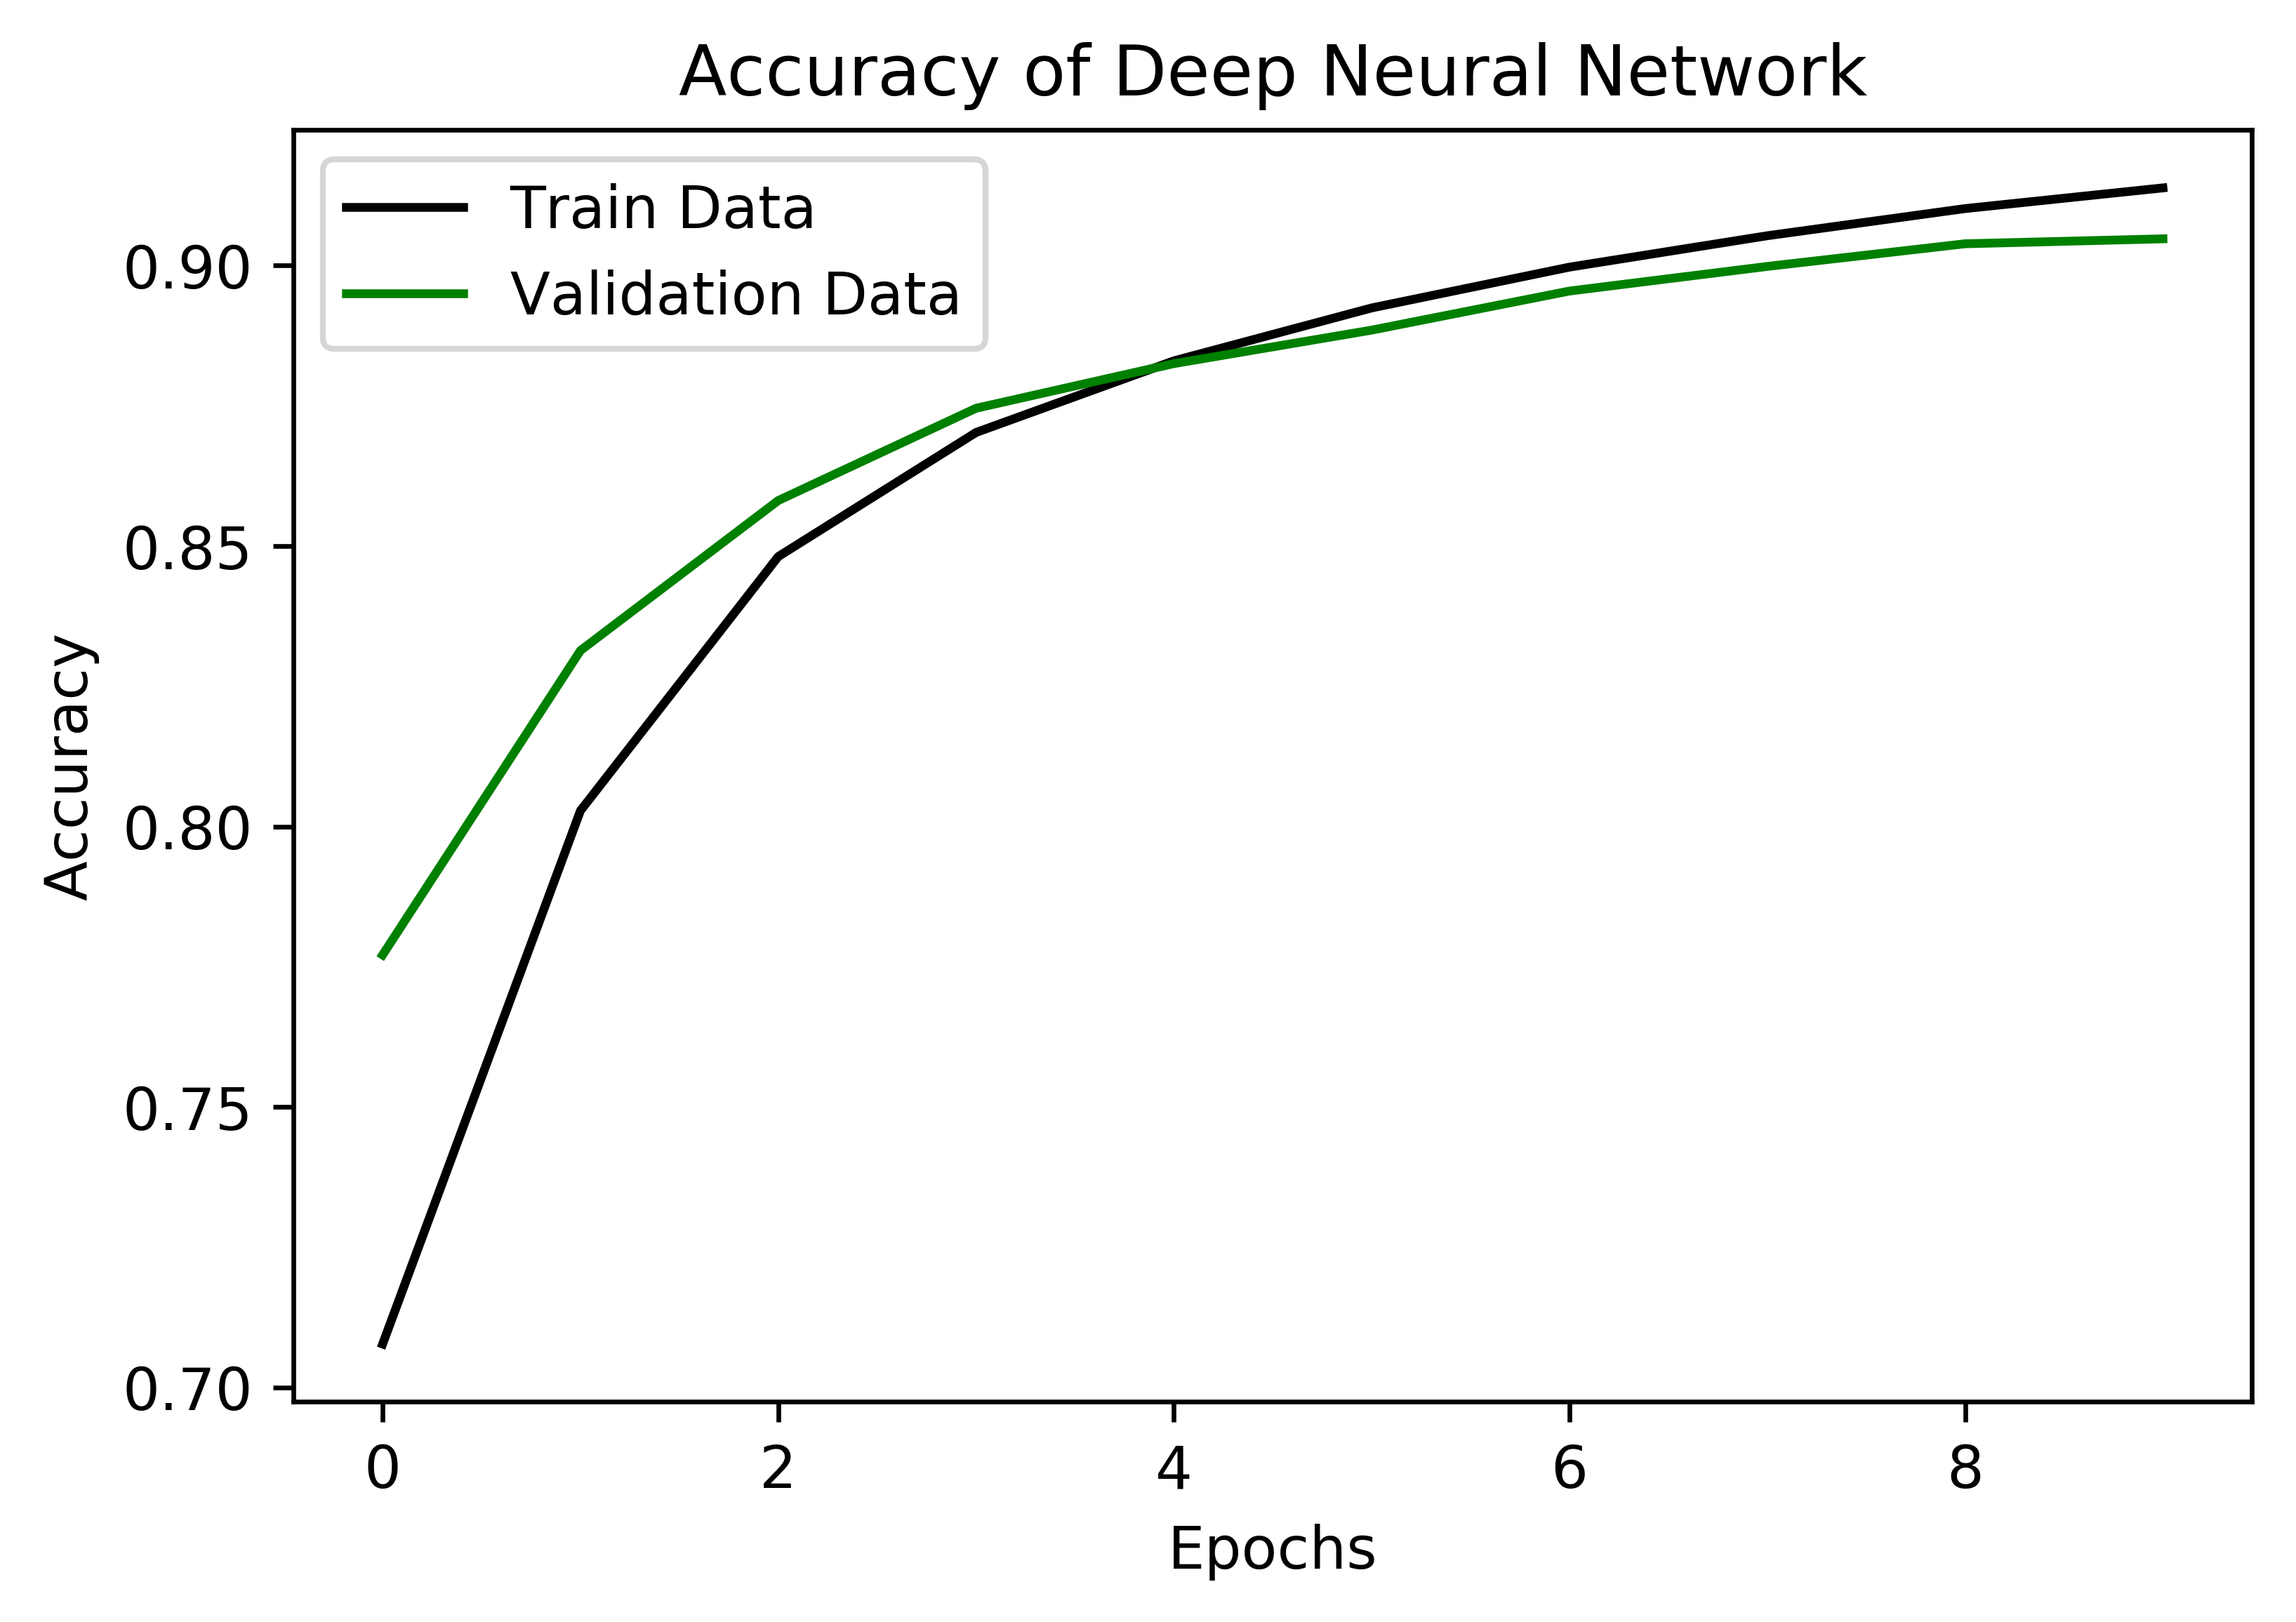

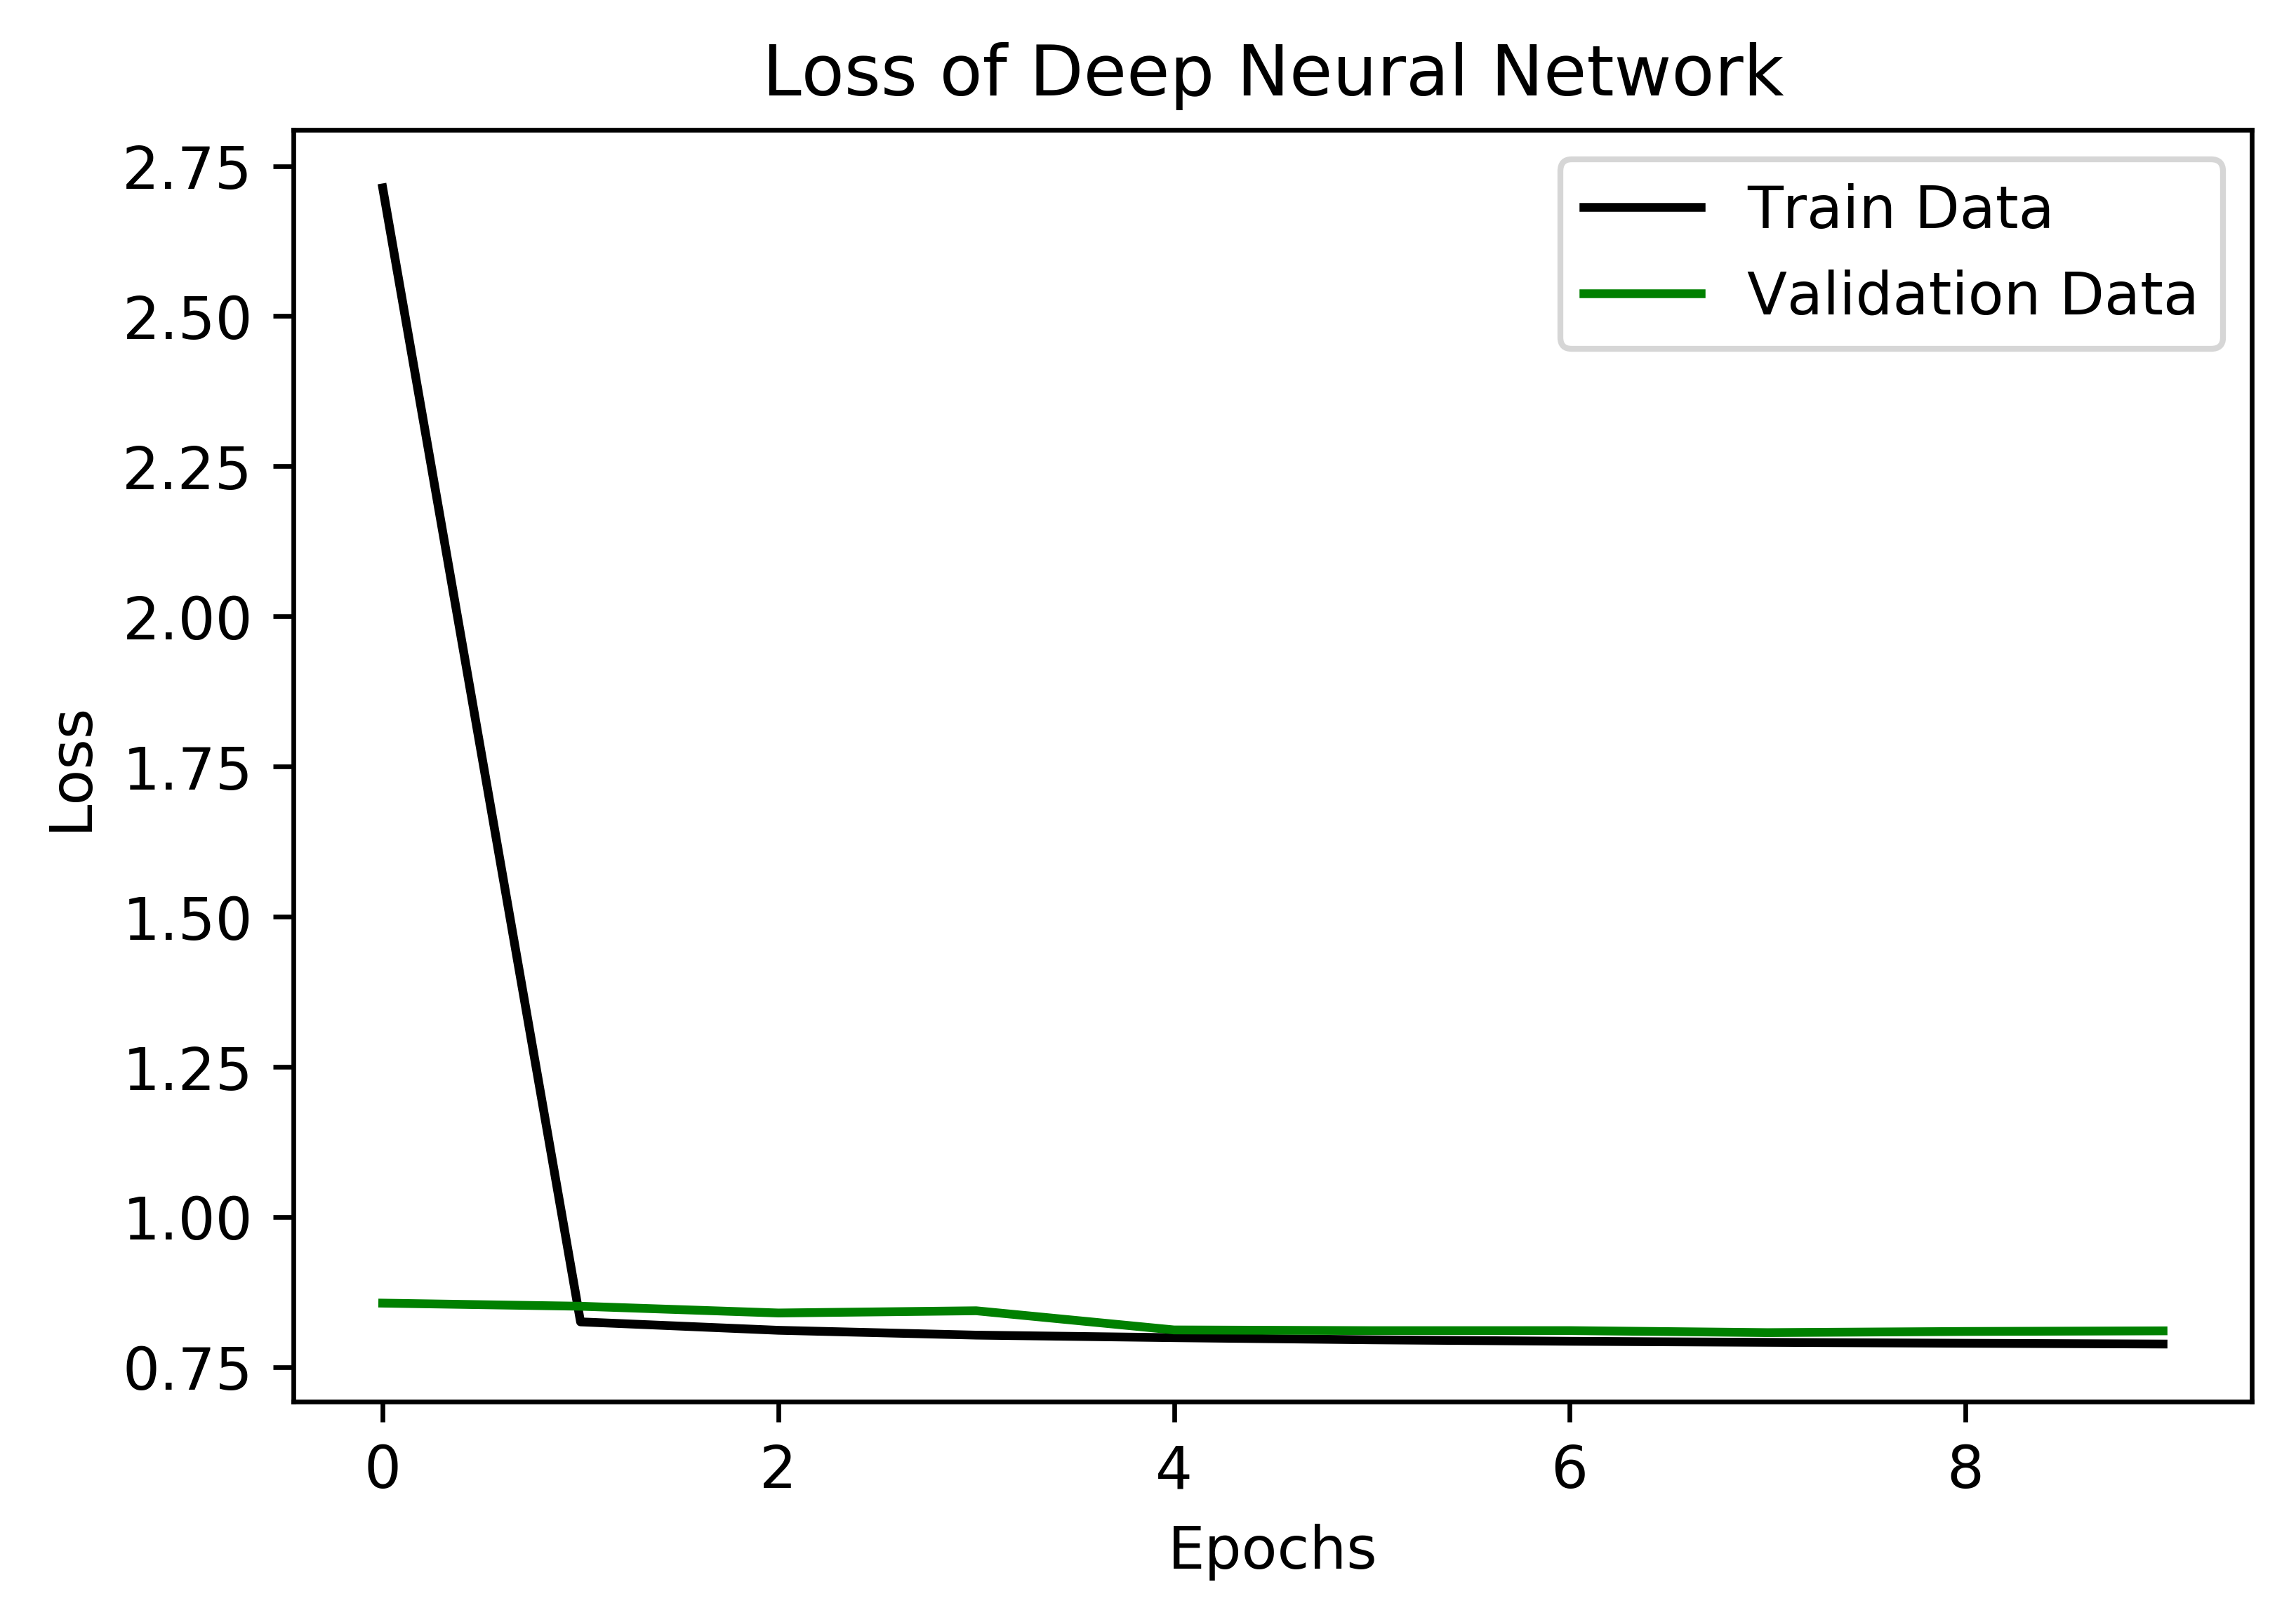

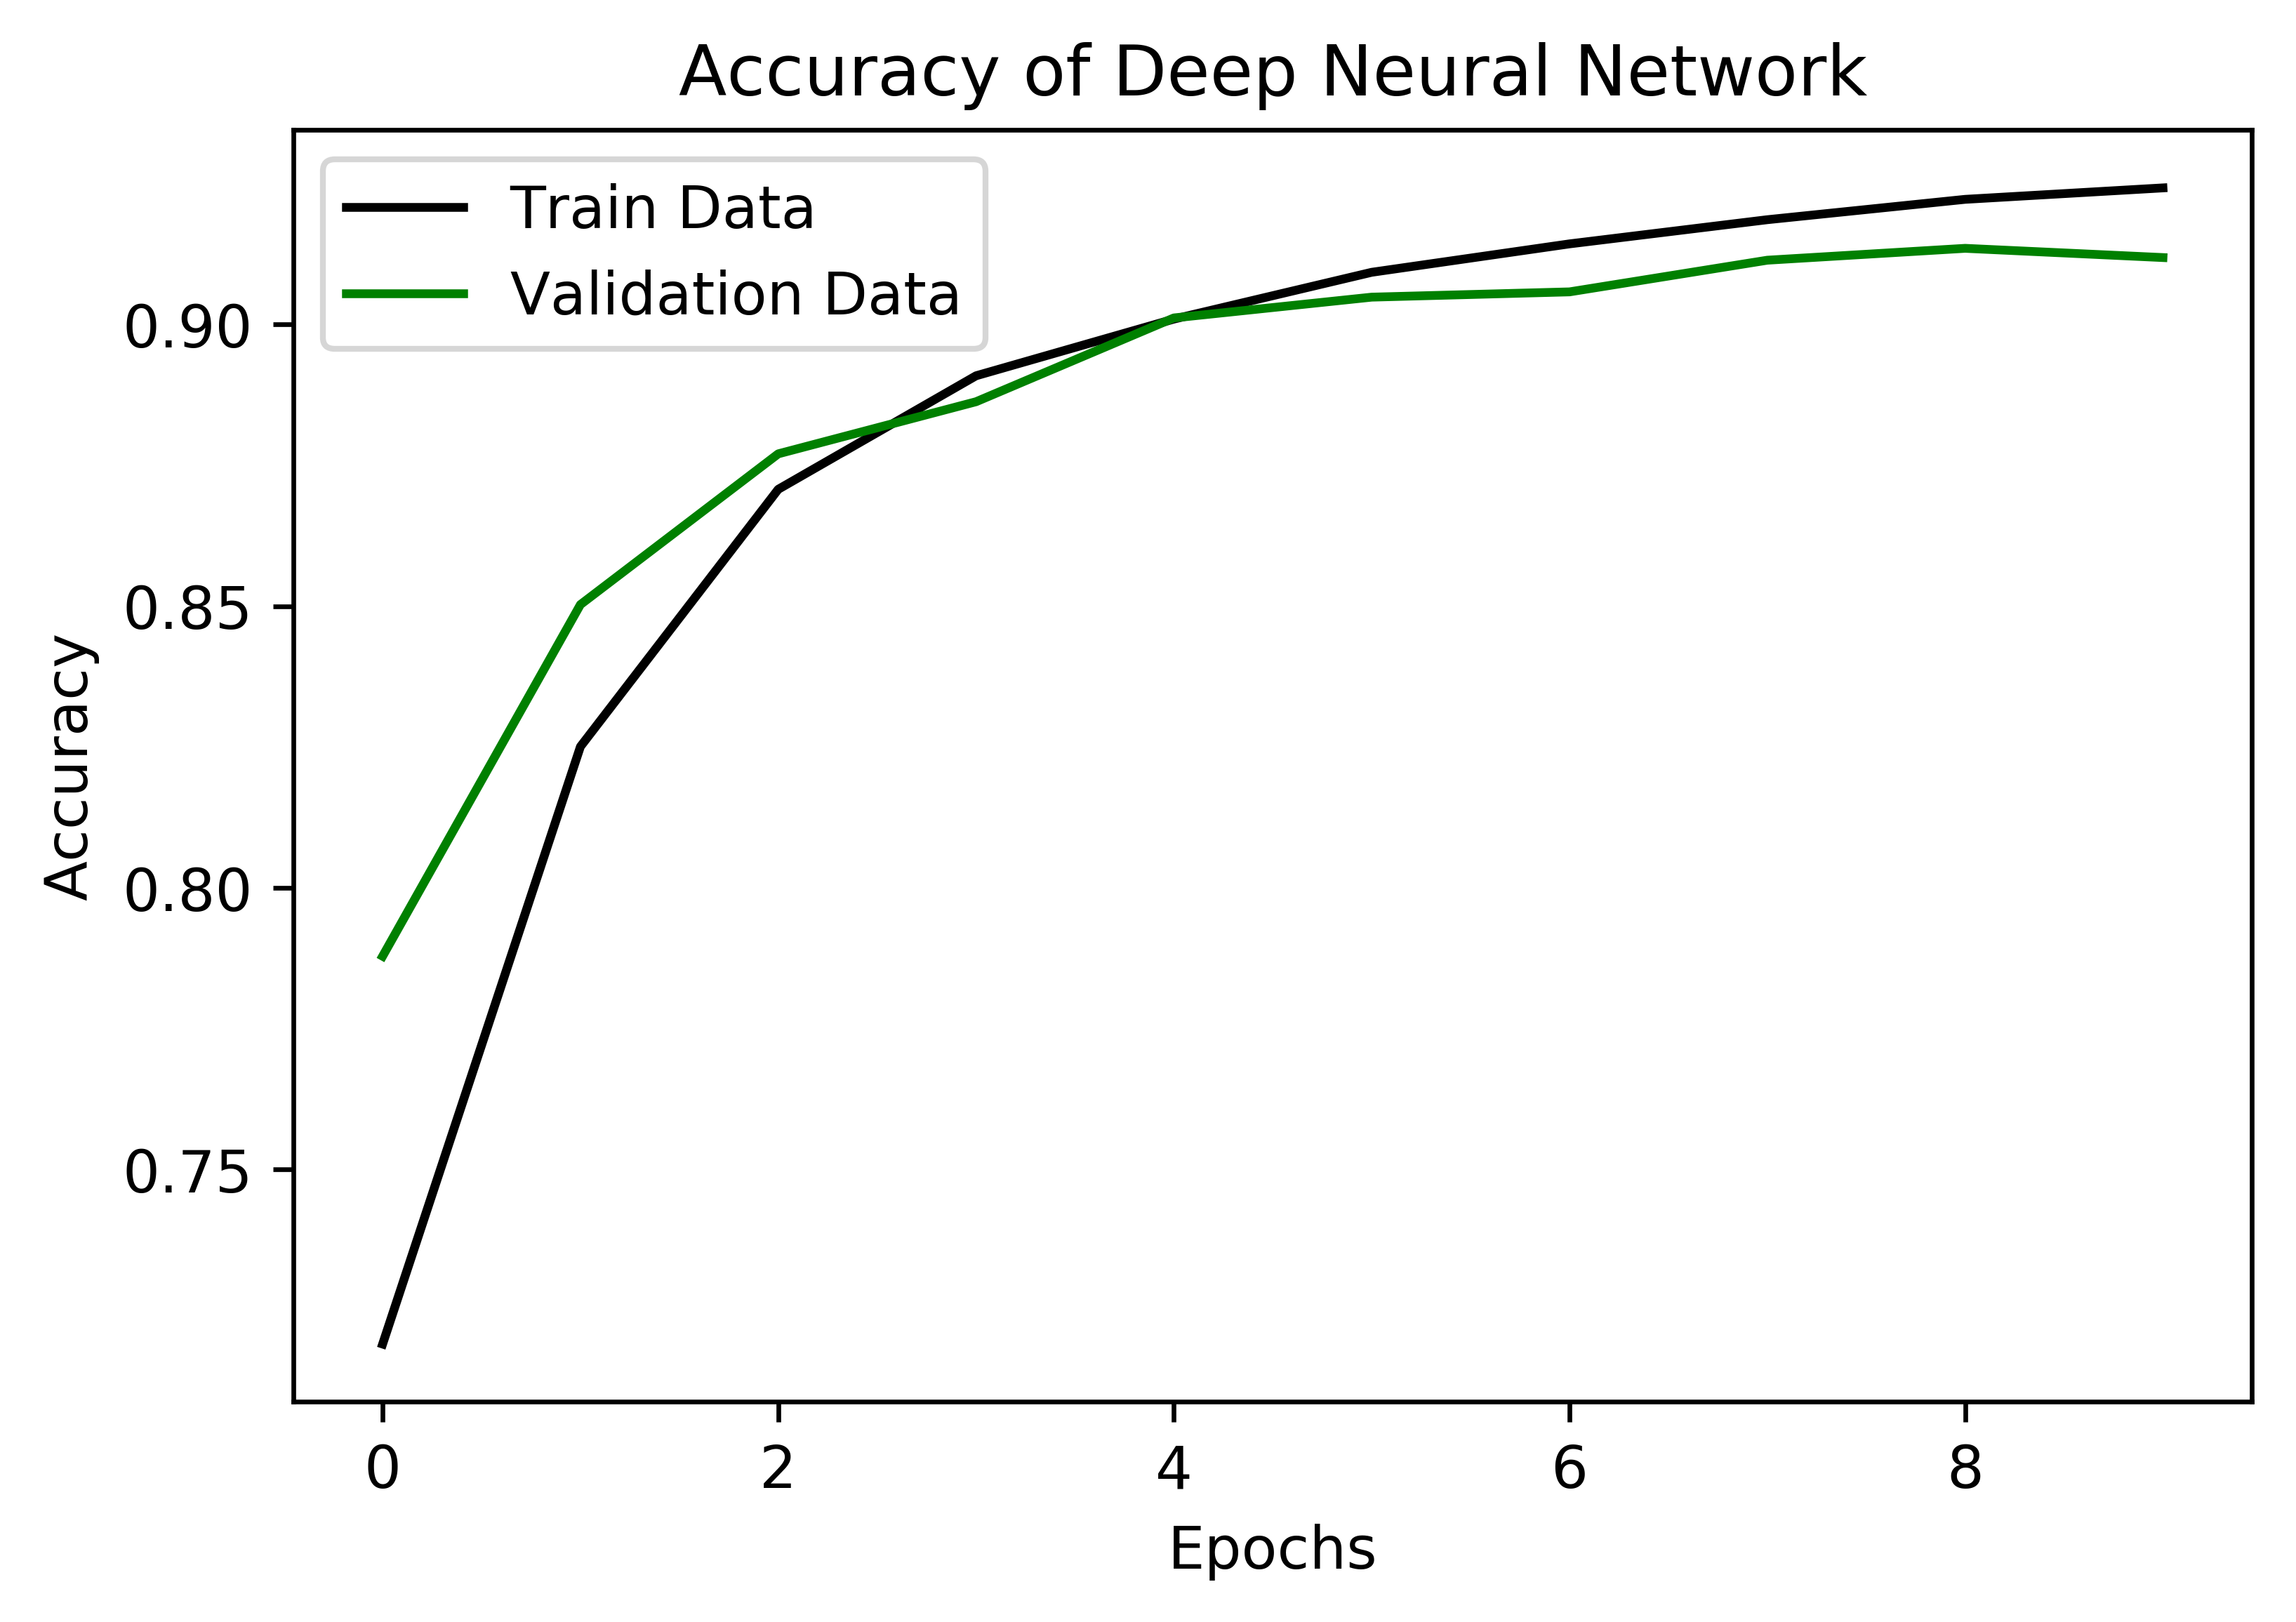

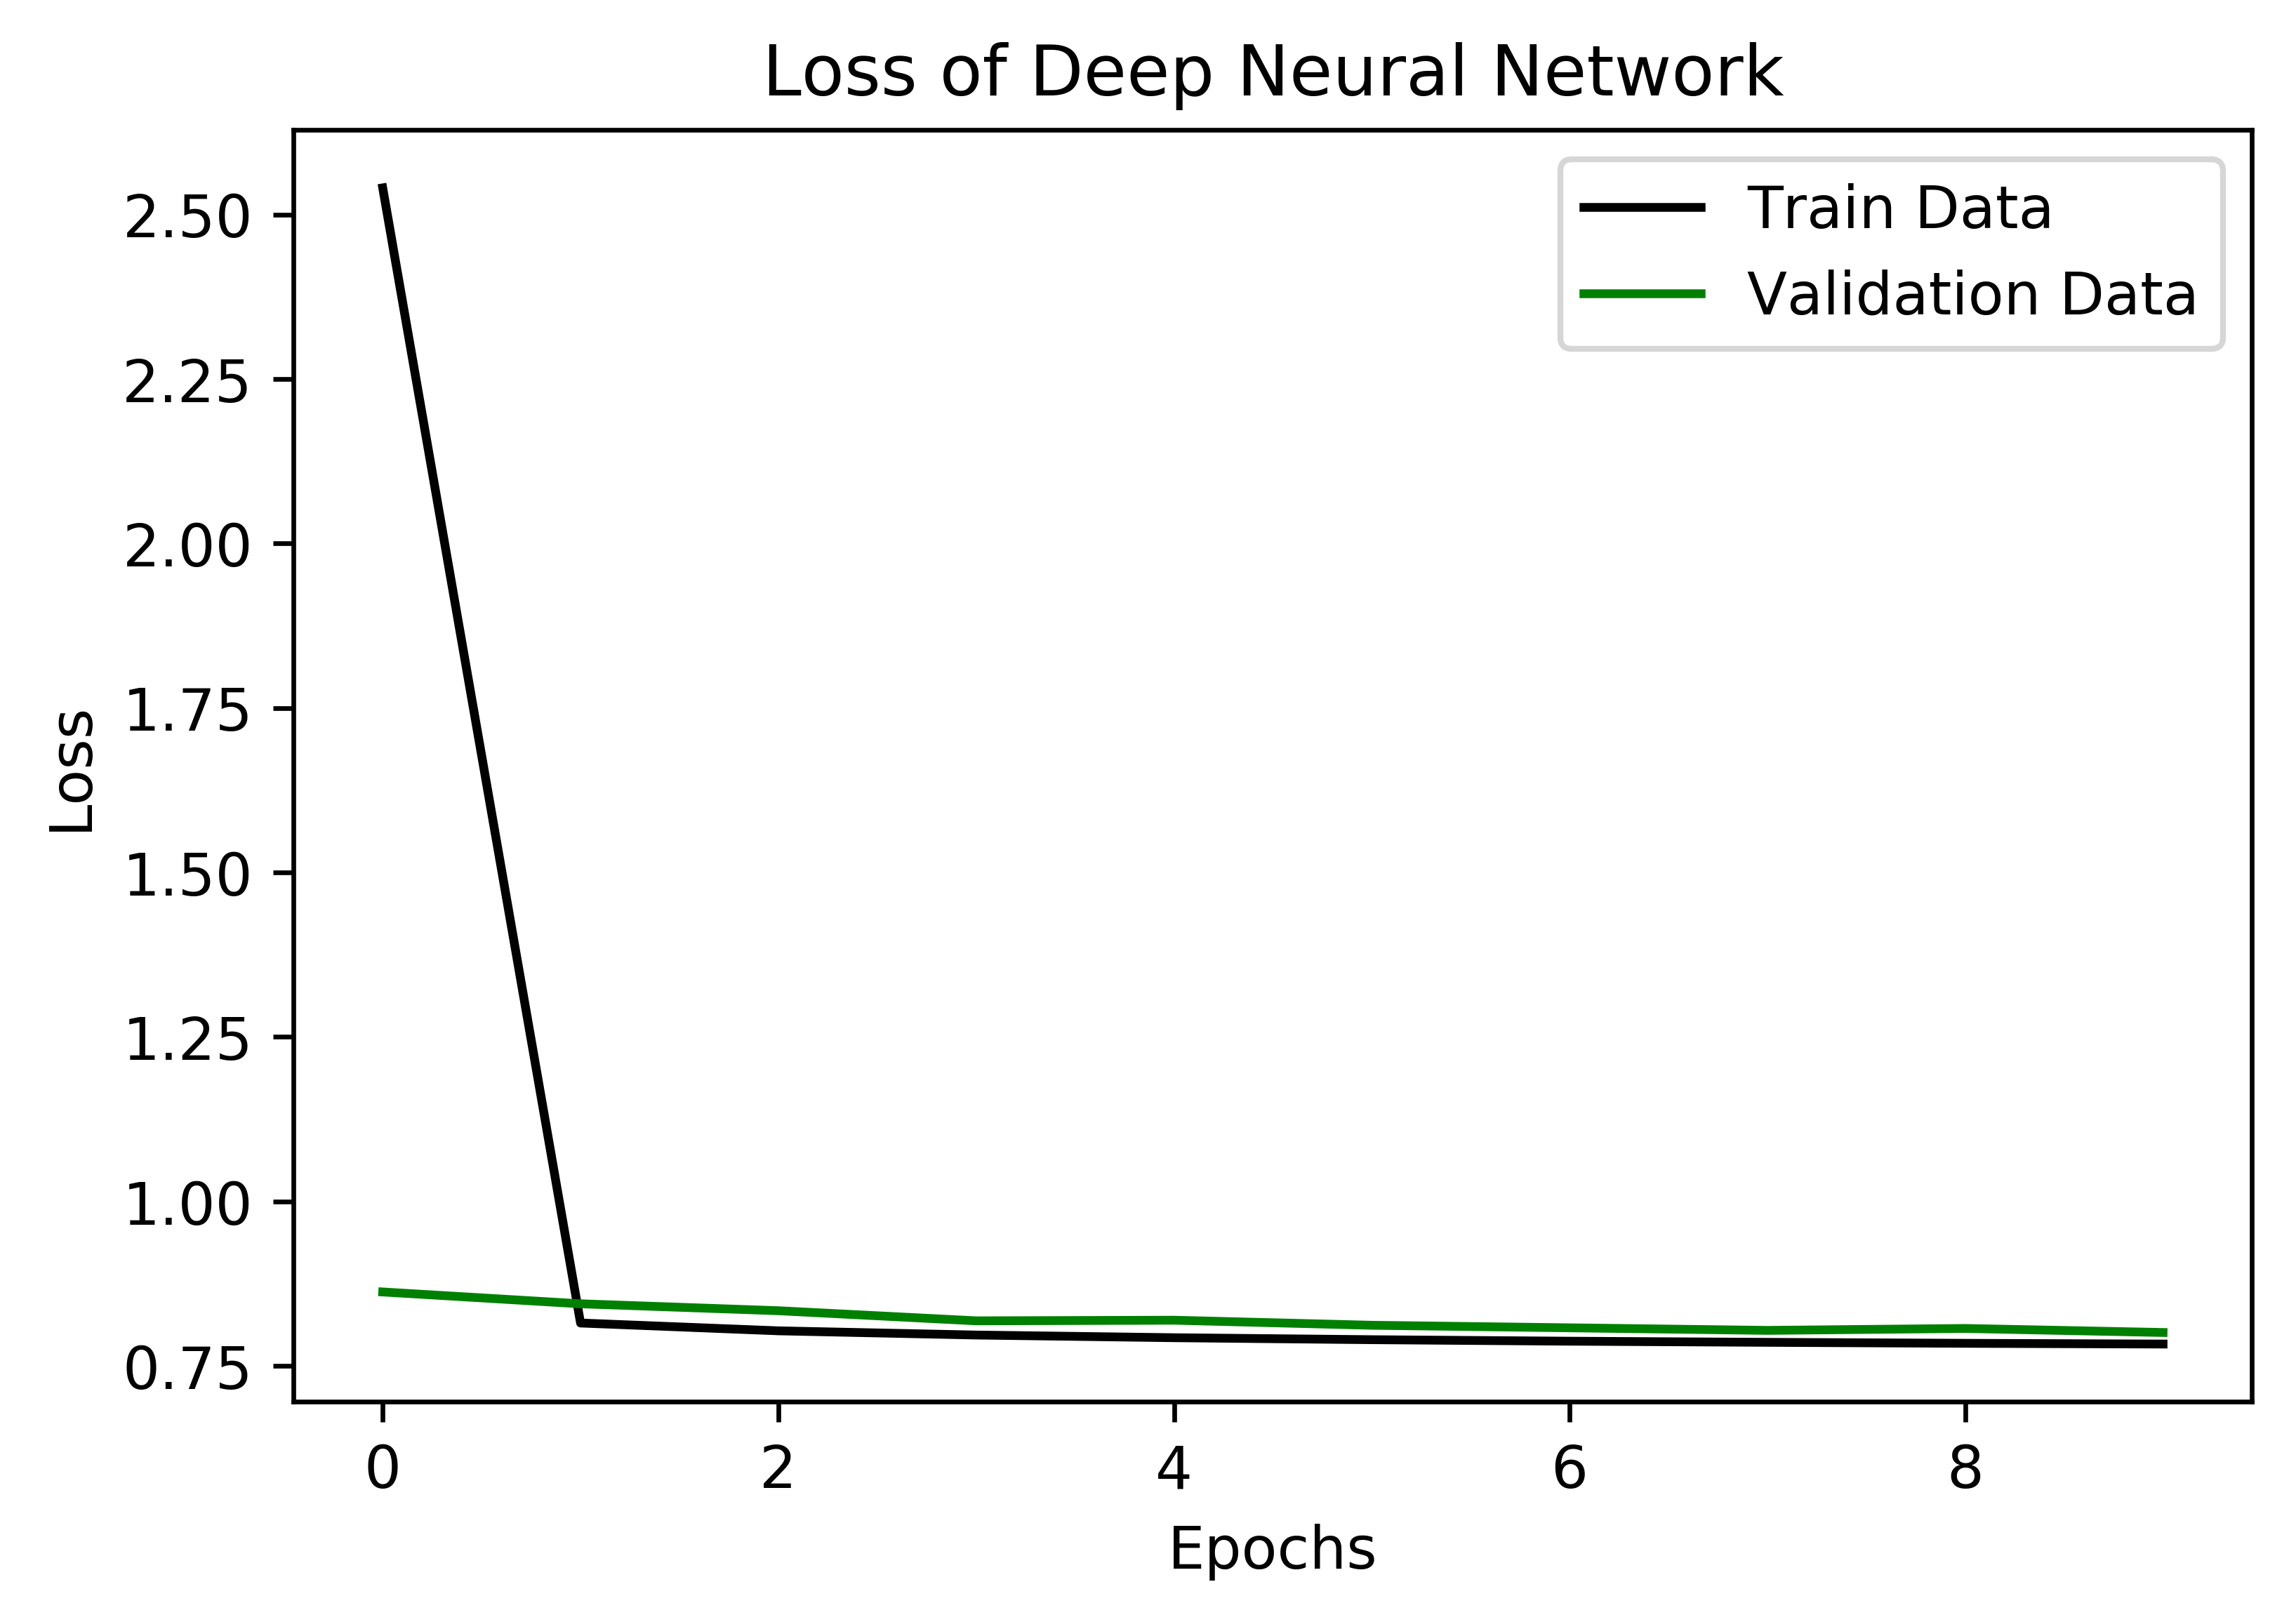

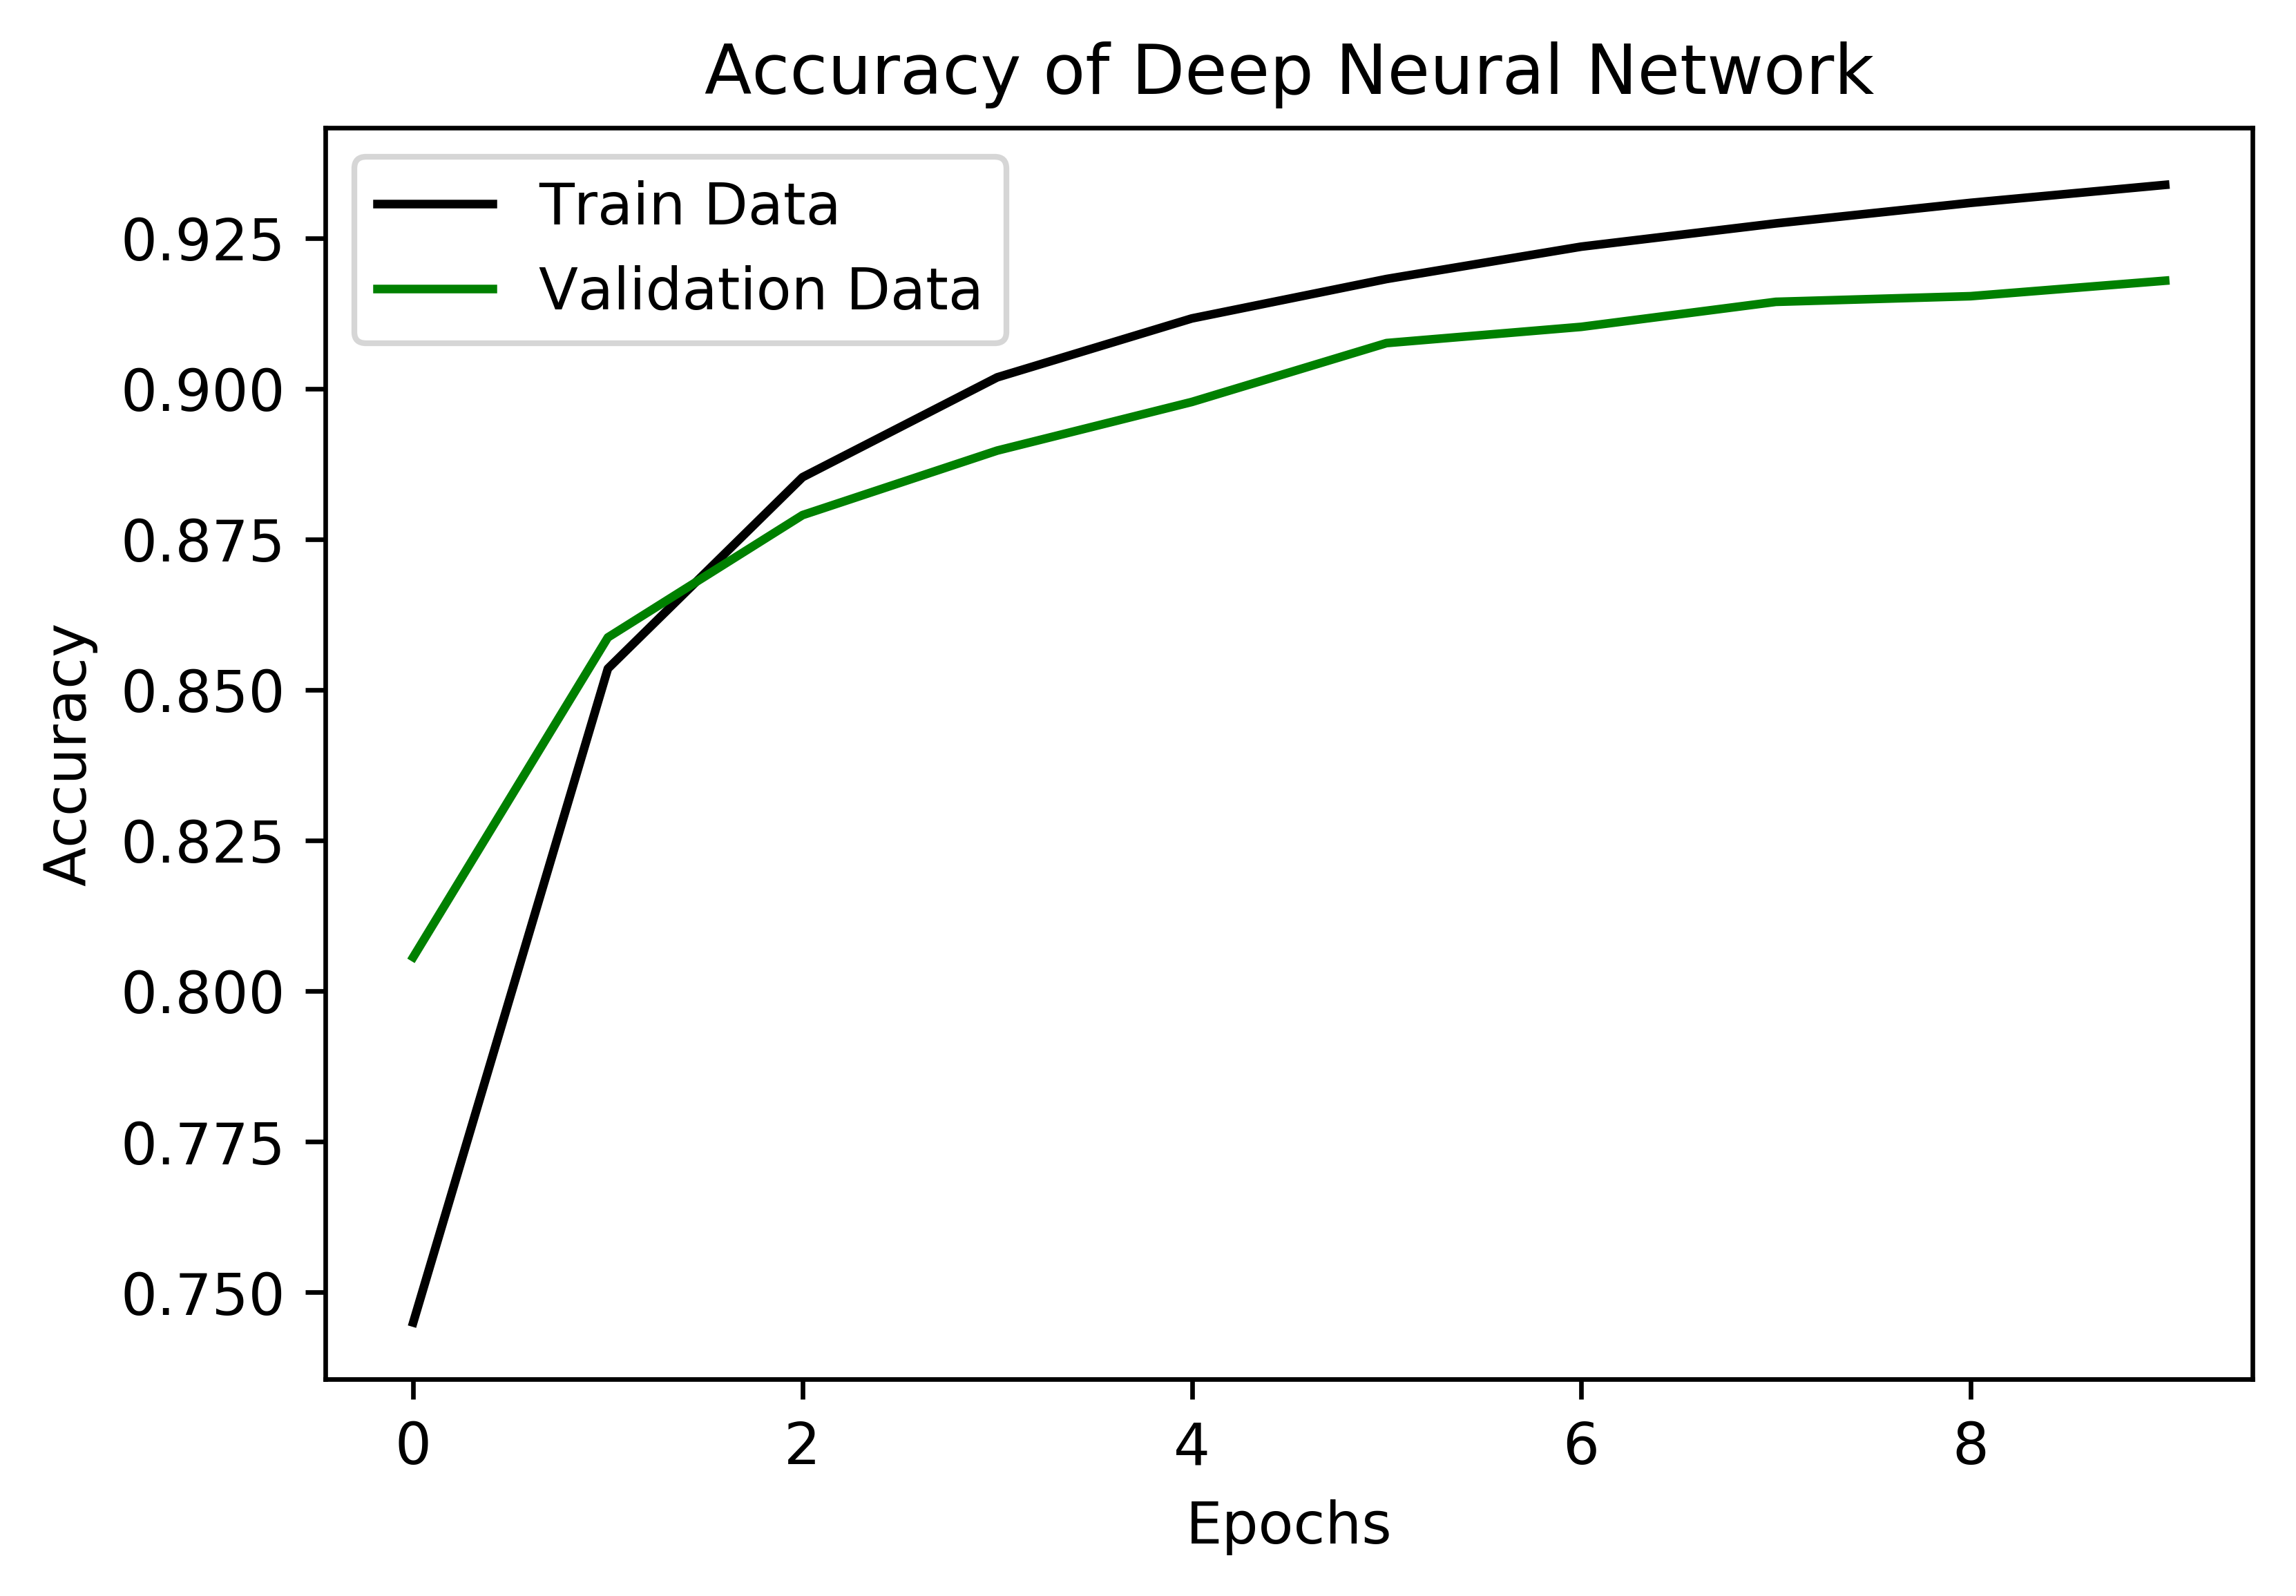

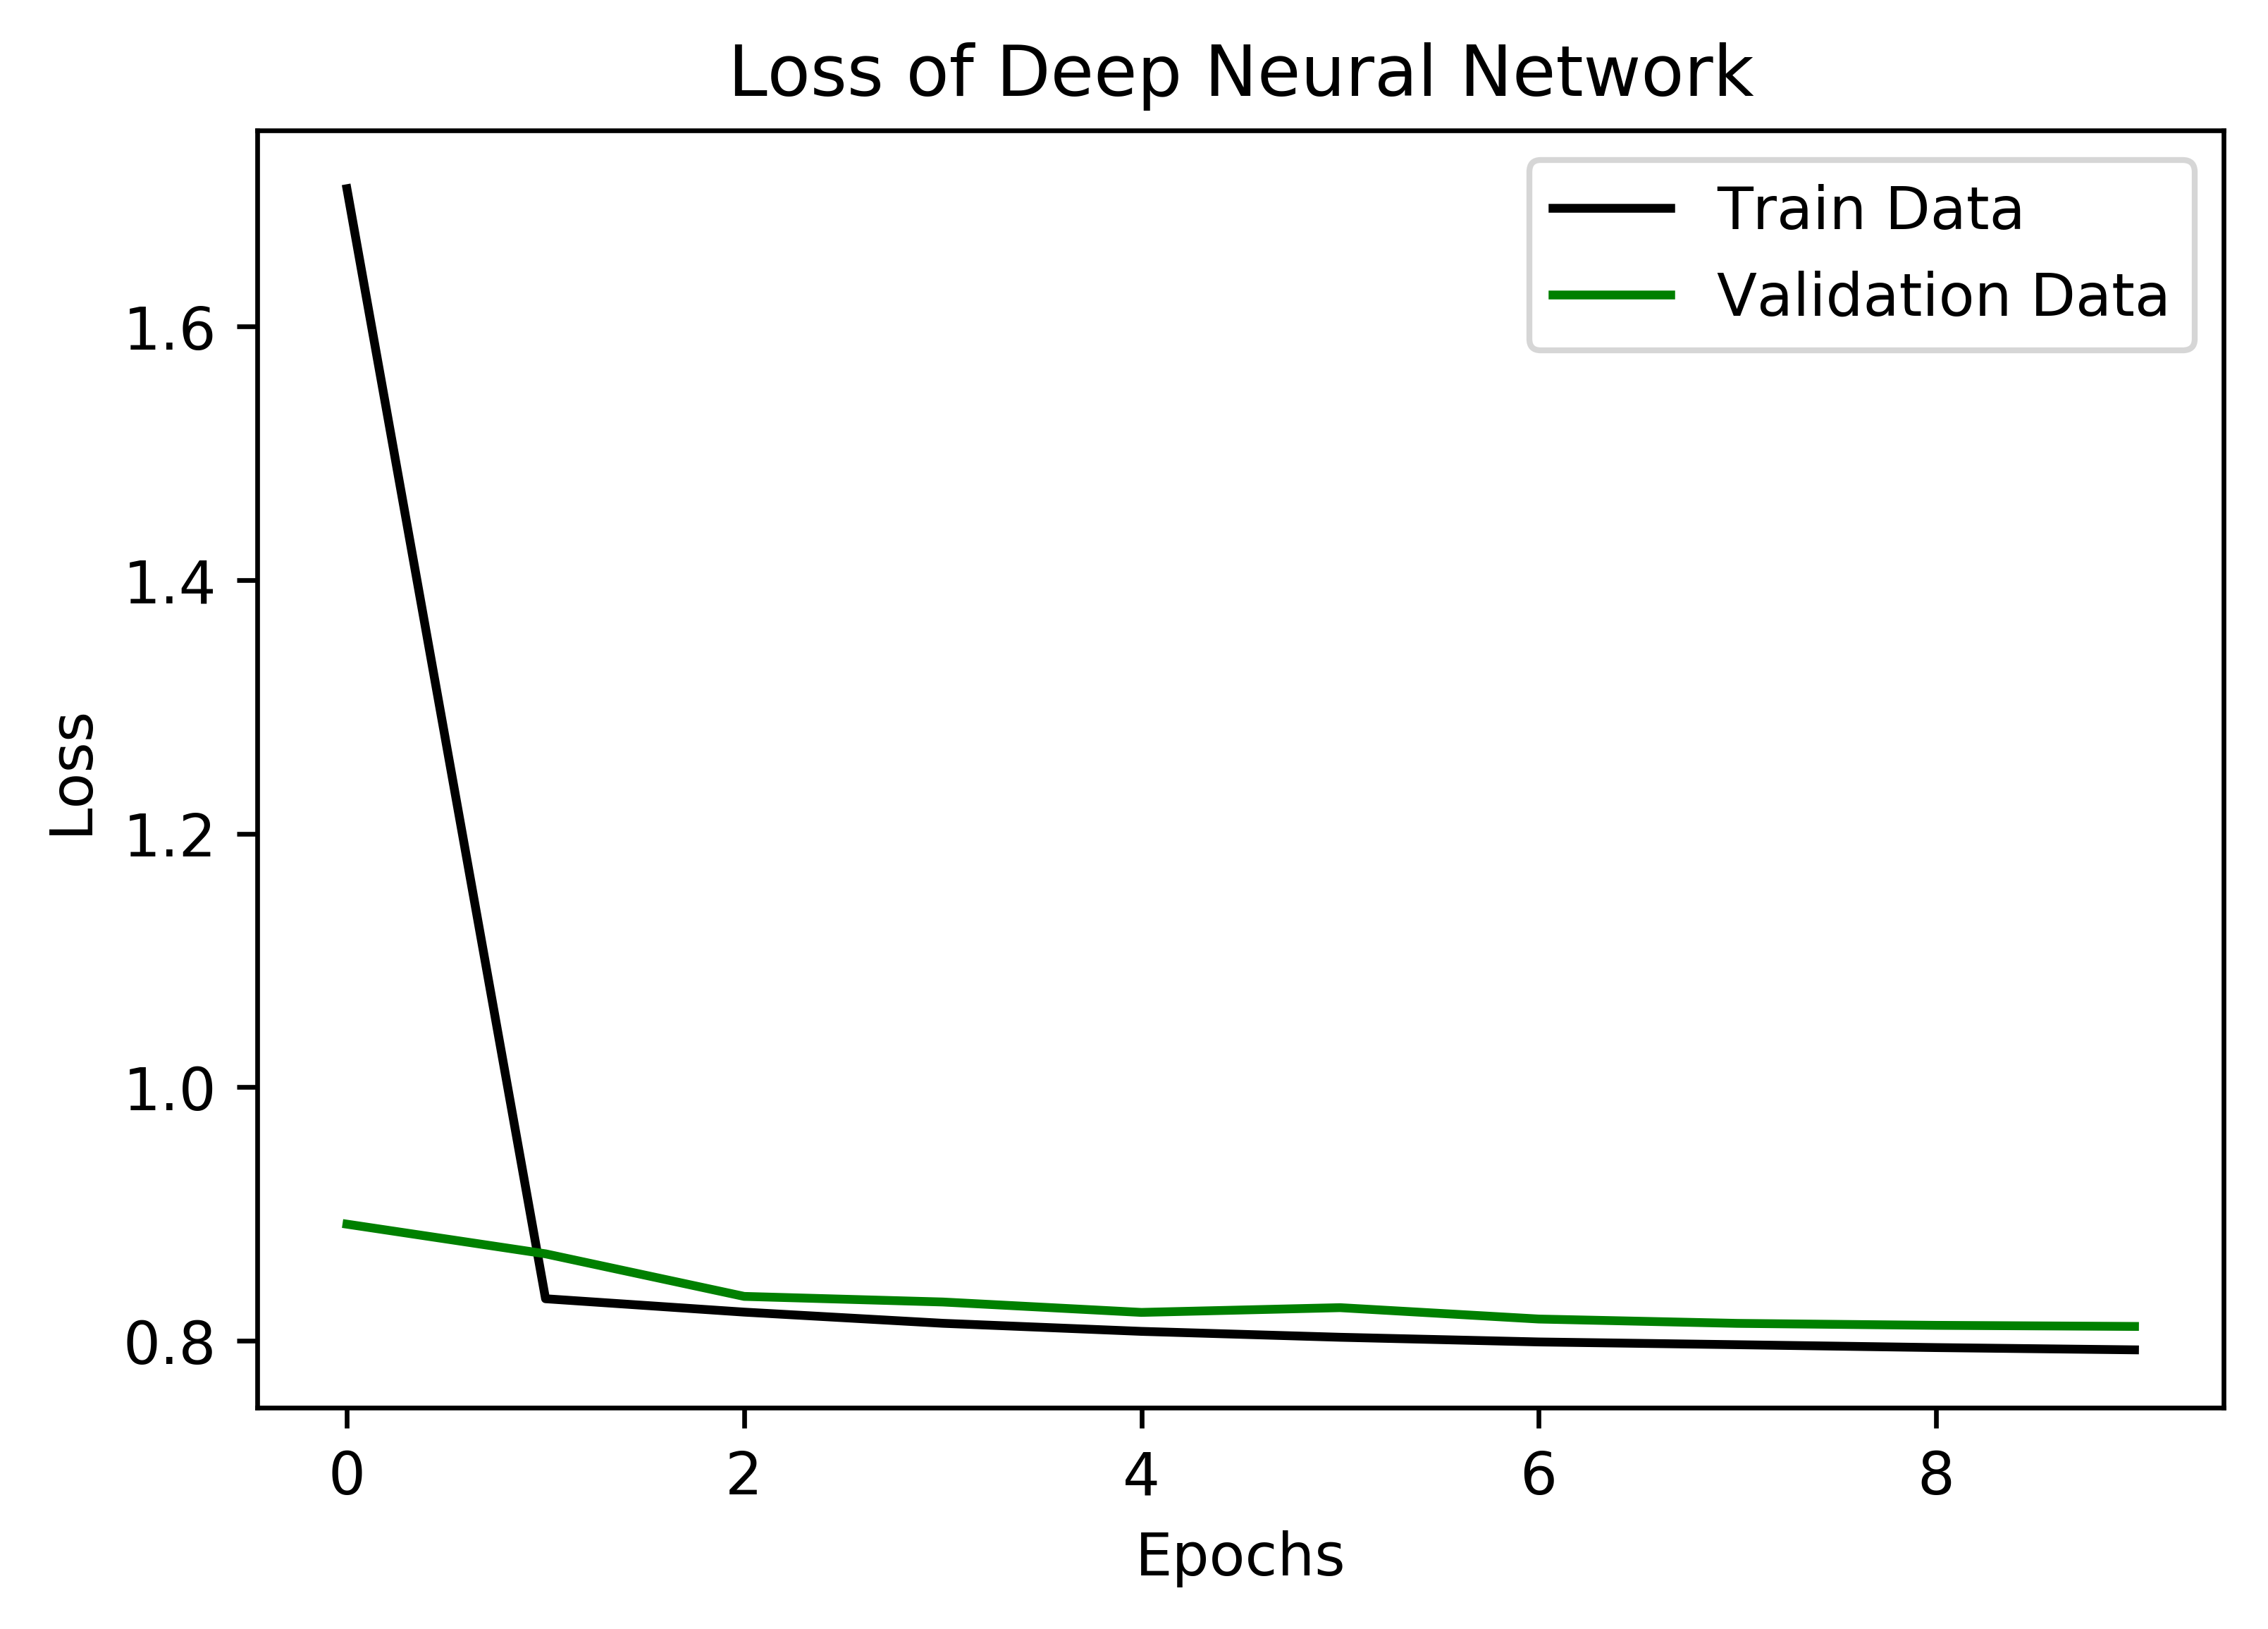

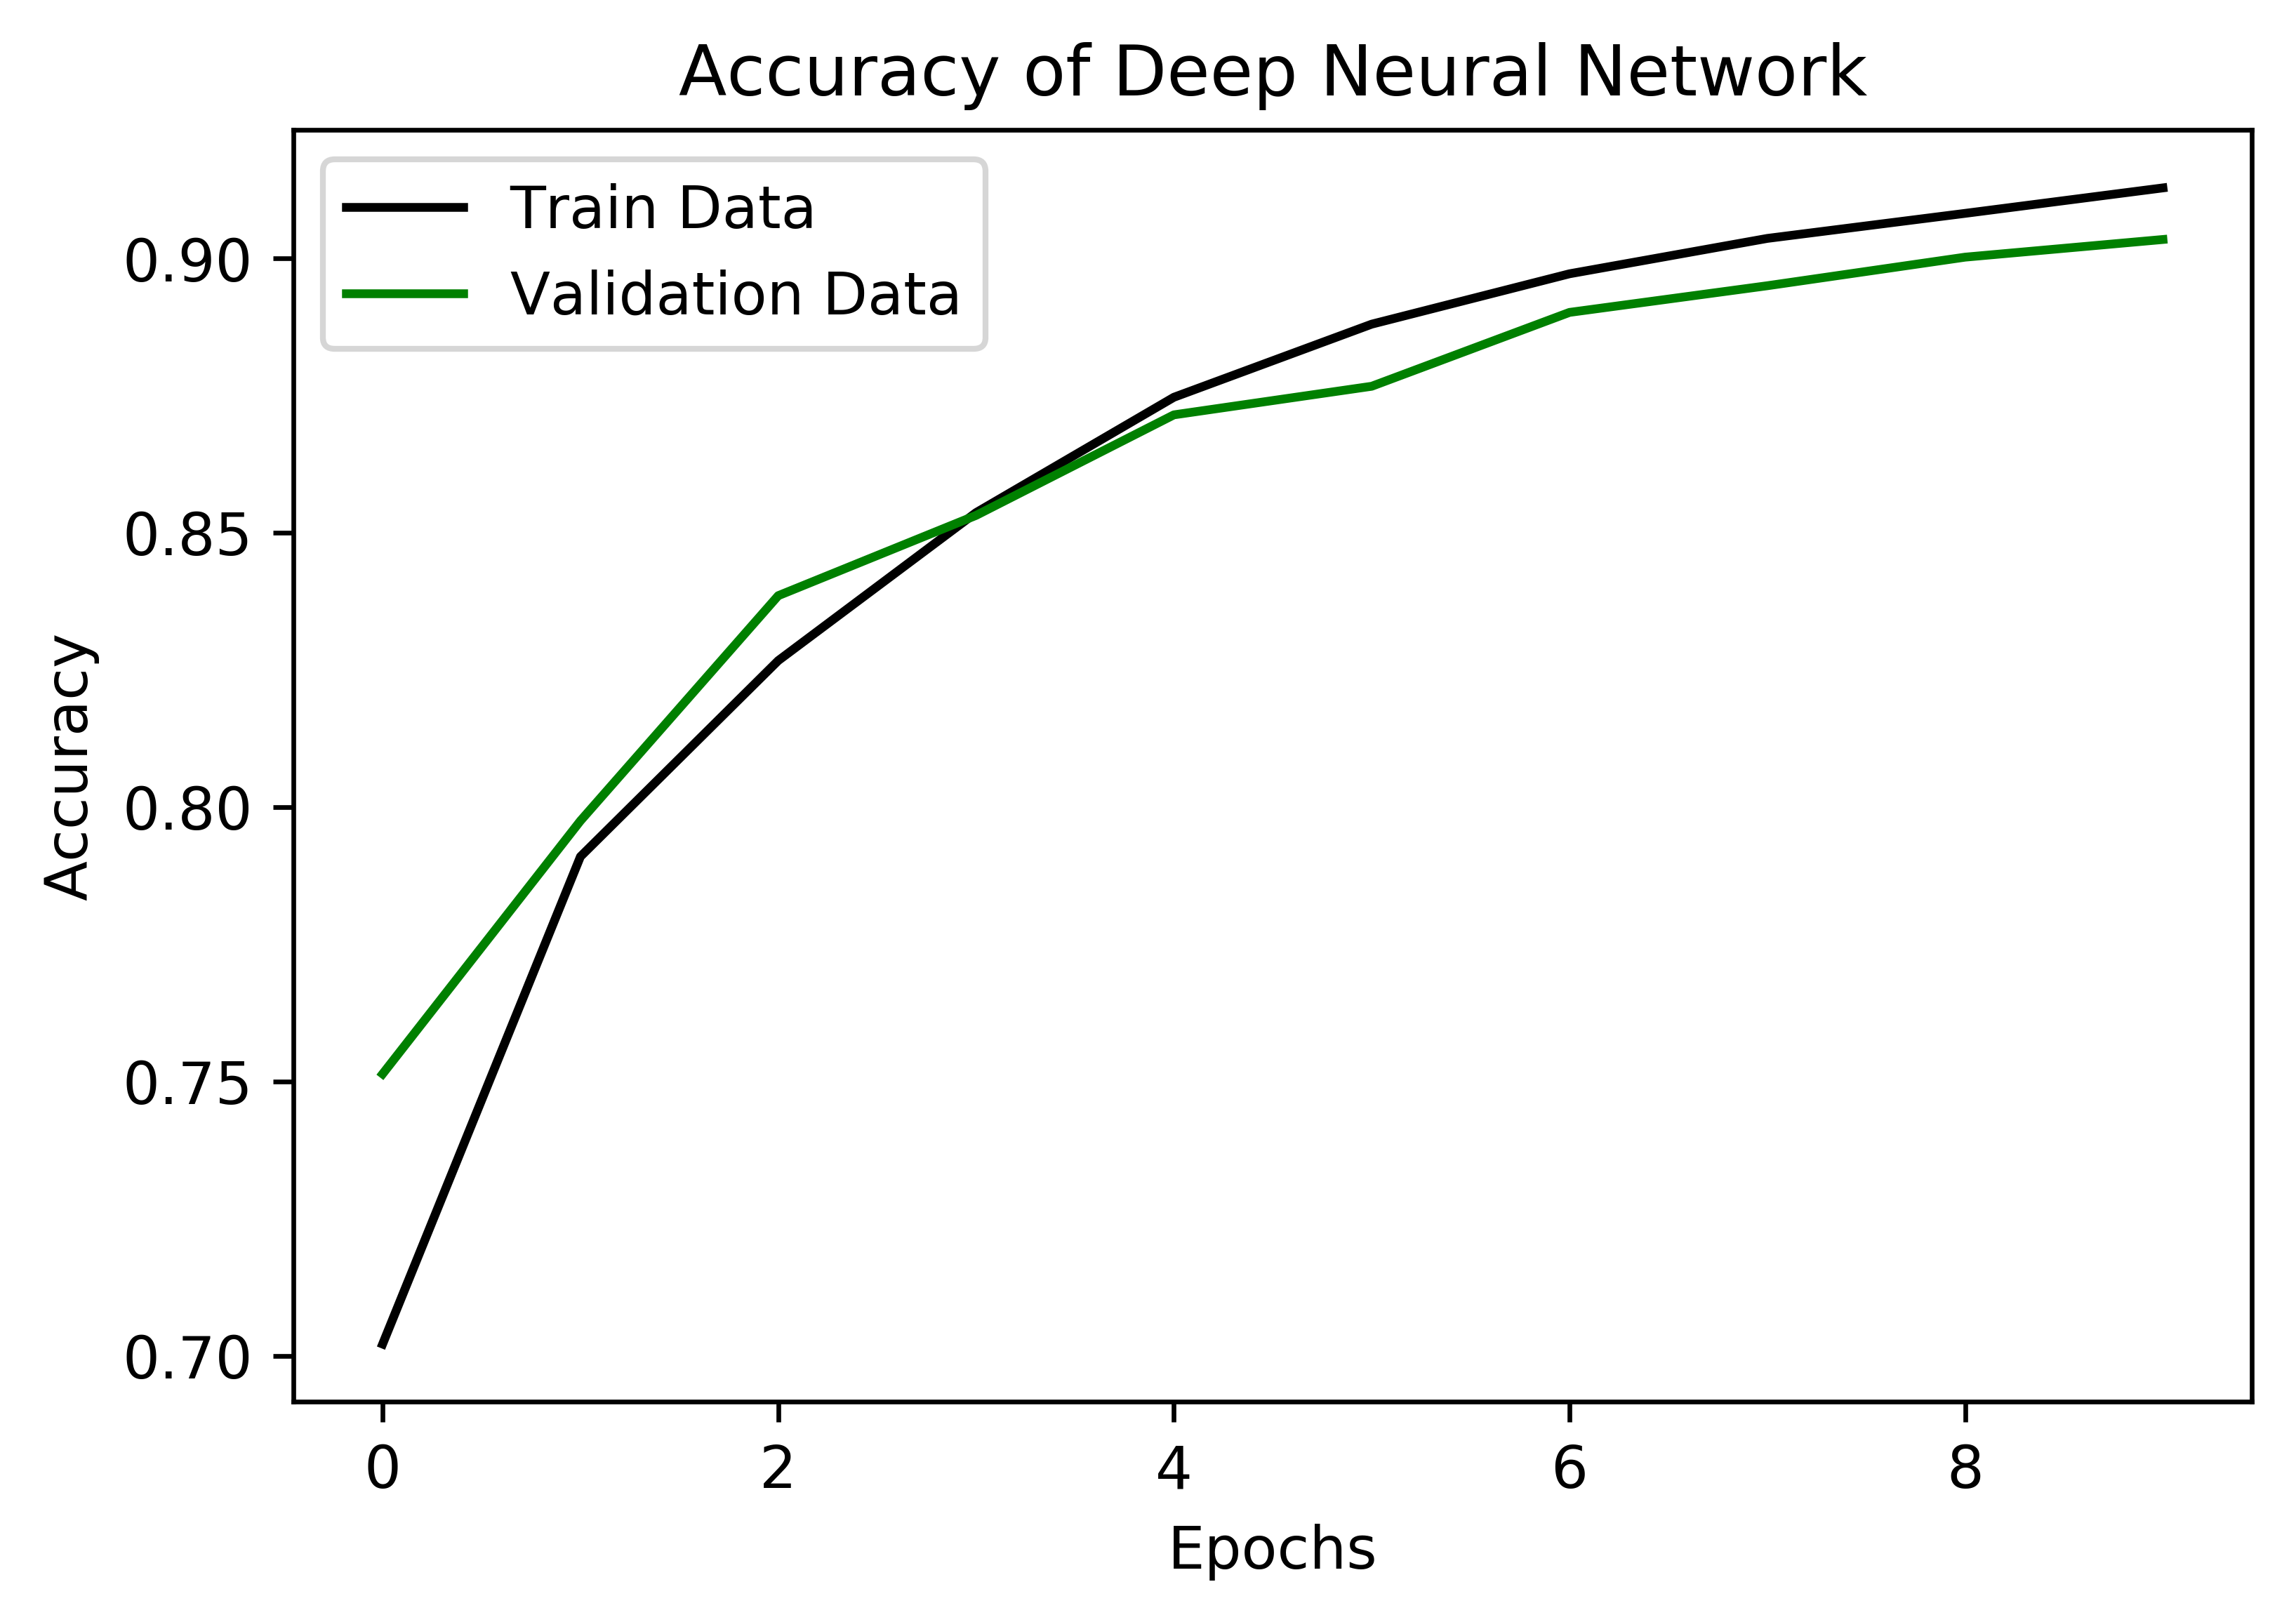

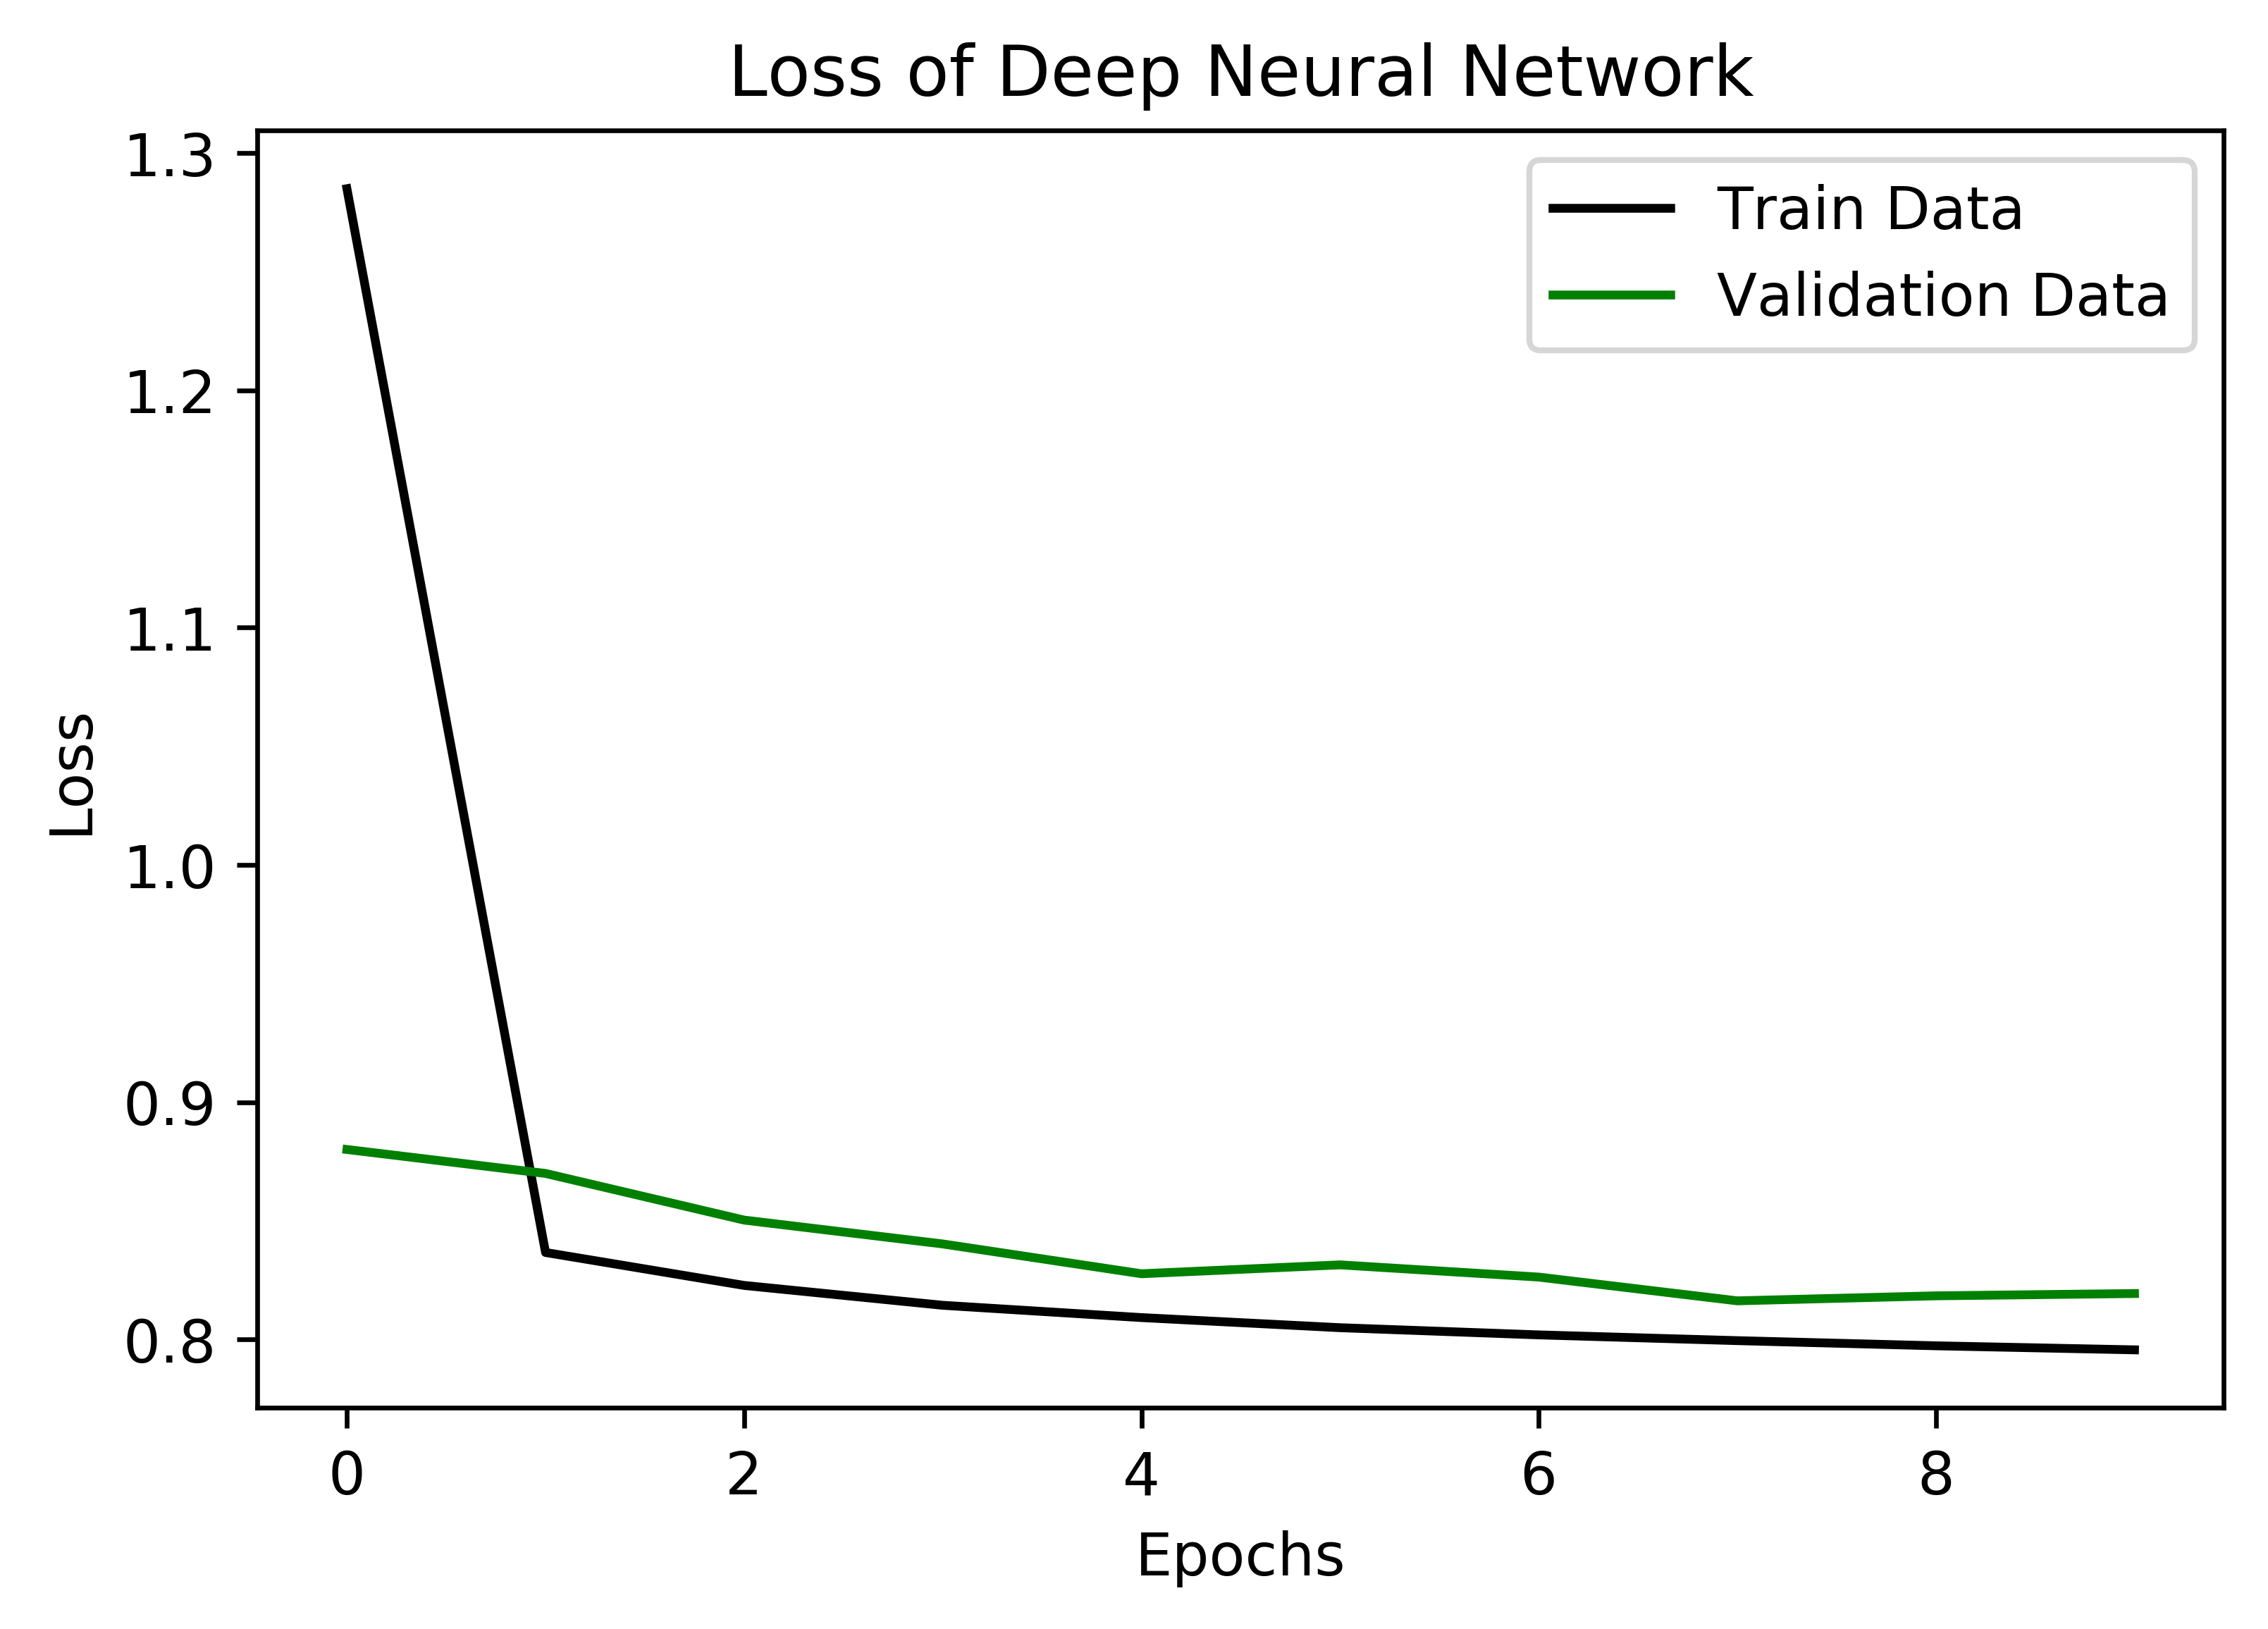

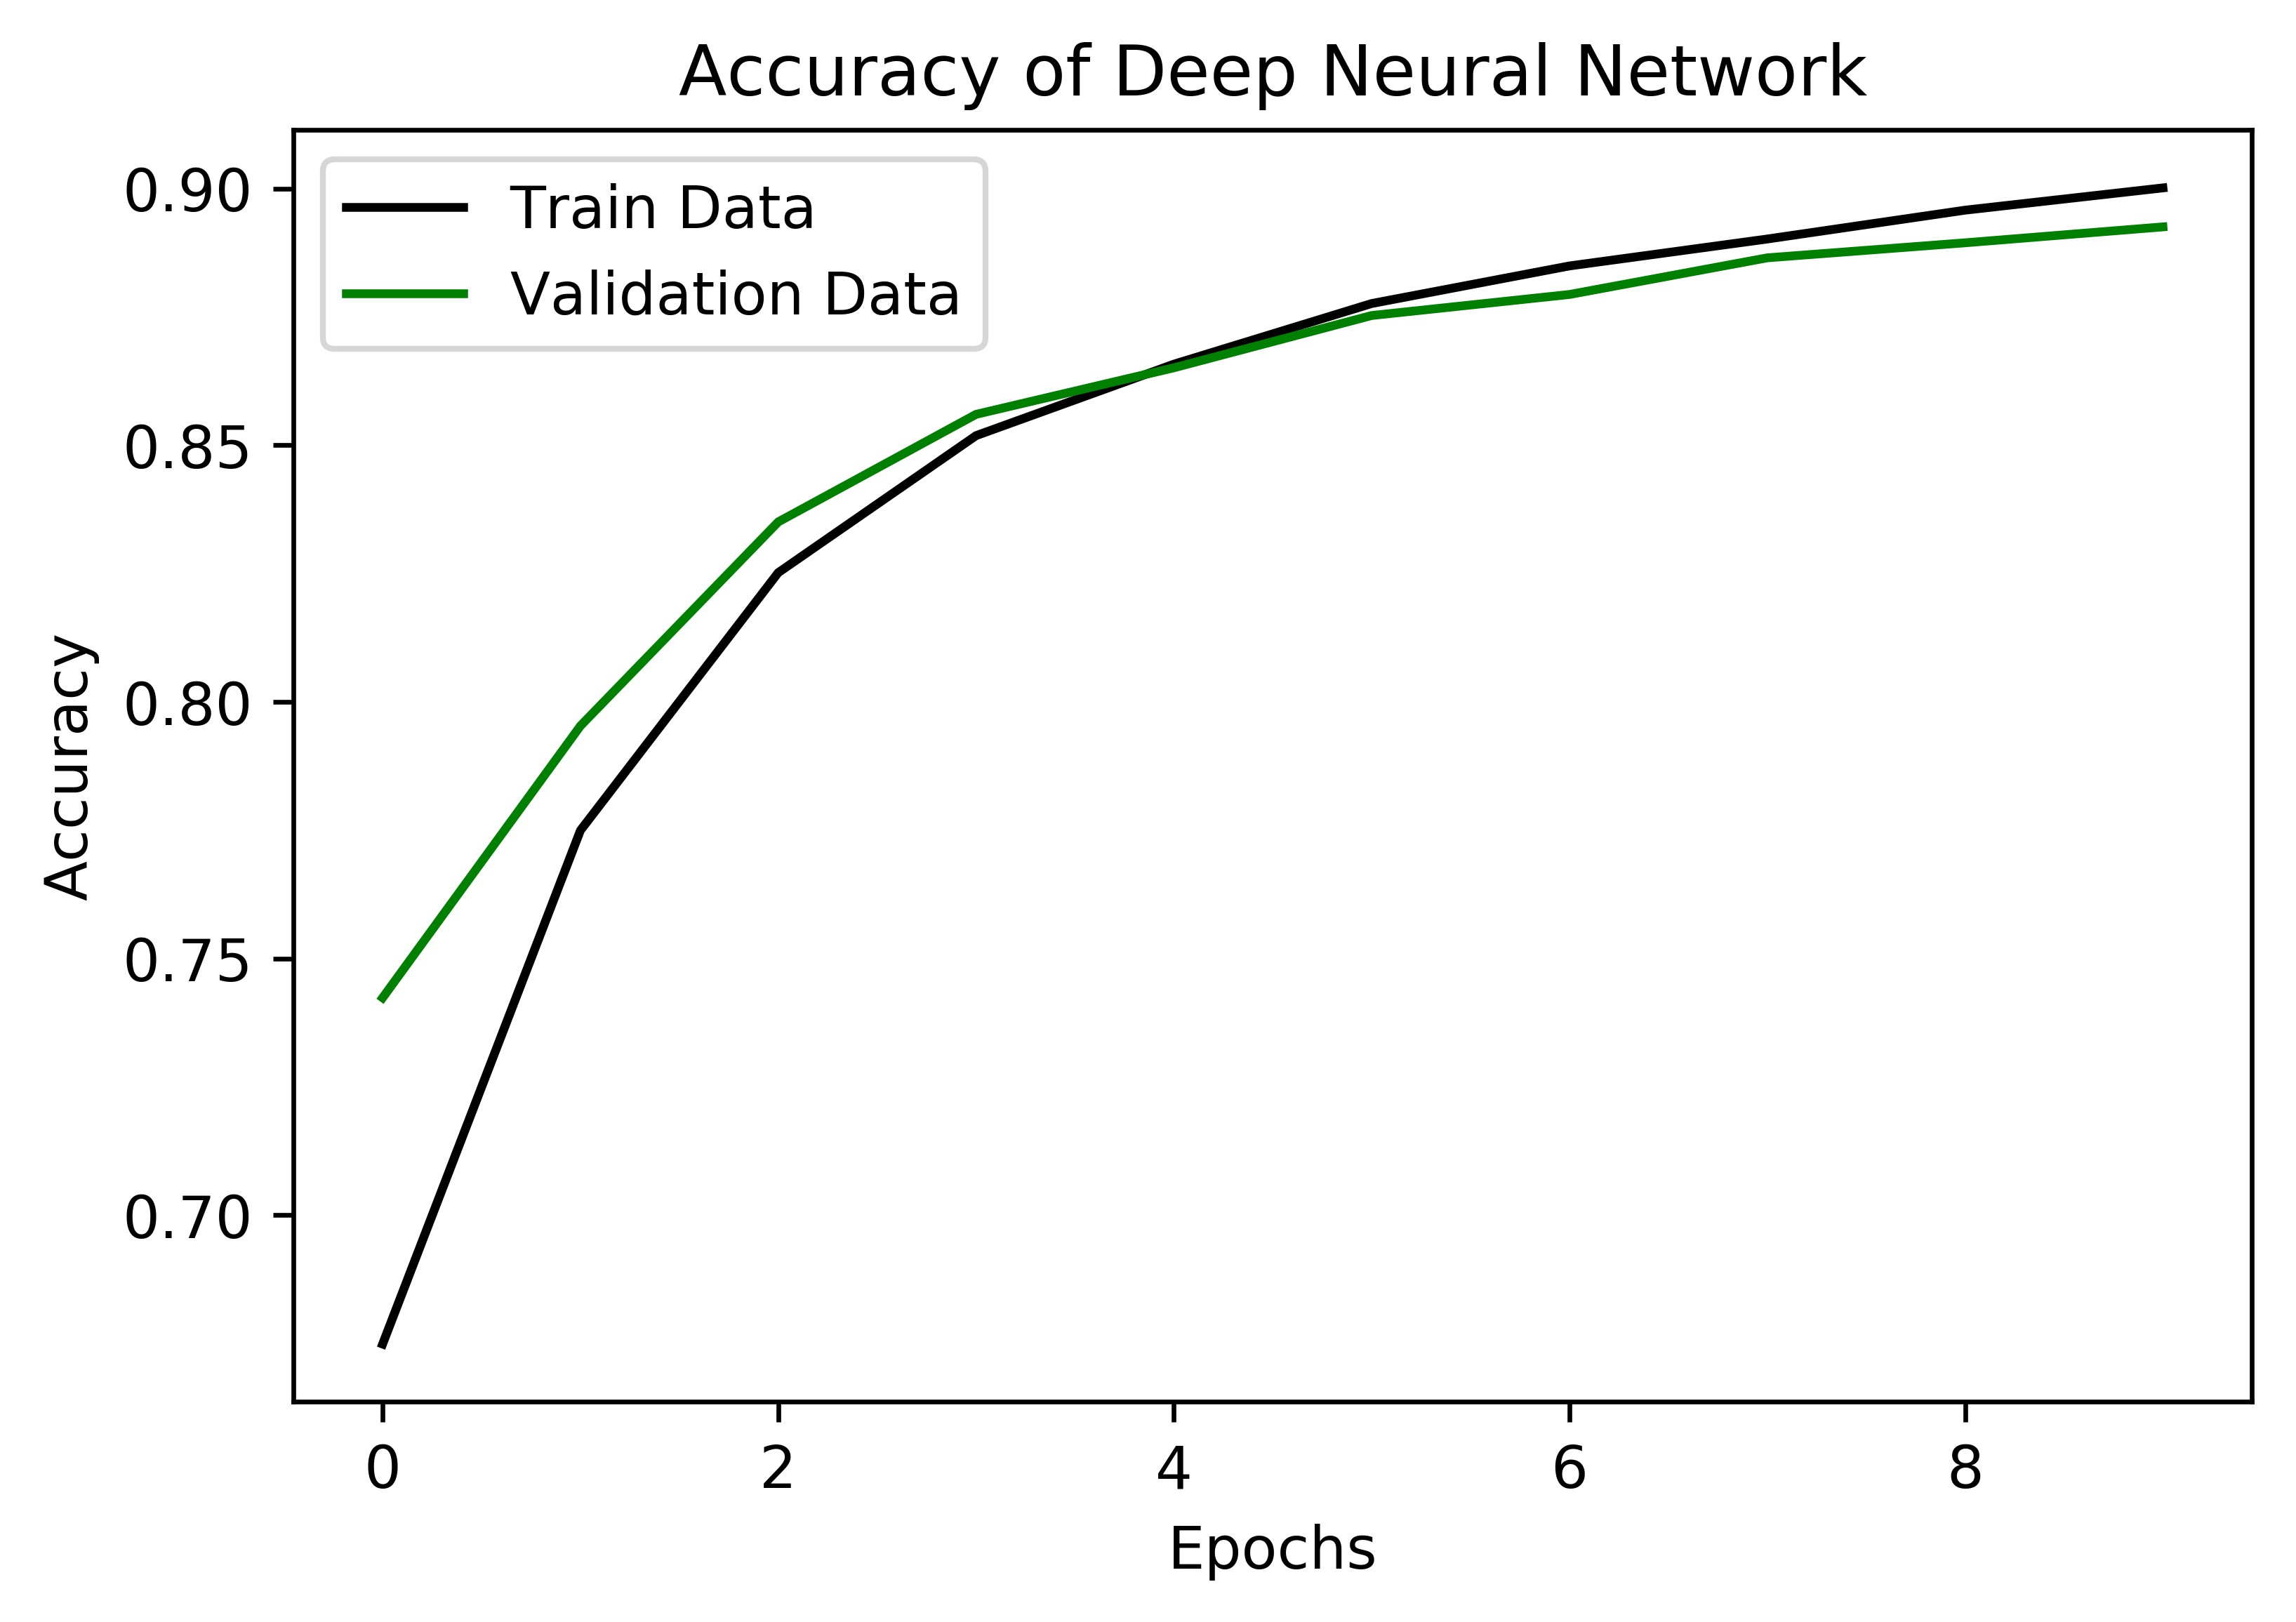

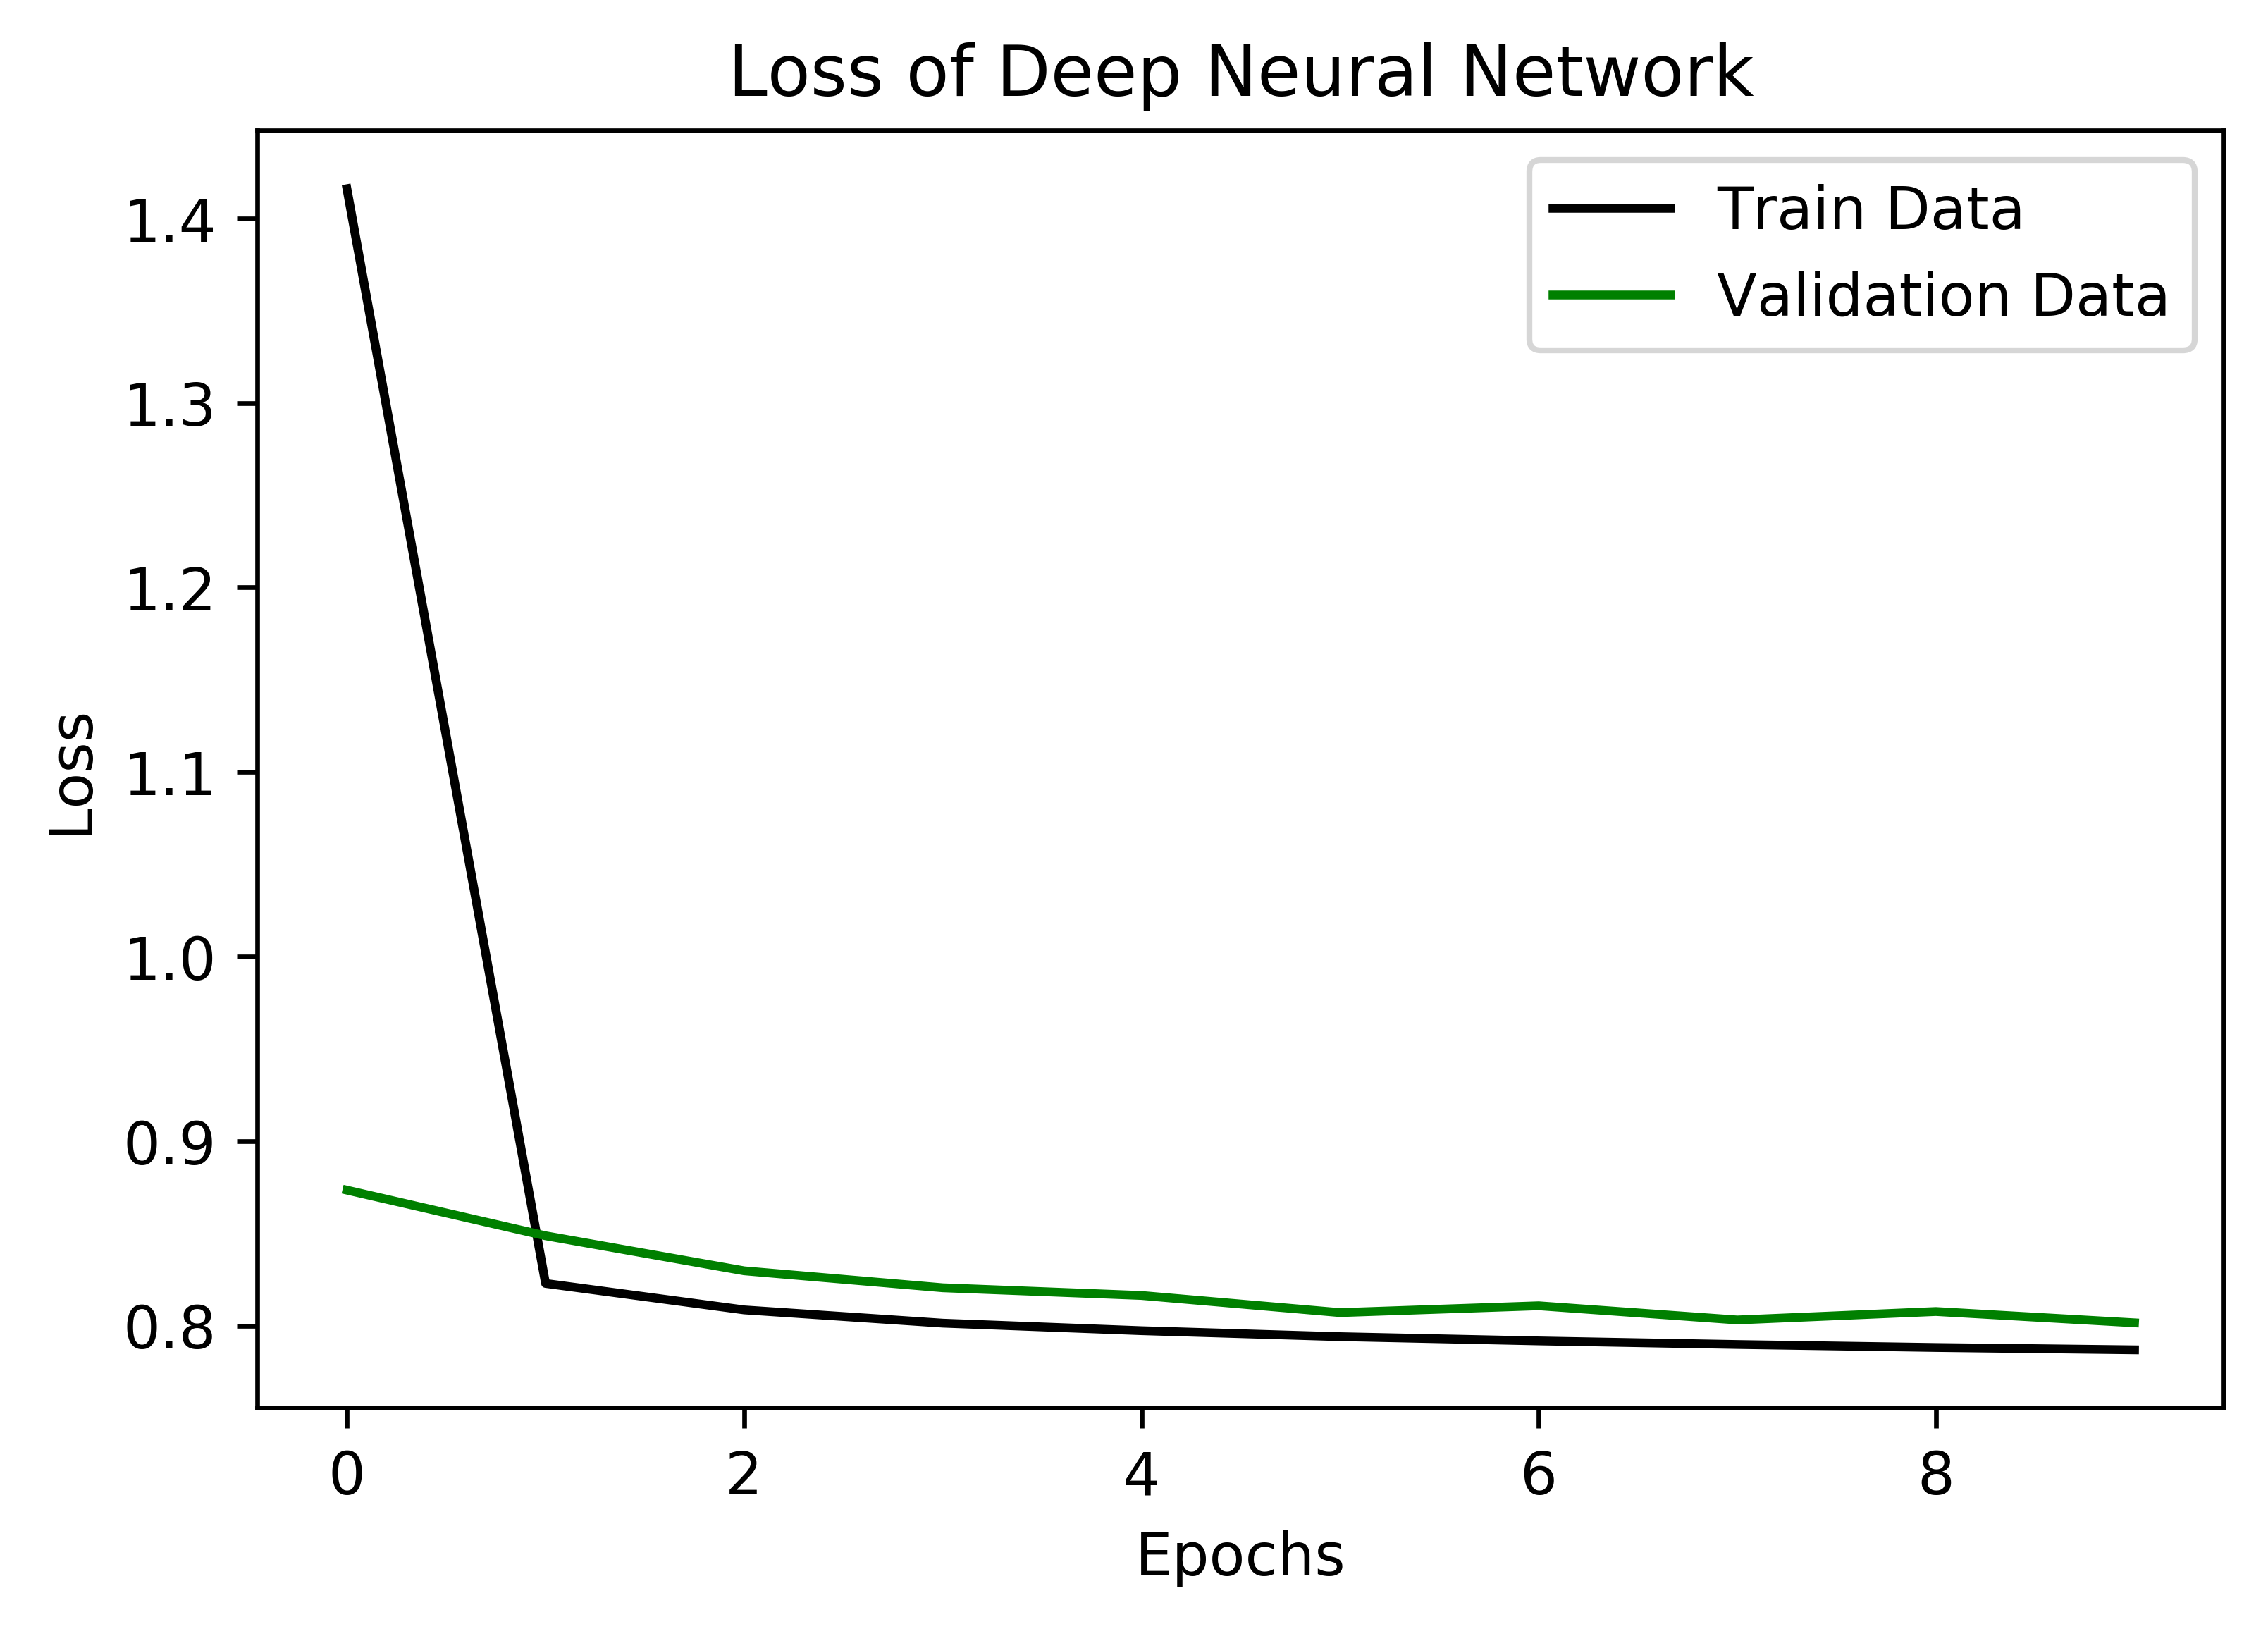

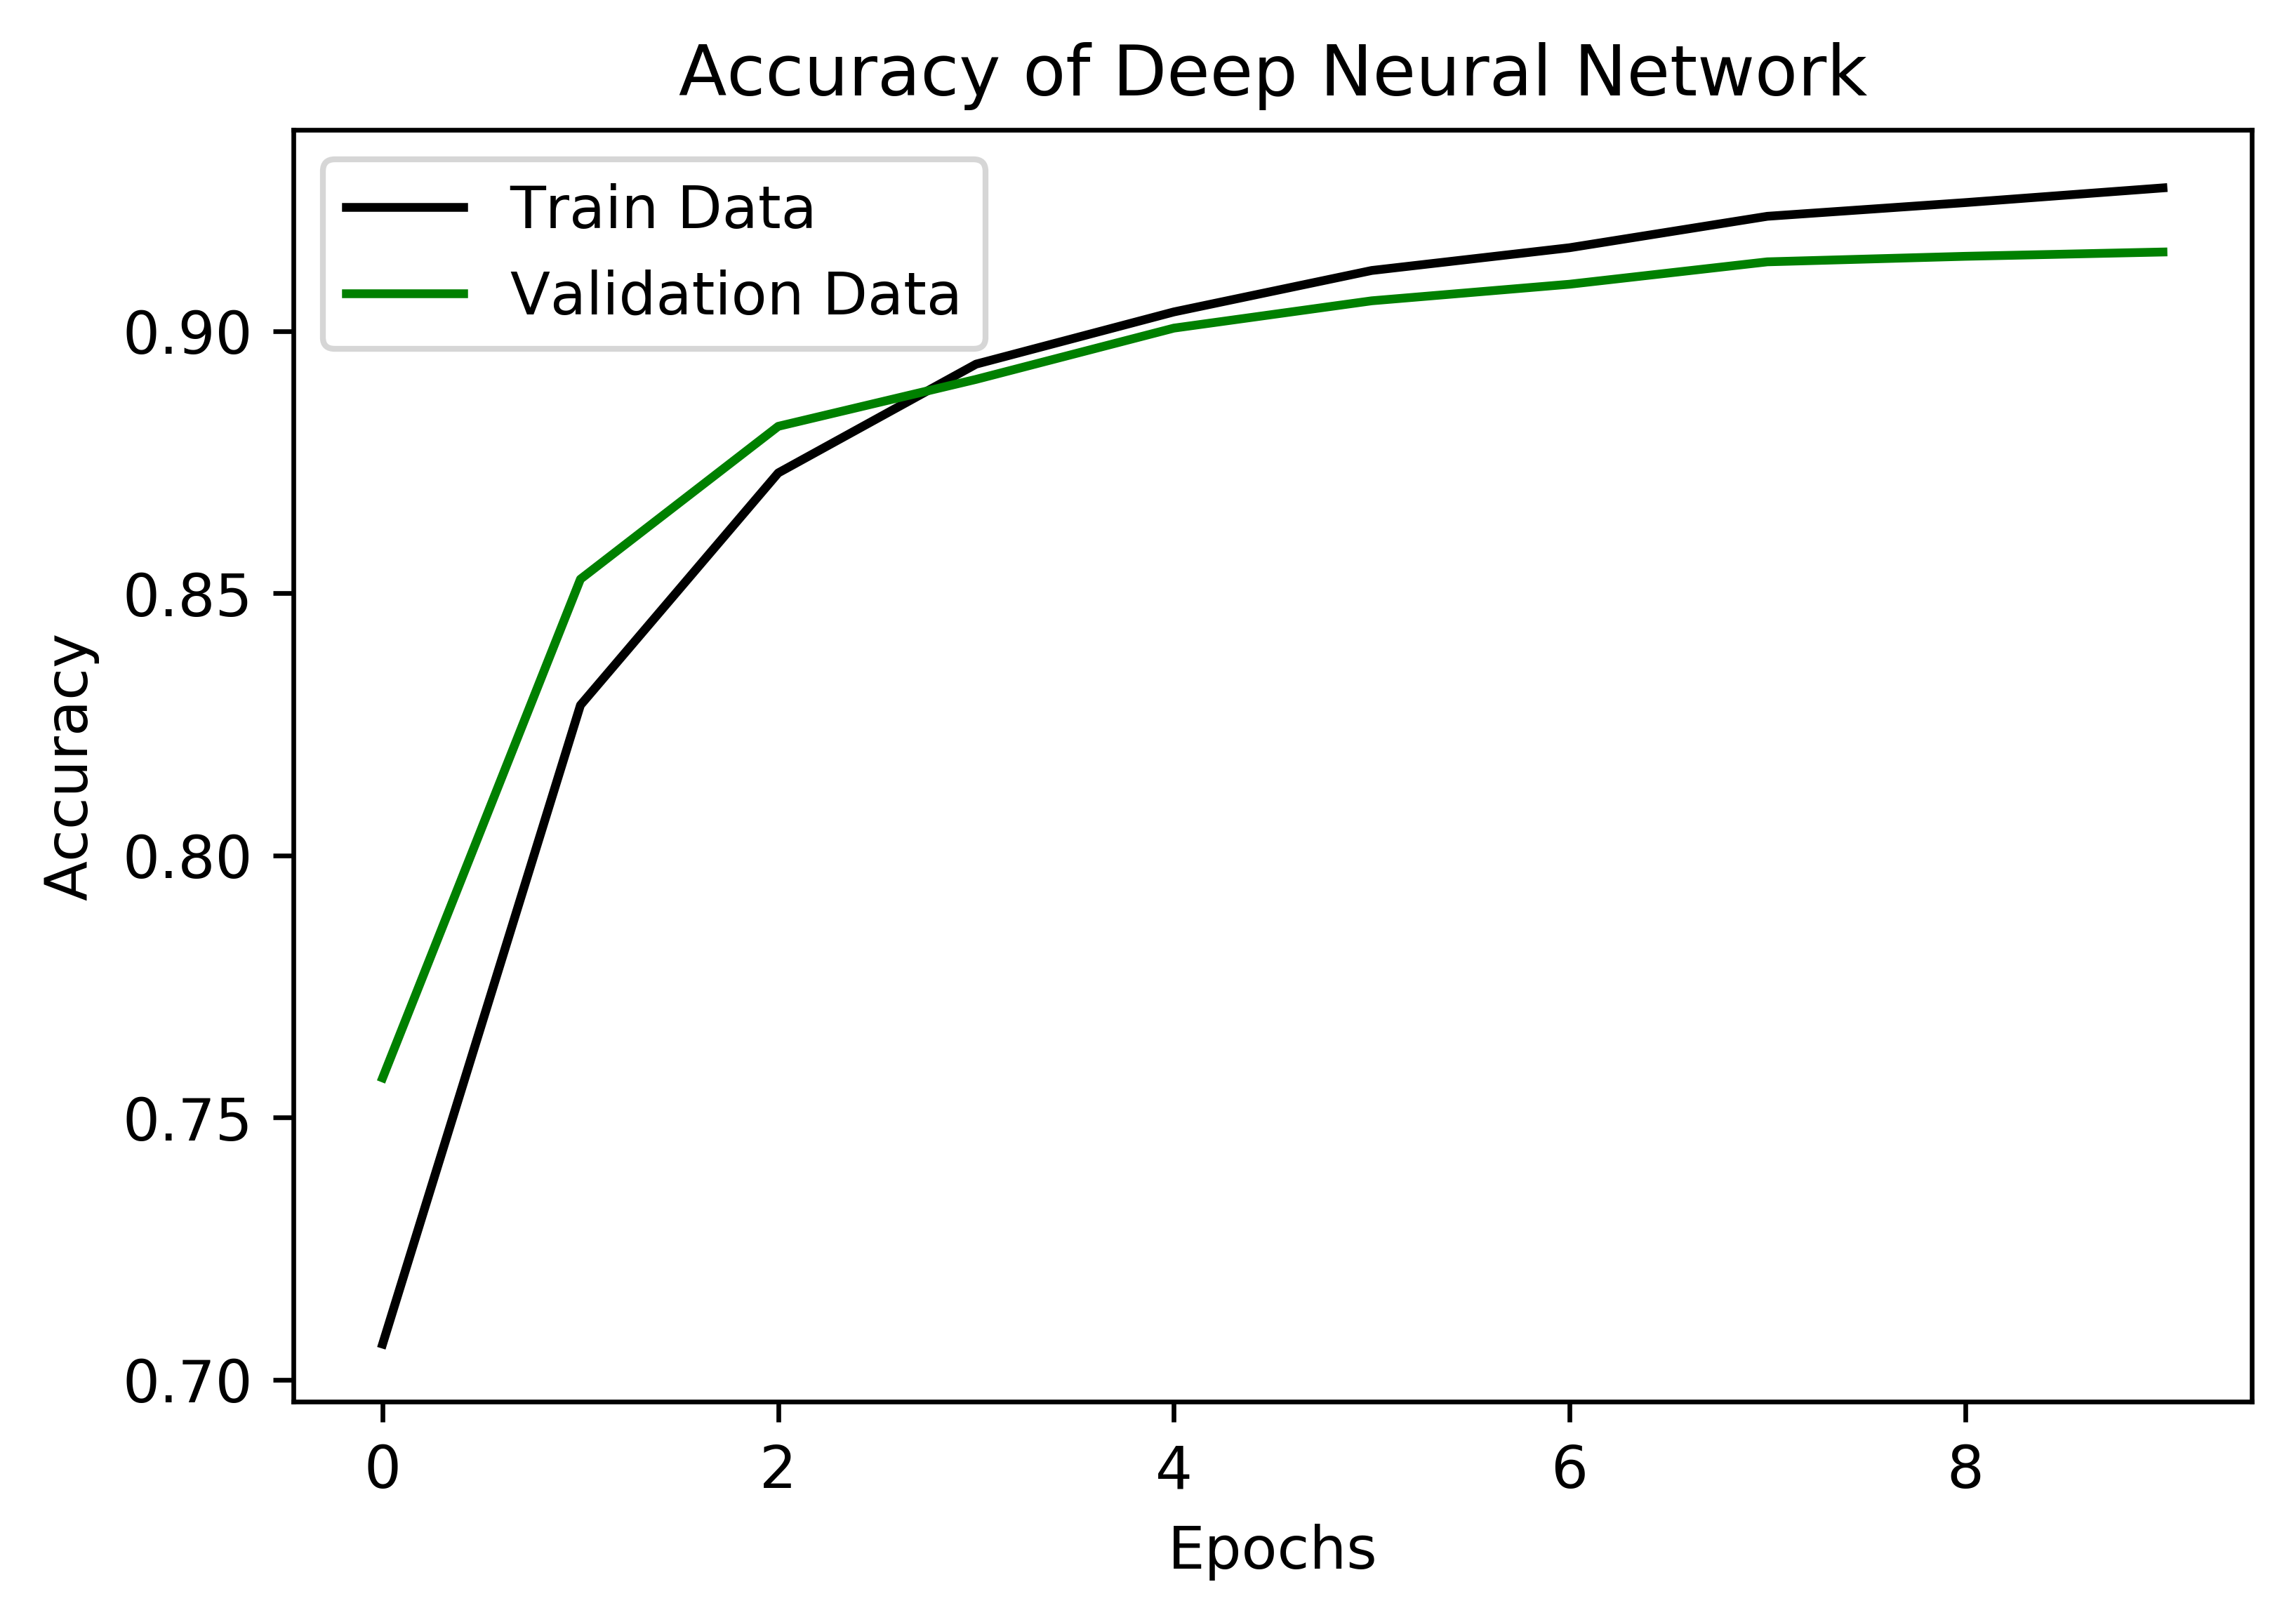

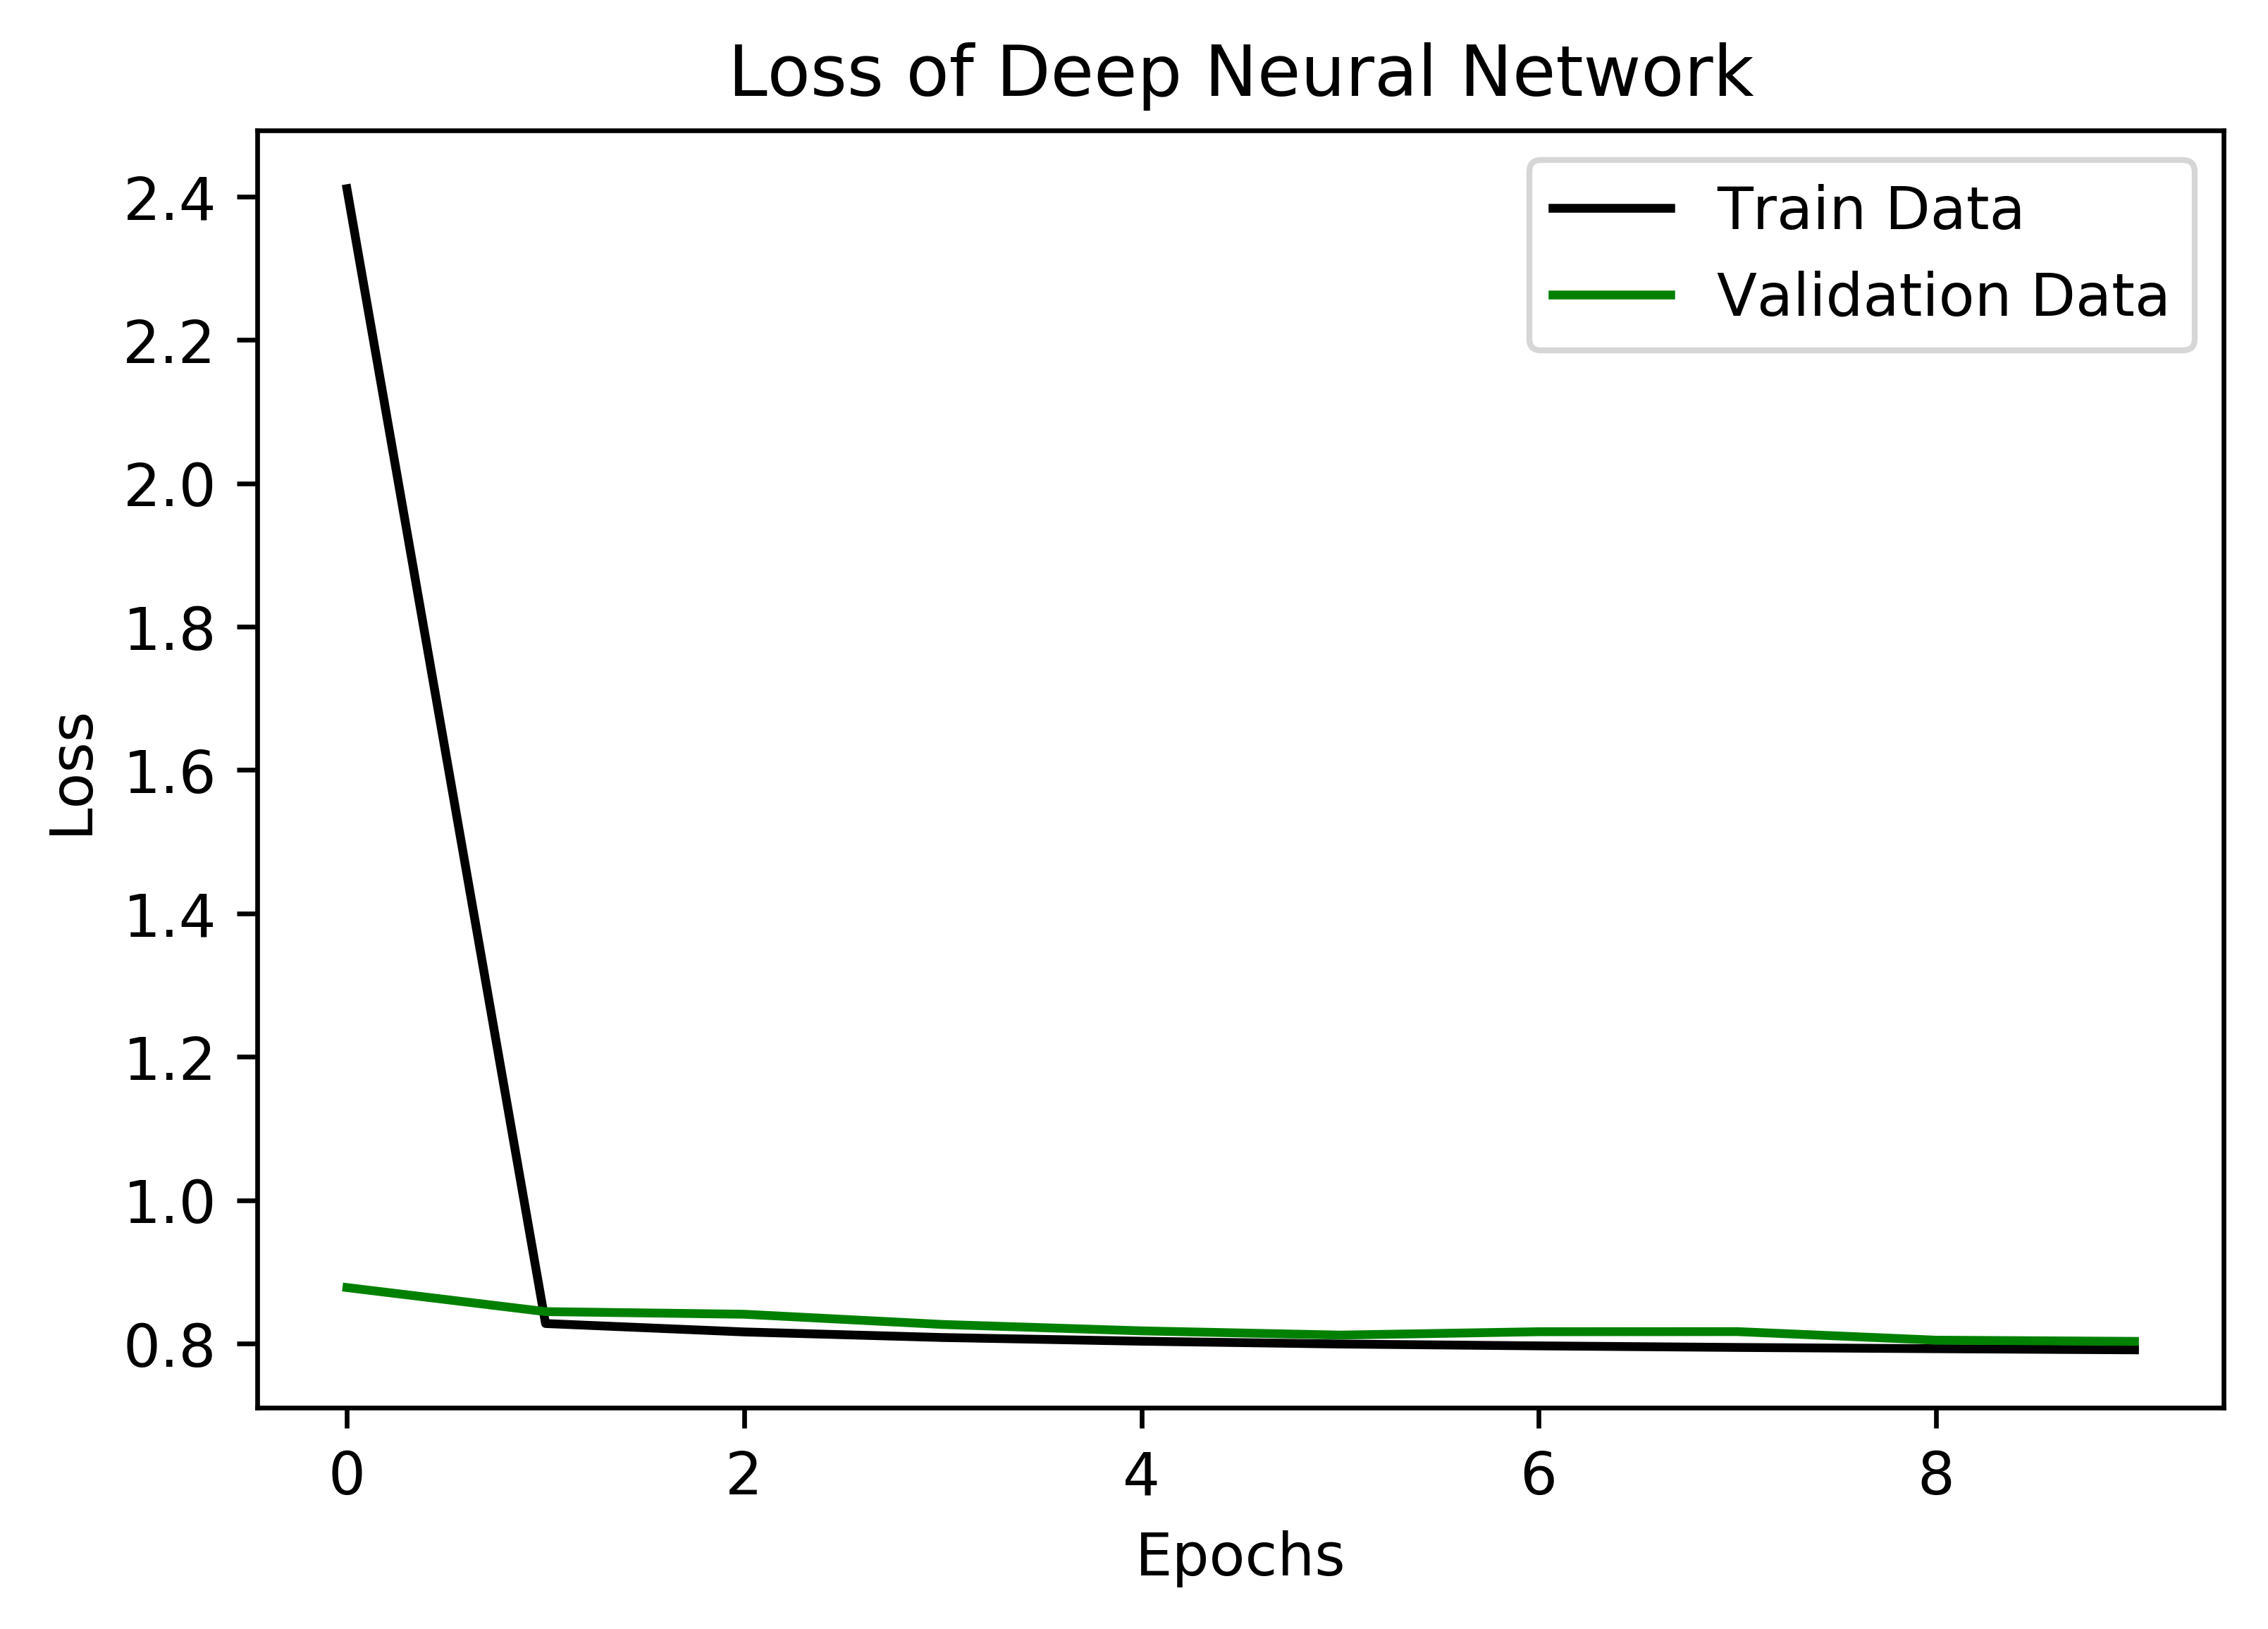

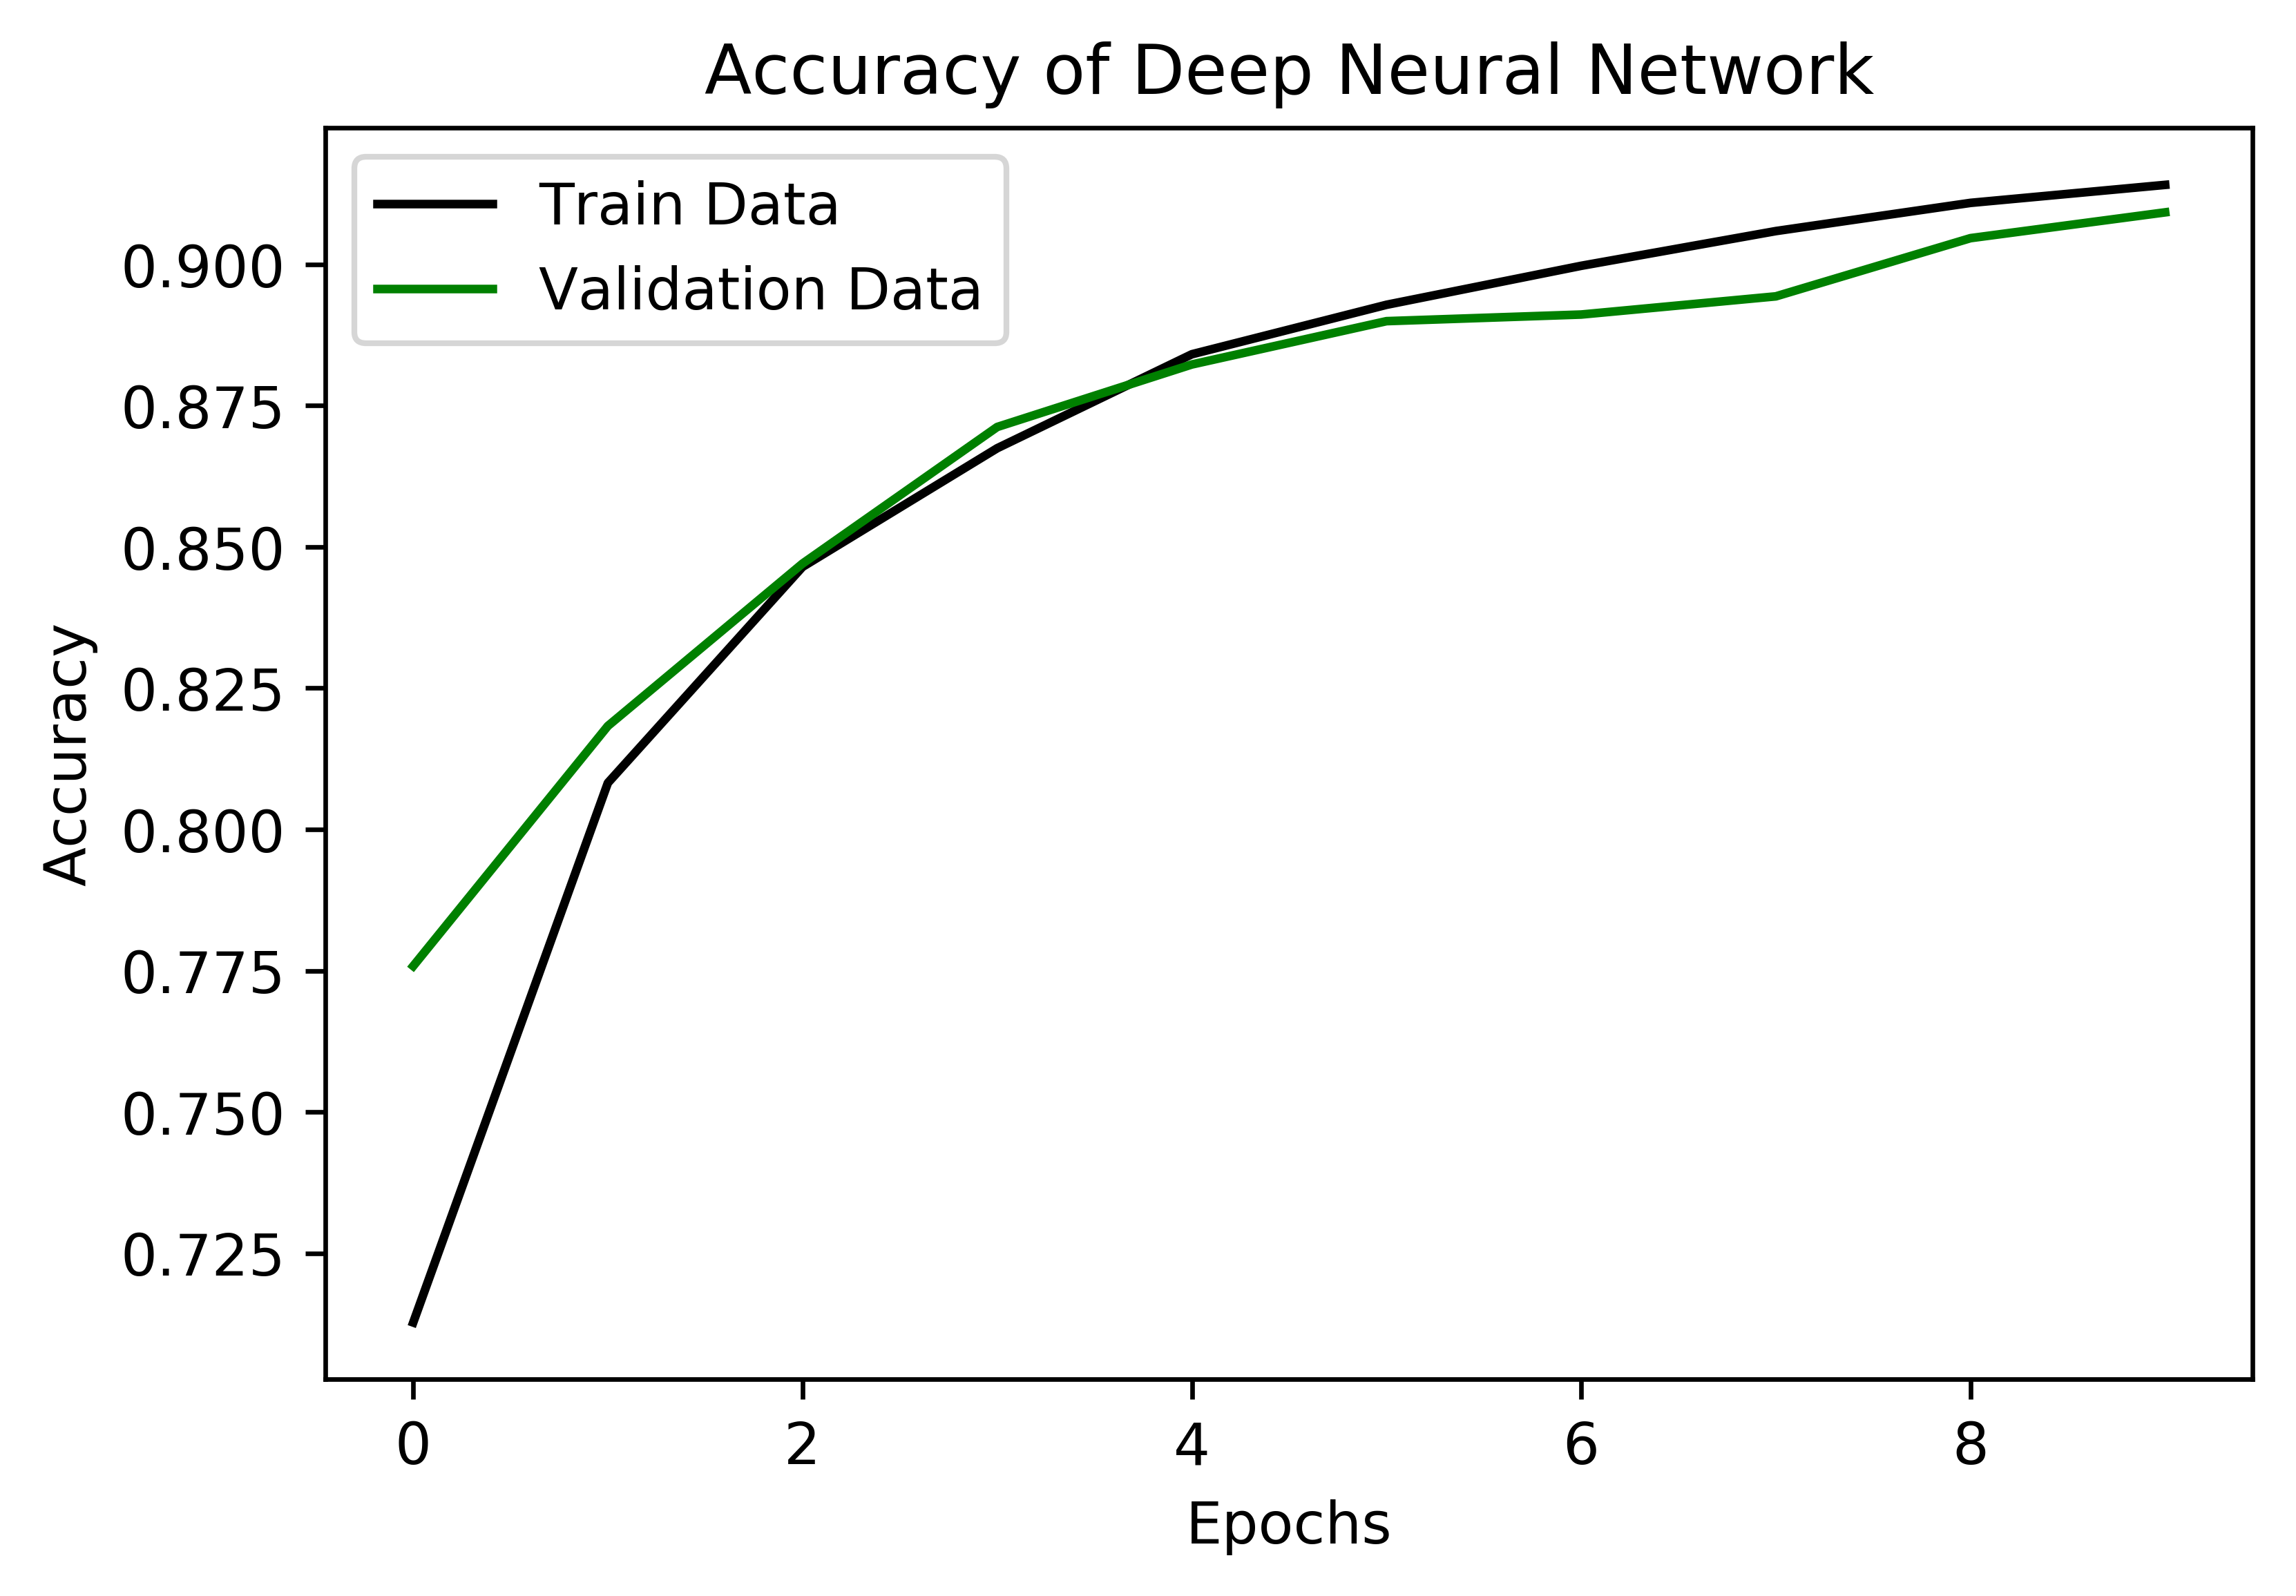

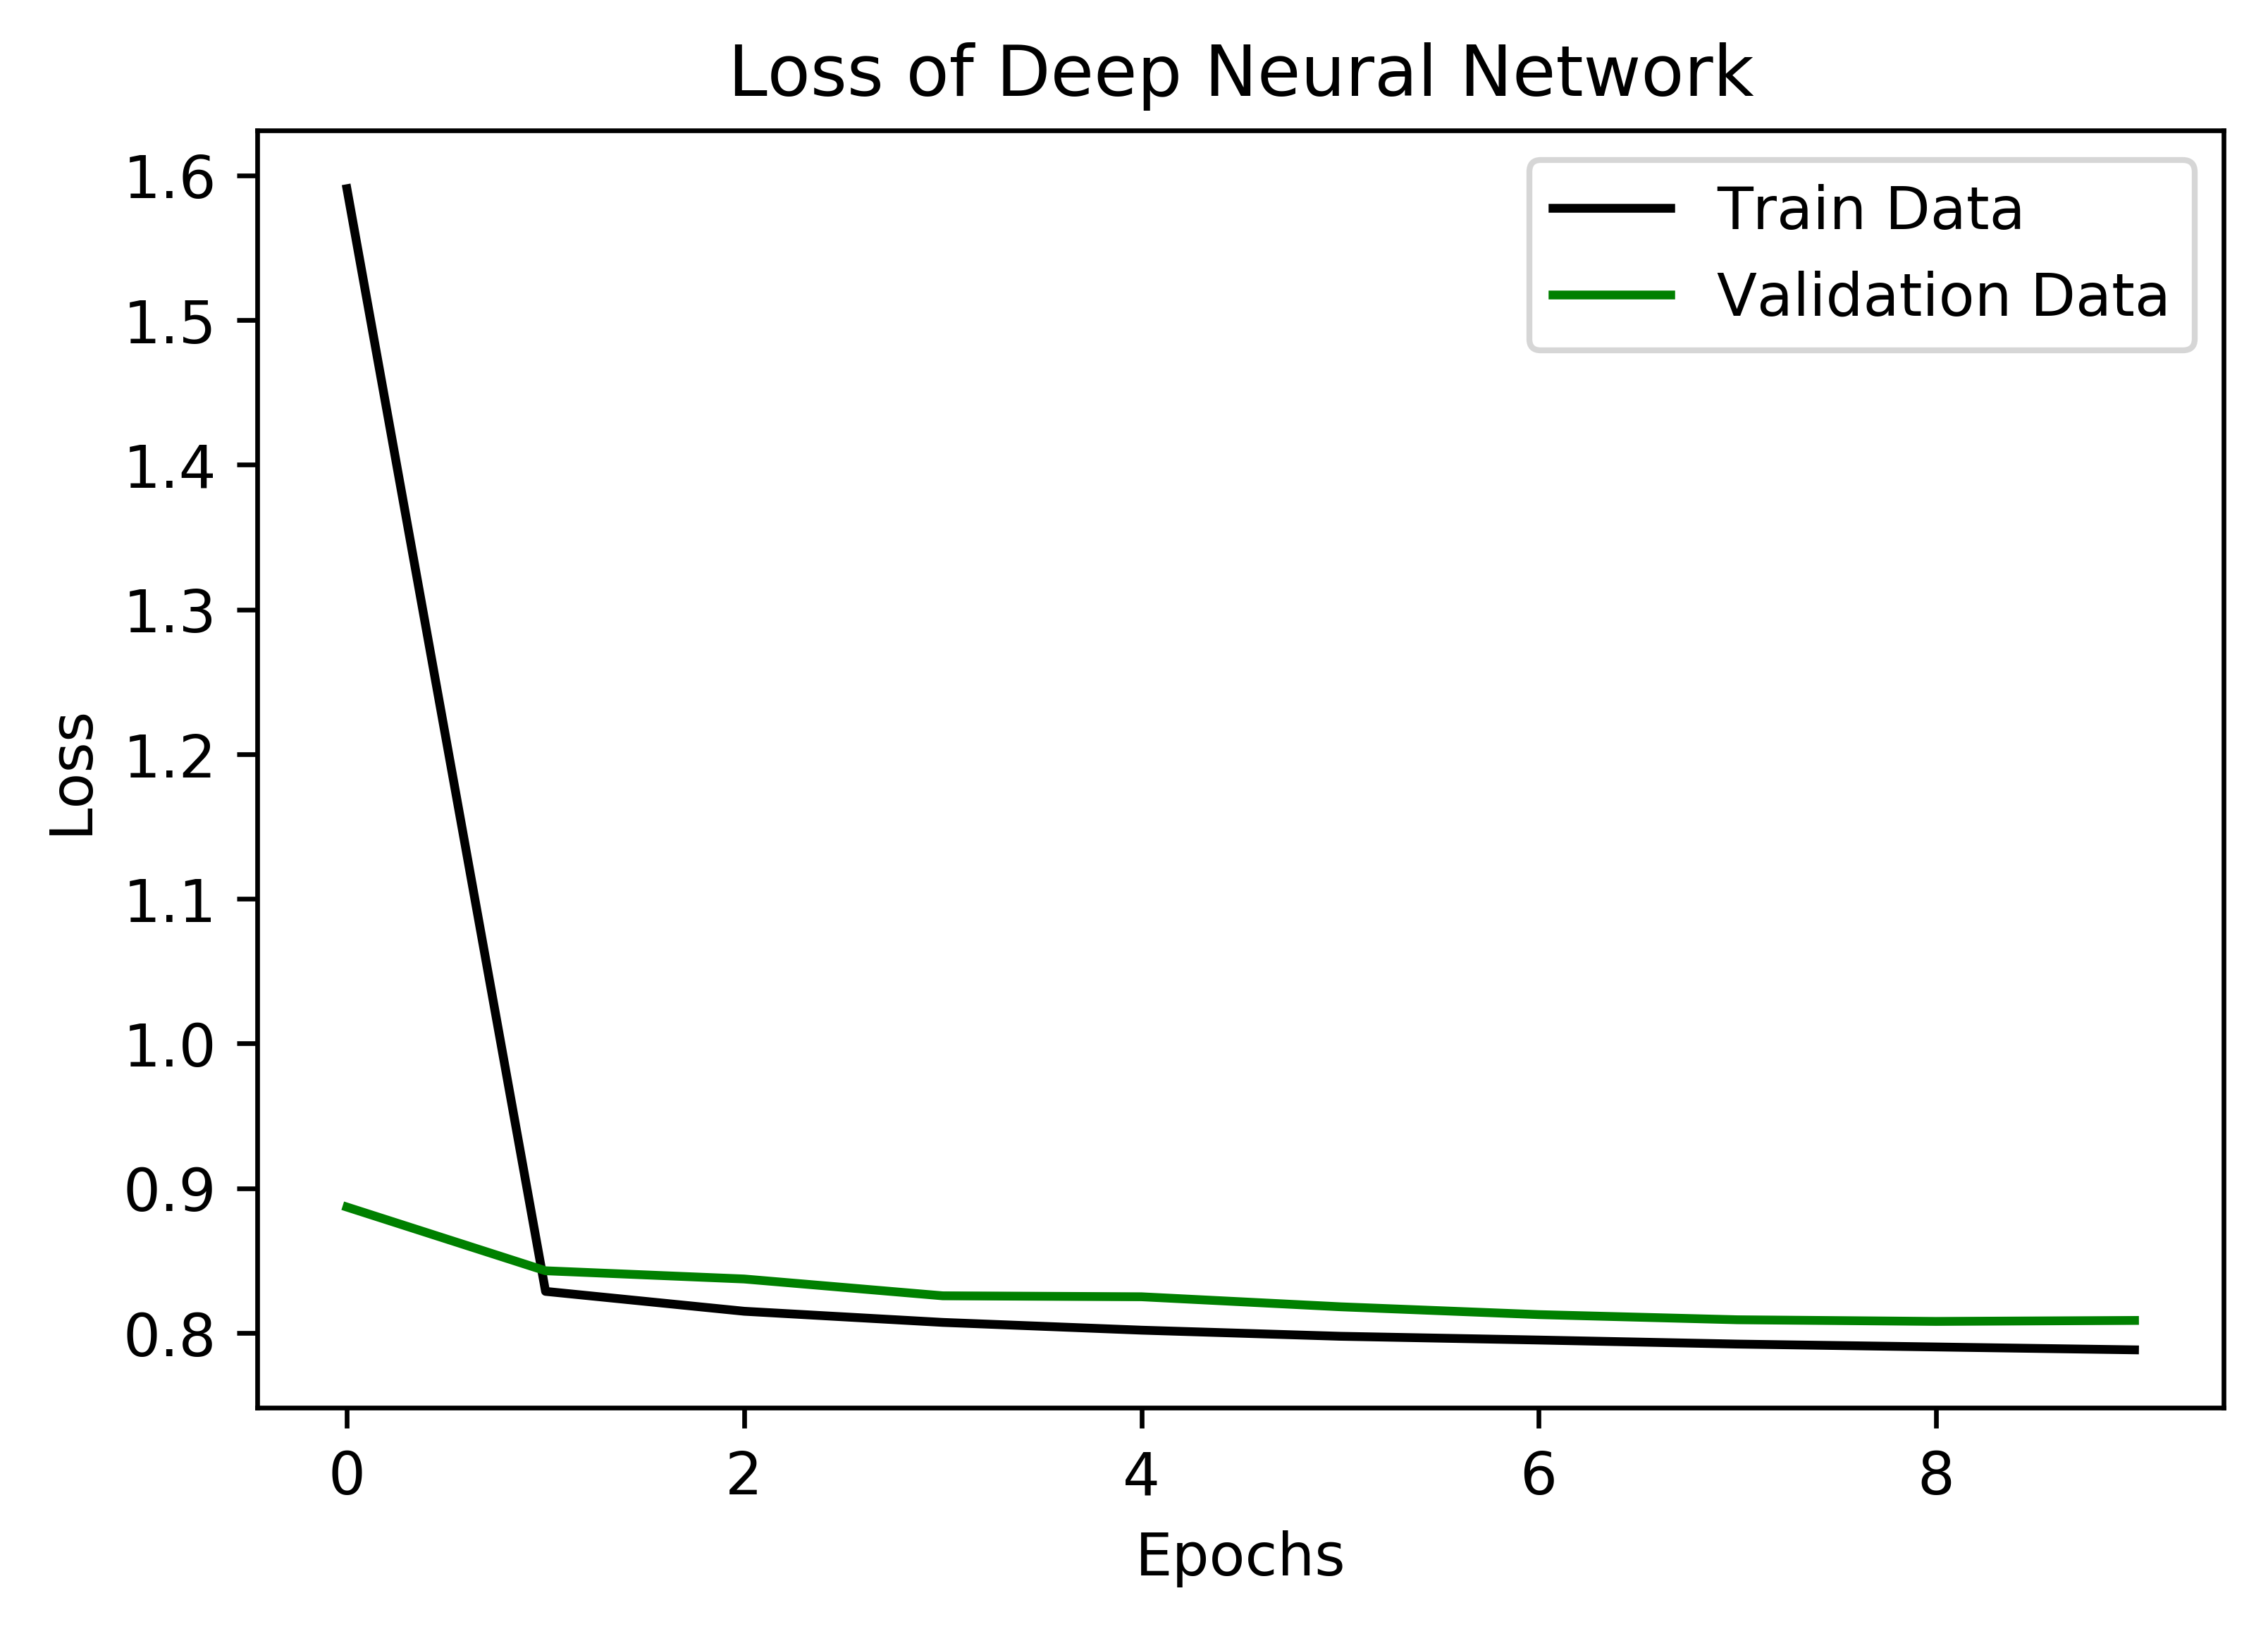

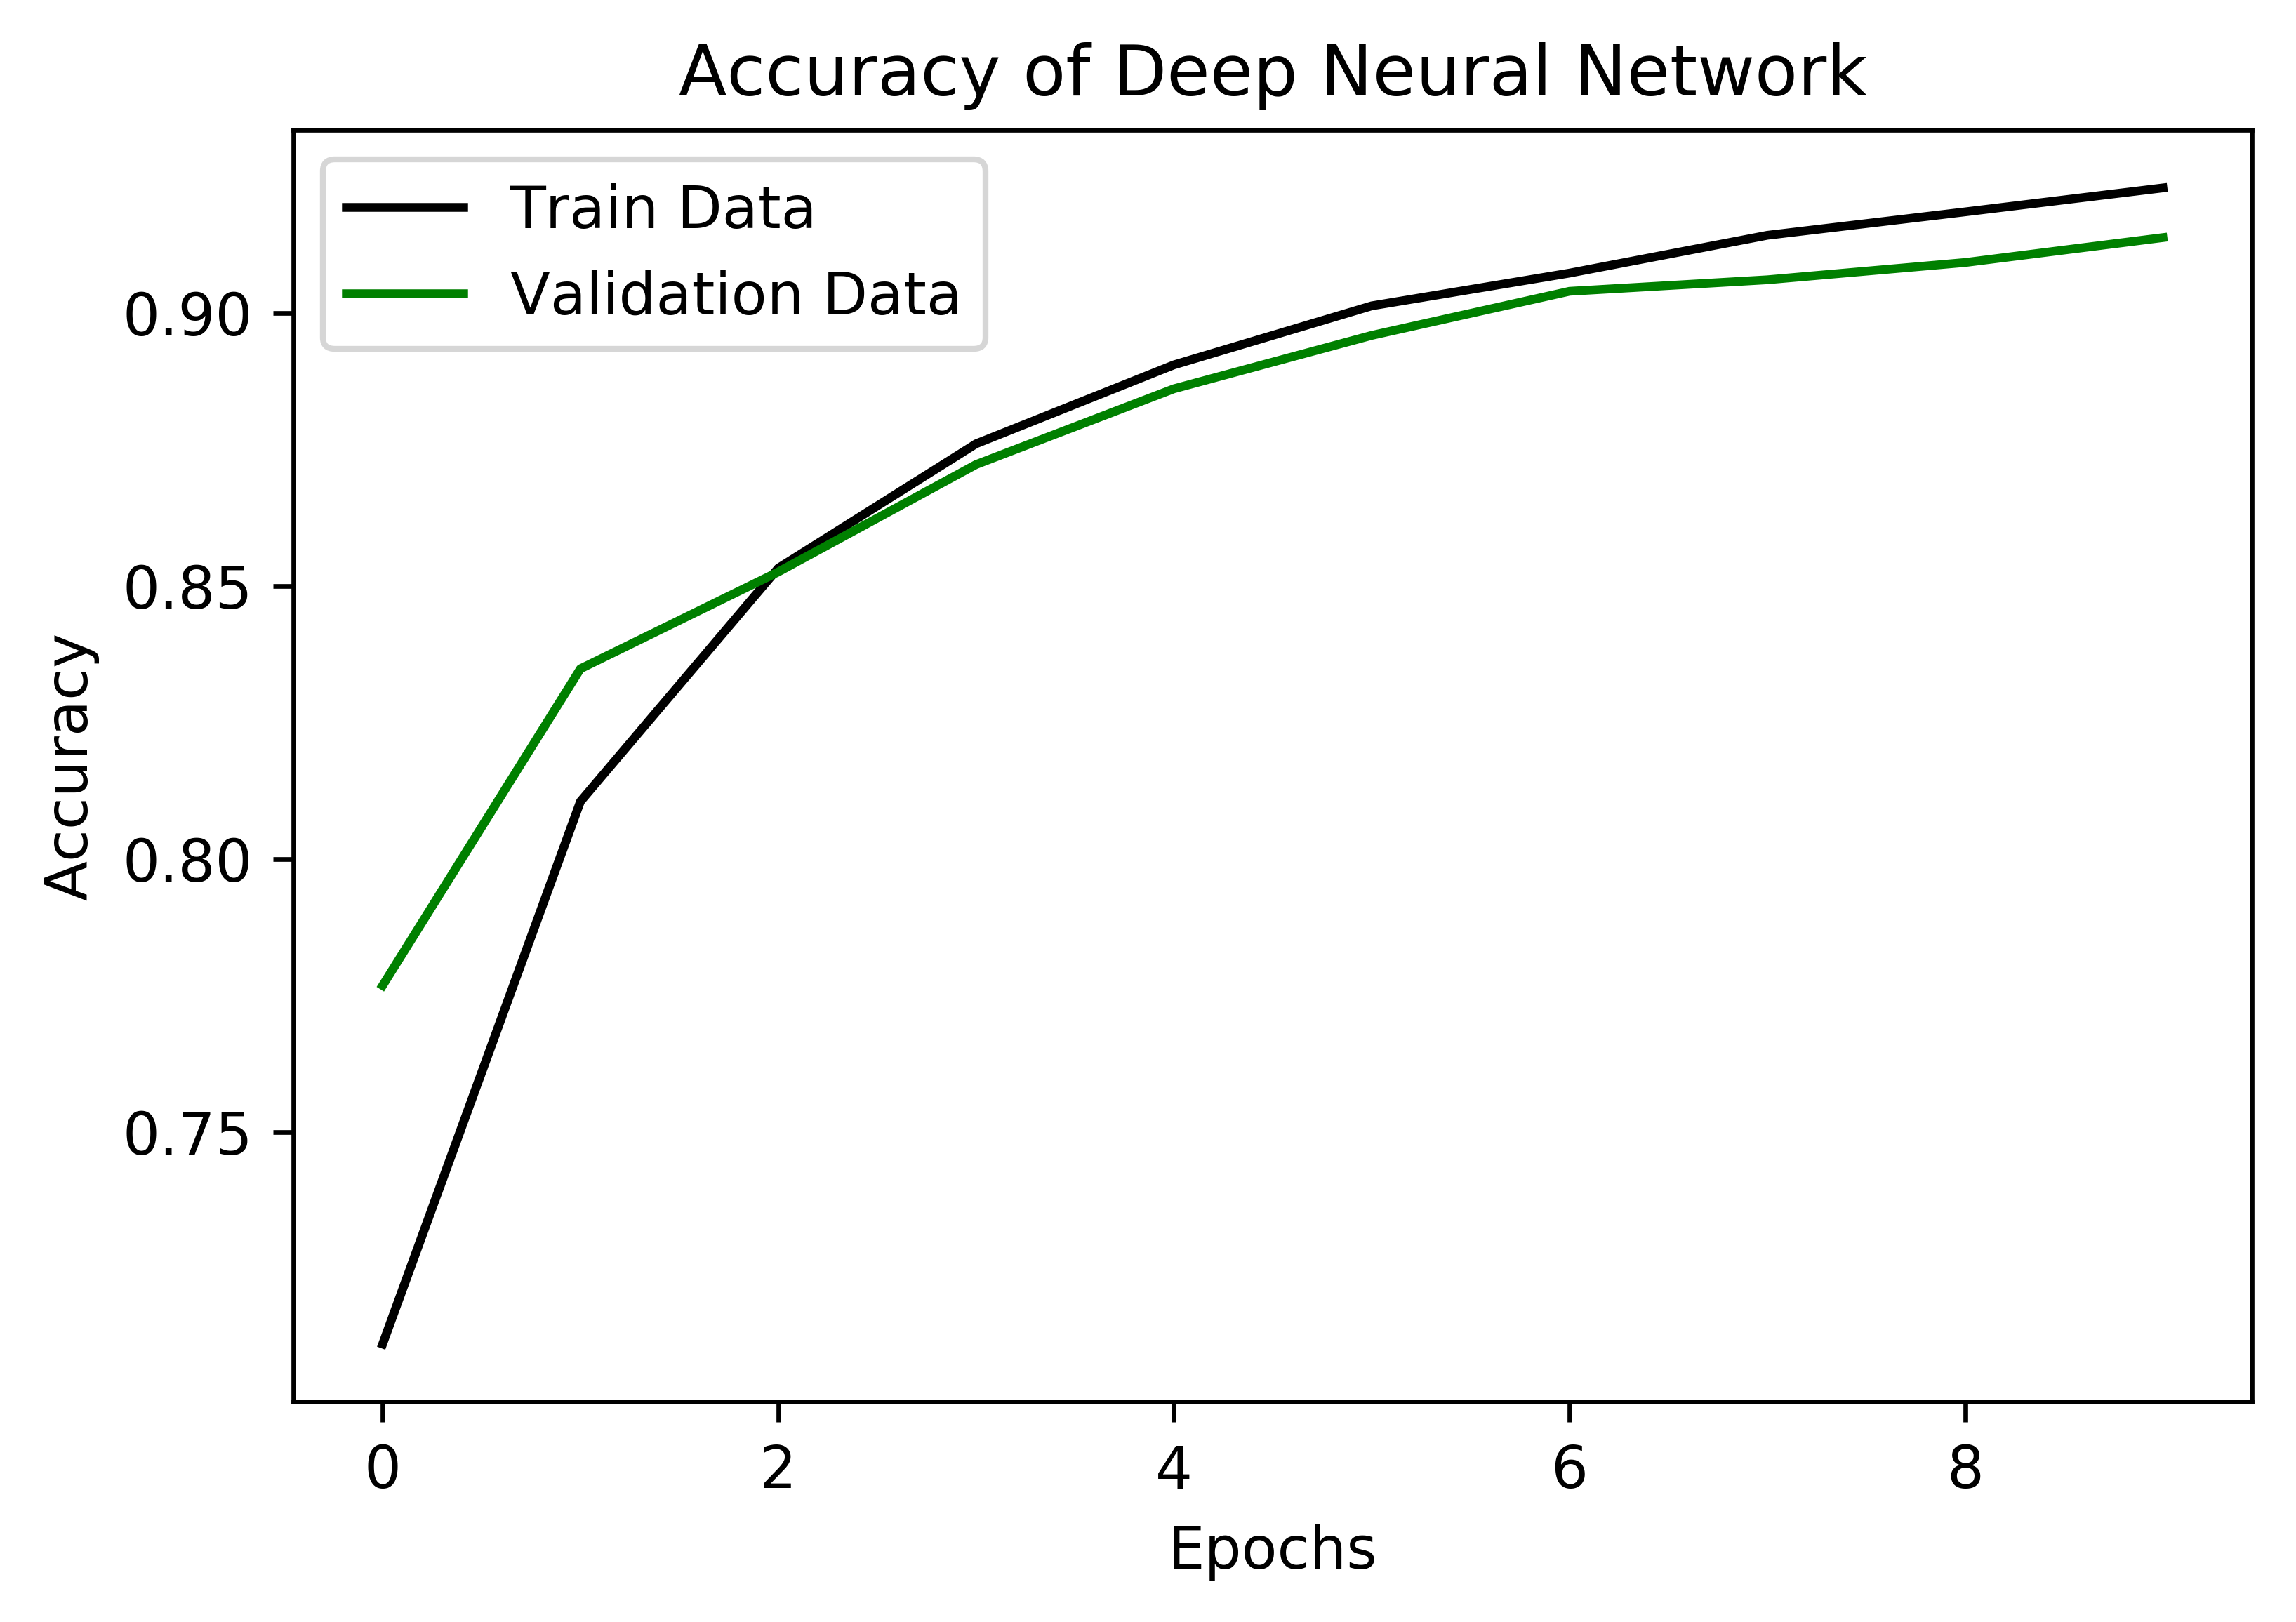

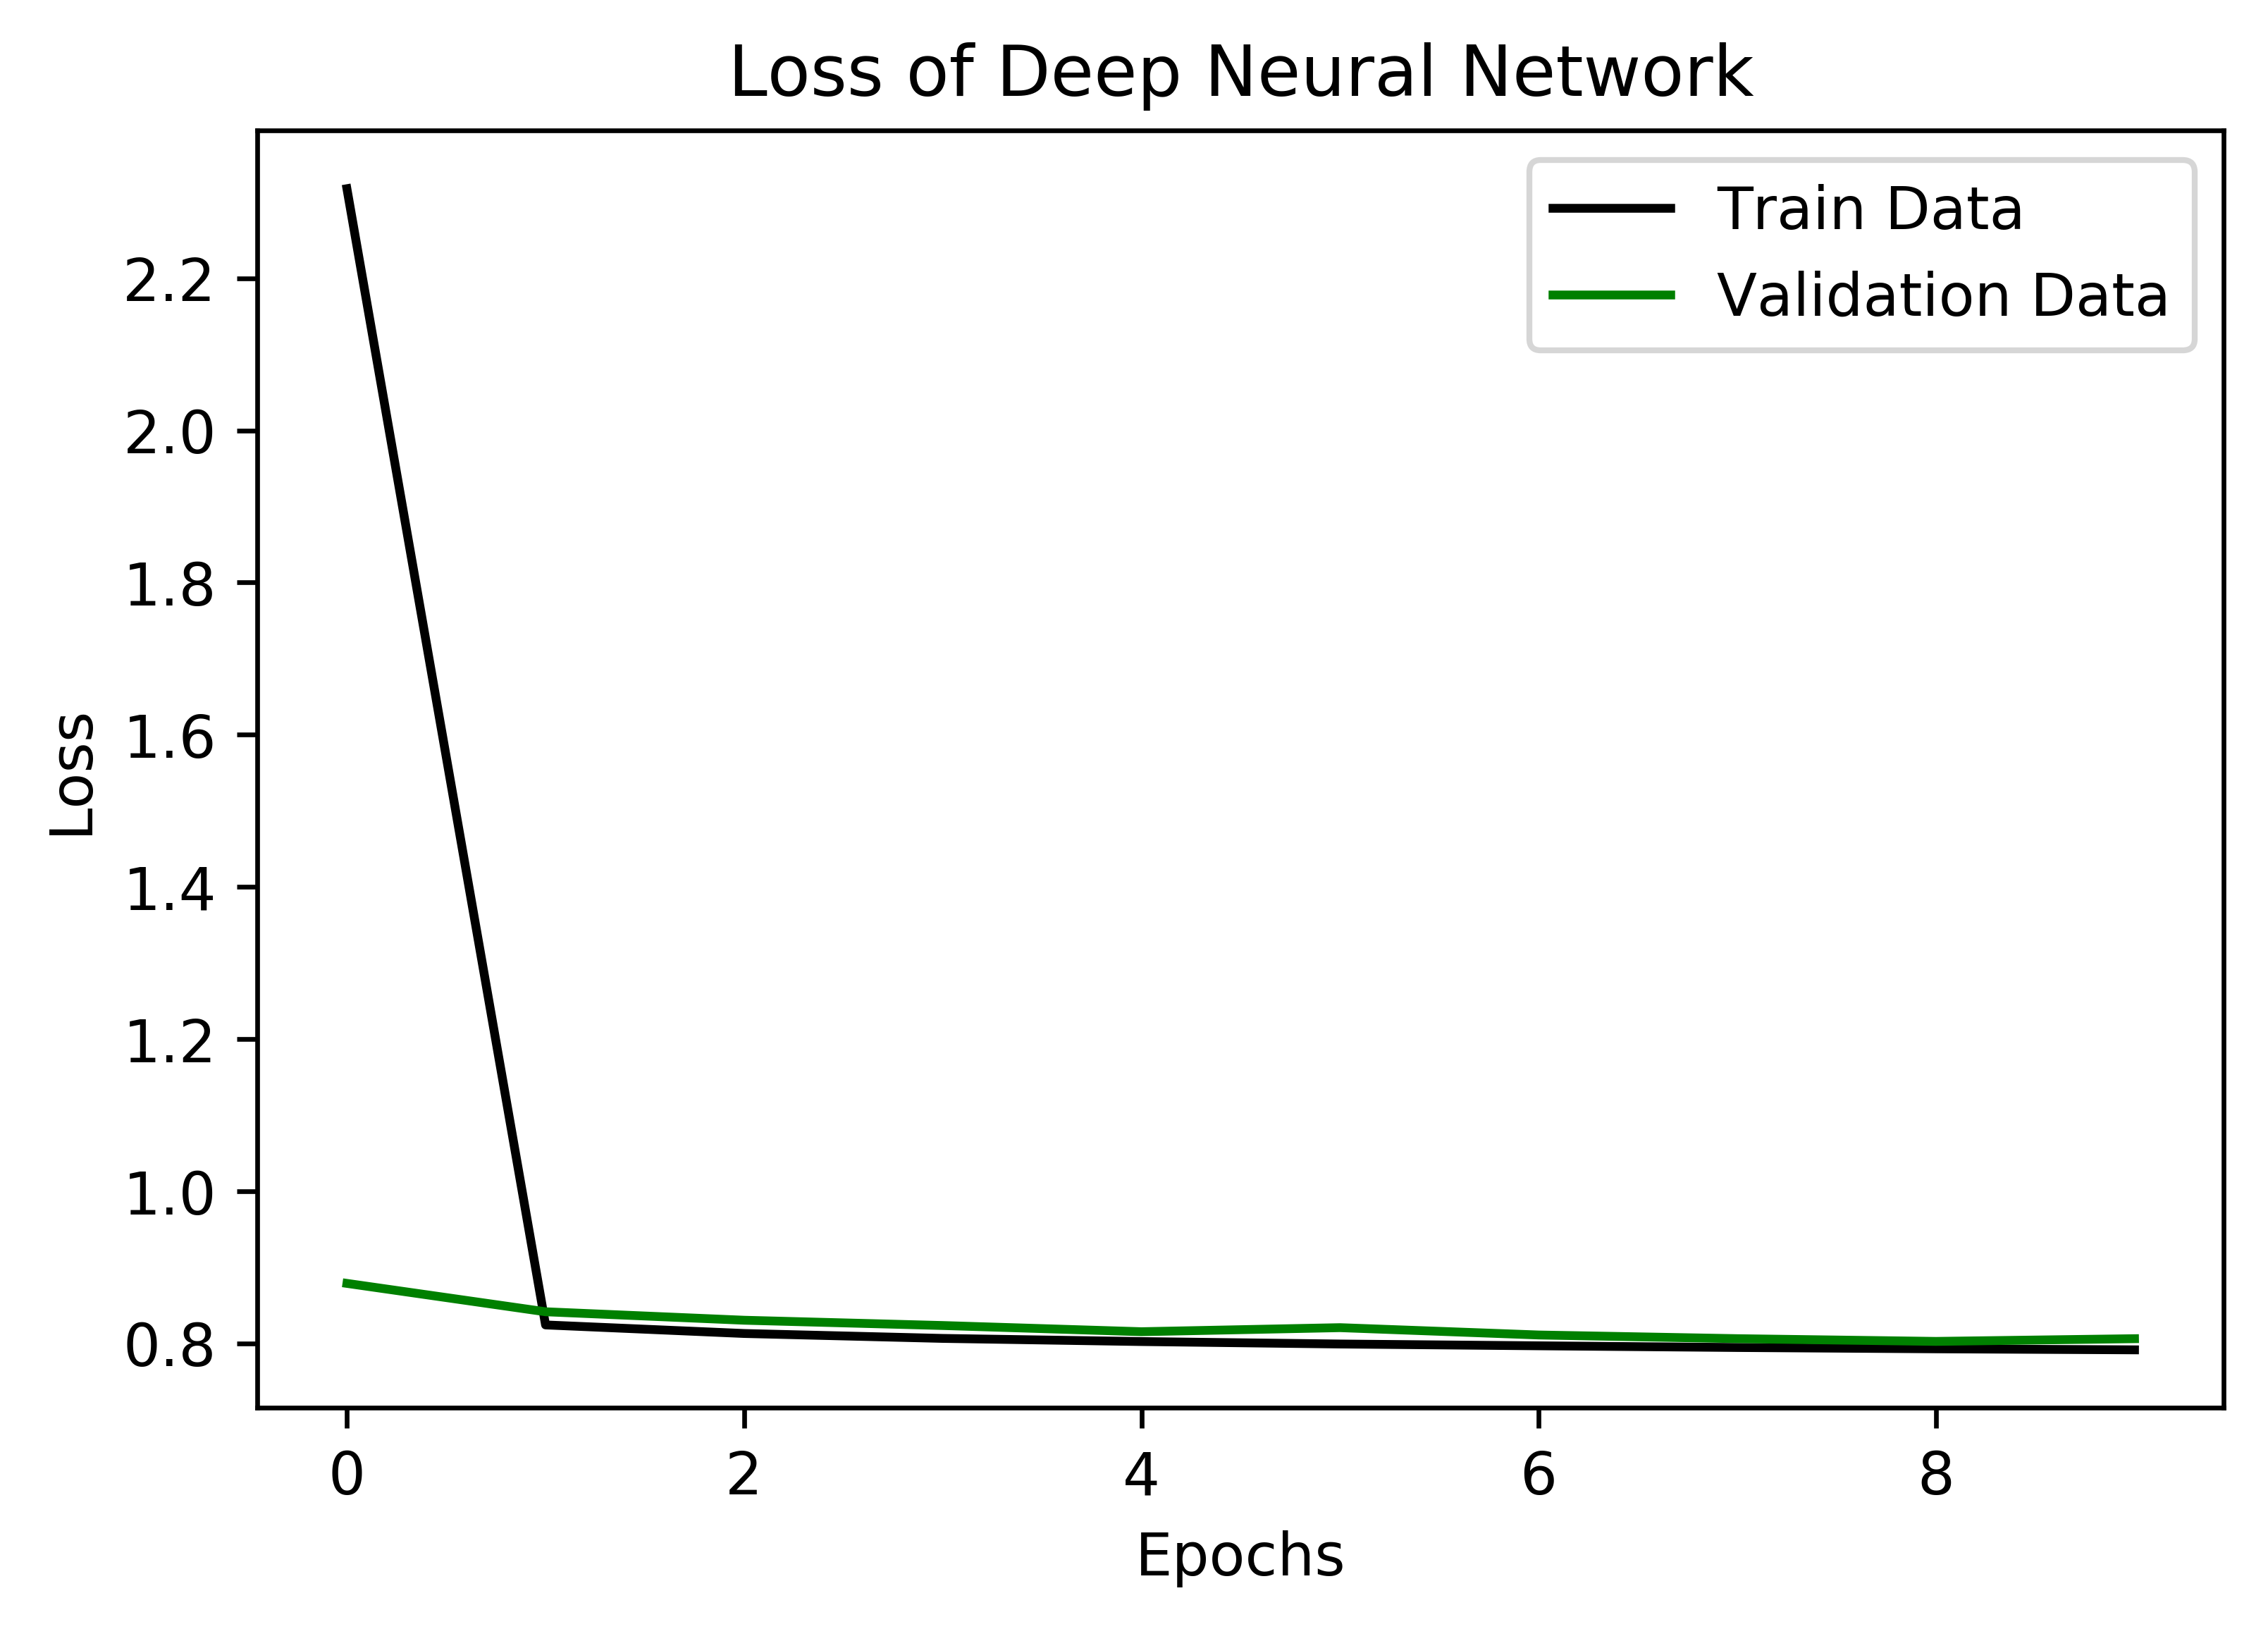

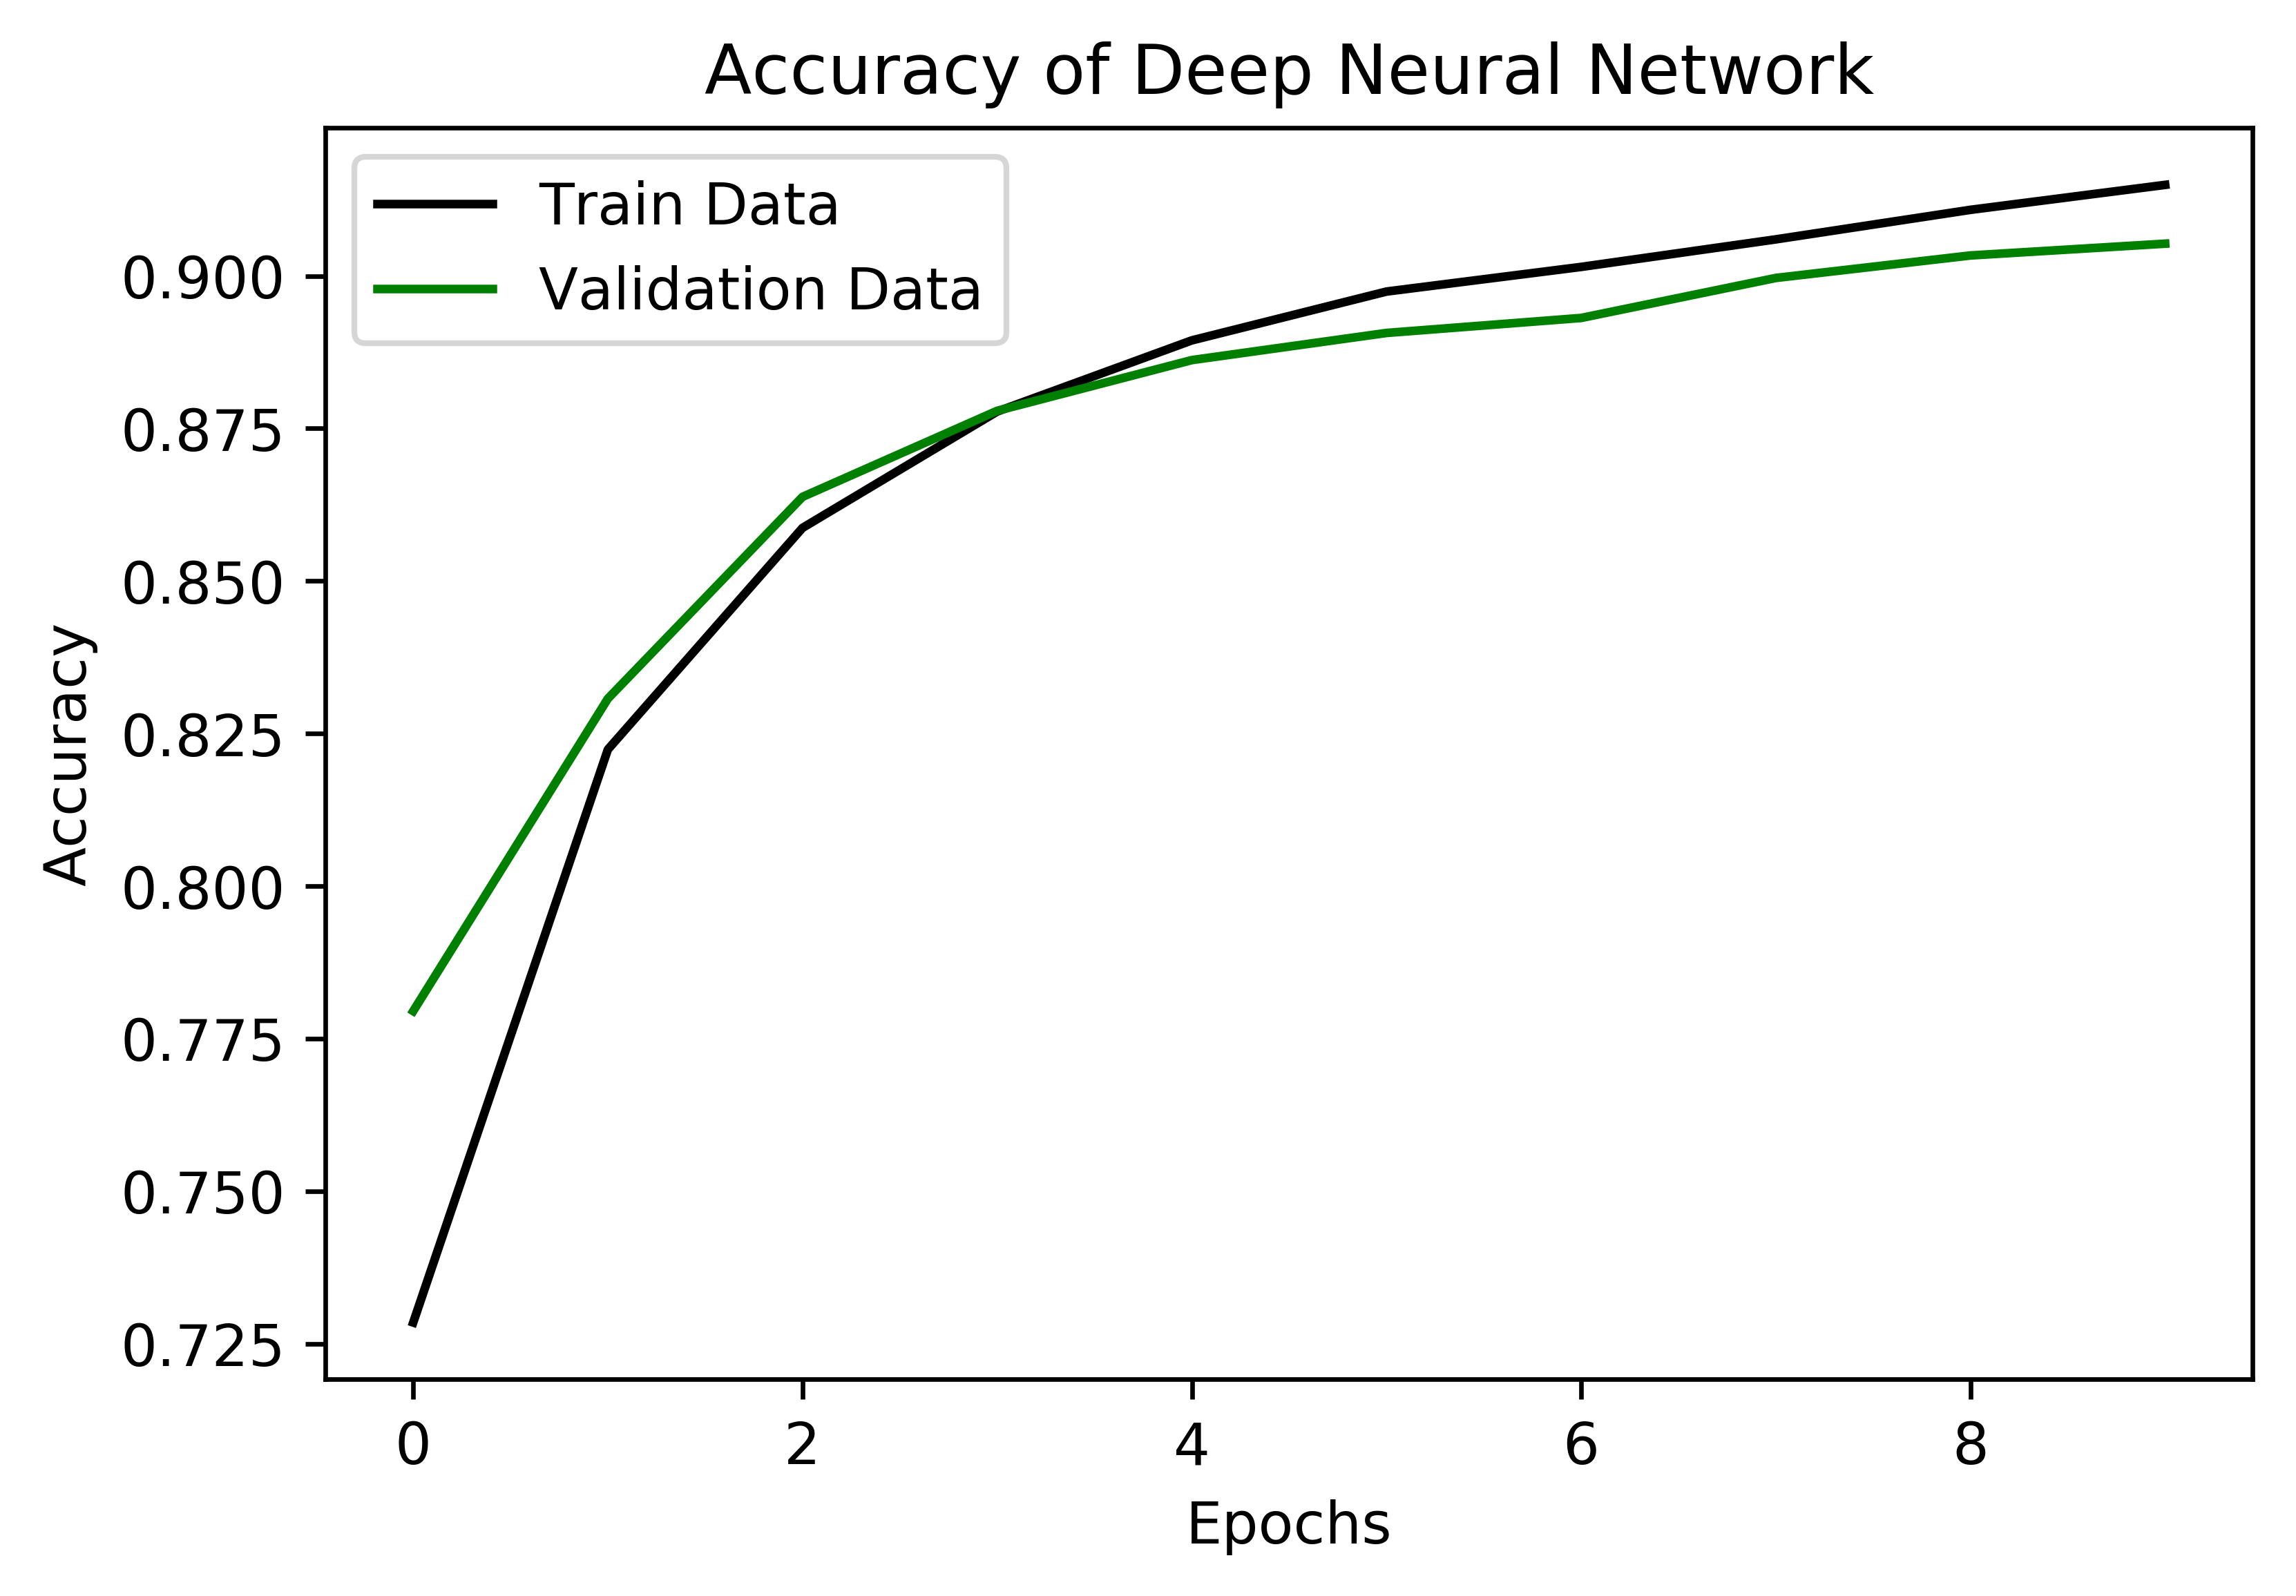

In [14]:


lst_loss=[]
lst_acc=[]
lst_reports=[]
lst_AUC=[]
lst_matrix=[]
lst_times=[]


fold_number=1
kfold=KFold(10,shuffle=True,random_state=0)
for train,test in kfold.split(x_data,y_data):

    x_train=x_data[train]
    train_labels=y_data[train]
    x_test=x_data[test]
    test_labels=y_data[test]



    from keras.utils import np_utils
    y_train=np_utils.to_categorical(train_labels)
    y_test=np_utils.to_categorical(test_labels)


    x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.3,random_state=0)


    from keras.models import Model,Sequential
    from keras.layers import Input,Conv2D,Dense,Flatten,Conv1D,MaxPool1D,MaxPool2D,Dropout,Activation,BatchNormalization
    from keras.optimizers import Adam,SGD
    from keras.losses import binary_crossentropy,categorical_crossentropy,hinge
    from keras.regularizers import l1,l2
    from keras.layers.advanced_activations import LeakyReLU





    # model=Sequential()
    # model.add(Conv1D(32,3,padding='same',activation='relu',strides=2,input_shape=(100,100)))
    # model.add(Dropout(0.2))
    # model.add(Conv1D(64,3,padding='same',activation='relu',strides=2))
    # model.add(Dropout(0.2))
    # model.add(Conv1D(128,3,padding='same',activation='relu',strides=2))
    # model.add(Dropout(0.2))
    # model.add(Conv1D(256,3,padding='same',activation='relu',strides=1))
    # model.add(Dropout(0.2))
    # model.add(Conv1D(256,3,padding='same',activation='relu',strides=1))
    # model.add(Dropout(0.2))
    # model.add(Conv1D(256,3,padding='same',activation='relu',strides=1))
    # model.add(Dropout(0.2))
    # model.add(Flatten())
    # model.add(Dense(256,activation='relu'))
    # model.add(Dense(128,activation='relu'))
    # model.add(Dense(64,activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(2,activation='sigmoid'))



    model=Sequential()
    model.add(Conv1D(32,3,activation='relu',strides=2,input_shape=(100,100)))
    model.add(Conv1D(64,3,activation='relu',strides=2))
    #model.add(Conv1D(128,3,activation='relu',strides=2))
    #model.add(Conv1D(256,3,padding='same',activation='relu',strides=1))
    #model.add(Conv1D(256,3,padding='same',activation='relu',strides=1))
    model.add(Flatten())
    #model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    #model.add(Dense(64,activation='relu'))
    model.add(Dense(2,activation='linear',activity_regularizer=l2(0.001)))



    model.compile(optimizer='adagrad',loss=hinge,metrics=['accuracy'])
        
    start=datetime.datetime.now()
    net_history=model.fit(x_train, y_train, batch_size=256, epochs=10 ,validation_data=[x_valid,y_valid])
    end=datetime.datetime.now()

    model.save(f'./results/CNN/New/fold{fold_number}/CNN{fold_number}.h5')


    test_loss, test_acc=model.evaluate(x_test,y_test)
    lst_acc.append(test_acc)
    lst_loss.append(test_loss)



    predicts=model.predict(x_test)
    predicts=predicts.argmax(axis=1)
    actuals=y_test.argmax(axis=1)

    fpr,tpr,thr=roc_curve(actuals,predicts)
    a=auc(fpr,tpr)
    lst_AUC.append(a)



    r=classification_report(actuals,predicts)
    lst_reports.append(r)


    c=confusion_matrix(actuals,predicts)
    lst_matrix.append(c)


    training_time=end-start
    lst_times.append(training_time)


    #import PlotHistory_CNN
    NetPlot(net_history,fold_number)

    print('**********************************ACC IS:',test_acc)

    fold_number+=1






path=f'./results/CNN/New/CNN_Results.txt' 
f1=open(path,'a')
f1.write('\nAccuracies: '+str(lst_acc)+'\nLosses: '+str(lst_loss)+'\nAUCs: '+str(lst_AUC)+'\n')
f1.write('\n\nMetrics for all Folds: \n\n')
for i in range(len(lst_reports)):
    f1.write(str(lst_reports[i]))
    f1.write('\n\nTraining Time: '+str(lst_times[i]))
    f1.write('\n\nCofusion Matrix: \n'+str(lst_matrix[i])+'\n\n__________________________________________________________\n')
f1.close()





